#### Análisis de post en twitter de 5 perfiles de twitter



___________________________________

### 1. Consolidar las bases de datos descargadas en un dataframe

A continuación se consolidan las bases de datos descargadas.

Pastel:
https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

In [ ]:
import pandas as pd
import glob

path = r'C:\Users\ESTUDIANTE\Scrap Twitter\twint\data\HuaweiMobile'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

huawei = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
import pandas as pd
import glob

path = r'C:\Users\ESTUDIANTE\Scrap Twitter\twint\data\Motorola'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

motorola = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
import pandas as pd
import glob

path = r'C:\Users\ESTUDIANTE\Scrap Twitter\twint\data\samsung'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

samsung = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
import pandas as pd
import glob

path = r'C:\Users\ESTUDIANTE\Scrap Twitter\twint\data\XiaomiColombia'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

xiaomi = pd.concat(li, axis=0, ignore_index=True)

### 2. Importar los paquetes
A continuación debemos importar los paquetes instalados a nuestro notebook a través de la ejecución del siguiente comando:


In [ ]:
#Terminal: pip install -U pip setuptools wheel
#Terminal: pip install -U spacy
#Terminal: python -m spacy download en_core_web_sm
#Terminal: python -m spacy download en_core_web_sm
#Terminal pip install spacy_spanish_lemmatizer
#Terminal python -m spacy_spanish_lemmatizer download wiki
#Terminal: pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import nltk
import unidecode
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from unicodedata import normalize
import csv
from dateutil import parser
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import spacy
nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()
import spacy
import spacy_spanish_lemmatizer
import spacy
import spacy_spanish_lemmatizer
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
from nltk import word_tokenize
import re
import pickle
#from pysentimiento import SentimentAnalyzer
#analyzer = SentimentAnalyzer(lang="es")
import pandas as pd
import re
from unicodedata import normalize
import emoji
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ESTUDIANTE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ESTUDIANTE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ESTUDIANTE\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### 3. Almacenar los data frames como listas
Los archivos que llevamos a los dataframes, vamos a almacenarlos como listas, para posteriormente analizarlas.

Pastel: https://stackoverflow.com/questions/40918503/how-to-read-a-utf-8-encoded-text-file-using-python

In [ ]:
type(huawei)

pandas.core.frame.DataFrame

In [ ]:
type(motorola)

pandas.core.frame.DataFrame

In [ ]:
type(samsung)

pandas.core.frame.DataFrame

In [ ]:
type(xiaomi)

pandas.core.frame.DataFrame

In [ ]:
display(huawei.head(2))

id      conversation_id  \
0  1254112666119032833  1254110673438679041   
1  1254032473895448576  1254032473895448576   

                                          created_at        date      time  \
0  2020-04-25 13:18:54 Hora de verano central (Mé...  2020-04-25  13:18:54   
1  2020-04-25 08:00:15 Hora de verano central (Mé...  2020-04-25  08:00:15   

   timezone    user_id        username            name  place  ... geo source  \
0      -500  501372328  huaweimobileco  HuaweiMobileCo    NaN  ... NaN    NaN   
1      -500  501372328  huaweimobileco  HuaweiMobileCo    NaN  ... NaN    NaN   

  user_rt_id user_rt retweet_id  reply_to  retweet_date  translate trans_src  \
0        NaN     NaN        NaN        []           NaN        NaN       NaN   
1        NaN     NaN        NaN        []           NaN        NaN       NaN   

  trans_dest  
0        NaN  
1        NaN  

[2 rows x 36 columns]

In [ ]:
display(motorola.head(2))

id      conversation_id  \
0  1382823550927605760  1382823550927605760   
1  1382785800895483904  1382785800895483904   

                                          created_at        date      time  \
0  2021-04-15 17:30:00 Hora est. Pacífico, Sudamé...  2021-04-15  17:30:00   
1  2021-04-15 15:00:00 Hora est. Pacífico, Sudamé...  2021-04-15  15:00:00   

   timezone    user_id      username          name  place  ... geo source  \
0      -500  544553795  motorola_col  motorola_col    NaN  ... NaN    NaN   
1      -500  544553795  motorola_col  motorola_col    NaN  ... NaN    NaN   

  user_rt_id user_rt retweet_id  reply_to  retweet_date  translate trans_src  \
0        NaN     NaN        NaN        []           NaN        NaN       NaN   
1        NaN     NaN        NaN        []           NaN        NaN       NaN   

  trans_dest  
0        NaN  
1        NaN  

[2 rows x 36 columns]

In [ ]:
display(samsung.head(2))

id      conversation_id  \
0  1255950876092571648  1255950876092571648   
1  1255892311973810177  1255892311973810177   

                                          created_at        date      time  \
0  2020-04-30 15:03:17 Hora est. Pacífico, Sudamé...  2020-04-30  15:03:17   
1  2020-04-30 11:10:35 Hora est. Pacífico, Sudamé...  2020-04-30  11:10:35   

   timezone   user_id         username               name  place  ... geo  \
0      -500  58913405  samsungmobileco  Samsung Mobile Co    NaN  ... NaN   
1      -500  58913405  samsungmobileco  Samsung Mobile Co    NaN  ... NaN   

  source user_rt_id user_rt retweet_id  reply_to  retweet_date  translate  \
0    NaN        NaN     NaN        NaN        []           NaN        NaN   
1    NaN        NaN     NaN        NaN        []           NaN        NaN   

  trans_src trans_dest  
0       NaN        NaN  
1       NaN        NaN  

[2 rows x 36 columns]

In [ ]:
display(xiaomi.head(2))

id      conversation_id  \
0  1399017762995851264  1399017762995851264   
1  1398410333430104066  1398410333430104066   

                                          created_at        date      time  \
0  2021-05-30 10:00:01 Hora de verano central (Mé...  2021-05-30  10:00:01   
1  2021-05-28 17:46:19 Hora de verano central (Mé...  2021-05-28  17:46:19   

   timezone              user_id        username             name  place  ...  \
0      -500  1113152987453587461  xiaomicolombia  Xiaomi Colombia    NaN  ...   
1      -500  1113152987453587461  xiaomicolombia  Xiaomi Colombia    NaN  ...   

  geo source user_rt_id user_rt retweet_id  reply_to  retweet_date  translate  \
0 NaN    NaN        NaN     NaN        NaN        []           NaN        NaN   
1 NaN    NaN        NaN     NaN        NaN        []           NaN        NaN   

  trans_src trans_dest  
0       NaN        NaN  
1       NaN        NaN  

[2 rows x 36 columns]

In [ ]:
huawei_df = huawei.tweet.drop_duplicates()
huawei_df = pd.DataFrame(huawei_df)
display(huawei_df.tail(2))

tweet
990  🔊Supera las interferencias con los HUAWEI #Fre...
991  @missslovett @sicsuper Hola Ingrid 👋  Lamentam...

In [ ]:
motorola_df = motorola.tweet.drop_duplicates()
motorola_df = pd.DataFrame(motorola_df)
display(motorola_df.tail(2))

tweet
1357  Con la plataforma Ready For y #MotoG100📲 amplí...
1358  @giovanny_bc Nos comunicamos contigo por mensa...

In [ ]:
samsung_df = samsung.tweet.drop_duplicates()
samsung_df = pd.DataFrame(samsung_df)
display(samsung_df.tail(2))

tweet
1143  40% es la probabilidad de que leas este post h...
1144  Si el nuevo Galaxy Z Fold4 5G es capaz de tene...

In [ ]:
xiaomi_df = xiaomi.tweet.drop_duplicates()
xiaomi_df = pd.DataFrame(xiaomi_df)
display(xiaomi_df.tail(2))

tweet
615  Espera solo unos segundos más y descubre que e...
616  #Cinemagia es poder tener Dolby Vision en la #...

In [ ]:
huawei_df["tweet"].str.len()

0      122
1      275
2      180
3      194
4      206
      ... 
987    287
988    140
989    156
990    223
991    297
Name: tweet, Length: 967, dtype: int64

In [ ]:
motorola_df["tweet"].str.len()

0       152
1       178
2       149
3       168
4       107
       ... 
1354    179
1355    291
1356    148
1357    200
1358    104
Name: tweet, Length: 1298, dtype: int64

In [ ]:
samsung_df["tweet"].str.len()

0        88
1       269
2       243
3       177
4       265
       ... 
1140    144
1141    278
1142     61
1143    248
1144    279
Name: tweet, Length: 1110, dtype: int64

In [ ]:
xiaomi_df["tweet"].str.len()

0      160
1      250
2      193
3      198
4      237
      ... 
612    195
613    191
614    173
615    219
616    167
Name: tweet, Length: 463, dtype: int64

In [ ]:
huawei = list(huawei_df["tweet"].unique())
print(huawei[0:2])

['@MiguelA77131919 ¡Hola Miguel! Por favor envíanos un mensaje por DM y así te ayudamos con tu consulta. ¡Te esperamos! "DC"', 'Diviértete en casa y explora en tu Huawei Mate30 Pro o P40 Pro las mejores Apps de audio y video en AppGallery. #QuédateEnCasa  Nuestro top para este fin de semana es:   1. Likee 💛💜 2. Claro Música 📱 3. Deezer 😎🎶  Conoce más:  https://t.co/h9CdO3MqY3  https://t.co/k9qC5bkurY']


In [ ]:
motorola = list(motorola_df["tweet"].unique())
print(motorola[0:2])

['Quedan pocos minutos para iniciar nuestro Instagram Live sobre el nuevo #MotoG30 📲     ¡Participa y gana un premio increíble! 👉  https://t.co/QUqQfJ9qjT', 'En pocas horas podrás saberlo todo sobre el nuevo #MotoG30 📲  y ganar un premio increíble. ¿Ya sigues nuestra cuenta de Instagram?   ¡No te lo pierdas! 👉  https://t.co/QUqQfJ9qjT']


In [ ]:
samsung = list(samsung_df["tweet"].unique())
print(samsung[0:2])

['¿Quieres ver más de cerca el #GalaxyFold ?, acá una pequeña muestra vía @JoseCarlosTecno', 'Llegó otro de esos jueves que esperabas. ¡No por el #tbt sino por las promos que tenemos para ti! Disfruta de nuestro universo a precios increíbles. Conoce más en  https://t.co/mbs9ya6UPt #YoMeQuedoEnCasa #ConectadosEnFamilia #UnidosLoSuperamos  https://t.co/V3rr27wd7c']


In [ ]:
xiaomi = list(xiaomi_df["tweet"].unique())
print(xiaomi[0:2])

['¡Un teléfono inteligente con un estilo completamente nuevo se acerca! No te pierdas la llegada del #Mi11Lite5G este 3 de junio de 2021.  https://t.co/wwWXiE7qpF', 'Se acerca la segunda fecha para celebrar el día de la madre y se vale sorprenderla nuevamente🎁.  Aprovecha los precios especiales del #RedmiNote9 y el #Redmi9A hasta este 31 de mayo en los distribuidores oficiales en el país.  https://t.co/JTJXEkD4hU']


In [ ]:
len(huawei)

967

In [ ]:
len(motorola)

1298

In [ ]:
len(samsung)

1110

In [ ]:
len(xiaomi)

463

In [ ]:
type(huawei)

list

In [ ]:
type(motorola)

list

In [ ]:
type(samsung)

list

In [ ]:
type(xiaomi)

list

### 4. Tamaño de los post
A continuación vamos a revisar la longitud de los post de cada una de las Universidades, este comparativo lo vamos a hacer a traves de diagramas de violin, para identificar valores extremos, distribucion de las longitudes, media y rango intercuartilico.

In [ ]:
huawei_df.columns  = ["post"]
huawei_len = pd.DataFrame(columns = ["empresa", "len"])
huawei_len["len"] = huawei_df["post"].str.len()
huawei_len["empresa"] = "huawei"

In [ ]:
motorola_df.columns  = ["post"]
motorola_len = pd.DataFrame(columns = ["empresa", "len"])
motorola_len["len"] = motorola_df["post"].str.len()
motorola_len["empresa"] = "motorola"

In [ ]:
samsung_df.columns  = ["post"]
samsung_len = pd.DataFrame(columns = ["empresa", "len"])
samsung_len["len"] = samsung_df["post"].str.len()
samsung_len["empresa"] = "samsung"

In [ ]:
xiaomi_df.columns  = ["post"]
xiaomi_len = pd.DataFrame(columns = ["empresa", "len"])
xiaomi_len["len"] = xiaomi_df["post"].str.len()
xiaomi_len["empresa"] = "xiaomi"

In [ ]:
frames = [huawei_len, motorola_len, samsung_len, xiaomi_len]
u_len = pd.concat(frames)

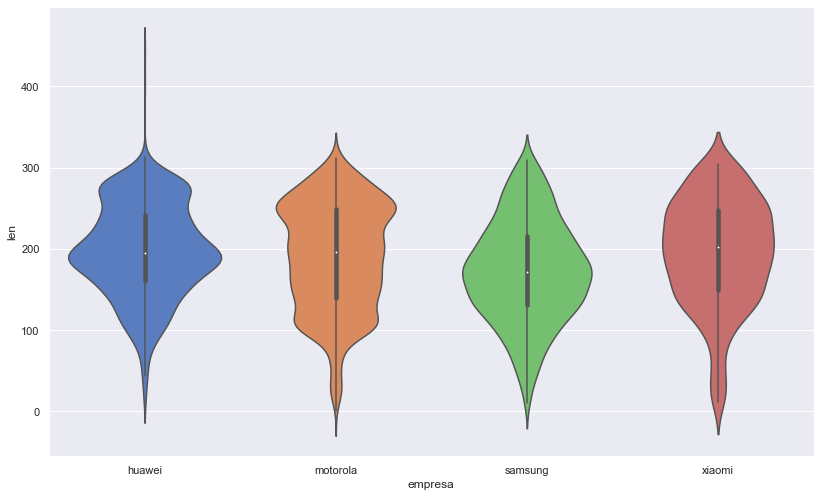

In [ ]:
#Grafico de violin en seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(13.7,8.27)})
ax = sns.violinplot(x="empresa", y="len", data=u_len, palette="muted")

### 5. Unigramas
A continuación vamos a identificar las palabras que mayor ocurrencia presentan de manera individual sin haber hecho depuracion de los post, es decir los unigramas mas frecuentes en las bases de datos.

In [ ]:
stop_words=set(stopwords.words("spanish"))
print(stop_words)

{'soy', 'habrá', 'hubiésemos', 'será', 'serán', 'estarías', 'estamos', 'teníamos', 'sentido', 'un', 'que', 'tenga', 'erais', 'nuestro', 'está', 'estadas', 'seríamos', 'vuestros', 'estaría', 'habrían', 'tengas', 'hay', 'el', 'tenidos', 'otro', 'teniendo', 'serías', 'algunos', 'ellos', 'ellas', 'nada', 'estuvisteis', 'os', 'por', 'tendremos', 'estados', 'ante', 'habida', 'habríais', 'tendrás', 'tendría', 'también', 'hubiese', 'seas', 'tendrán', 'estarán', 'nuestros', 'nosotros', 'fui', 'estuviésemos', 'son', 'estarás', 'cual', 'habíamos', 'a', 'seremos', 'y', 'sentidos', 'sentida', 'desde', 'habré', 'entre', 'estuviese', 'tendrían', 'eran', 'tenía', 'eso', 'fueses', 'habéis', 'algo', 'somos', 'la', 'una', 'tuyas', 'están', 'hubimos', 'suyos', 'uno', 'de', 'tendrías', 'estén', 'e', 'tenidas', 'estoy', 'estás', 'ha', 'estas', 'mío', 'haya', 'habría', 'fuerais', 'suyo', 'habremos', 'tuvieses', 'nos', 'tenían', 'hubisteis', 'fueron', 'hubieran', 'sois', 'suyas', 'tuyo', 'tuviesen', 'mis', 'n

In [ ]:
from nltk import ngrams

dfs = [huawei_df]

for df, dataset in zip(dfs, ['huawei_df']):
    new_dfs = [df]
    print('Post de', dataset)
    for df_new, tag in zip(new_dfs, ['huawei']):
        words = ' '.join(df_new['post']).lower().split()
        n = 1
        non_stopwords = [word for word in words if word not in stop_words]
        bigrams = ngrams(non_stopwords, n)
        common = pd.Series(bigrams).value_counts()[:20].index.tolist()
        print("Los unigramas más comunes en los post de la "+tag+ " son: ", common)

Post de huawei_df
Los unigramas más comunes en los post de la huawei son:  [('huawei',), ('huawei.',), ('¡hola',), ('¡saludos!',), ('¡hola!',), ('gracias',), ('favor',), ('si',), ('invitamos',), ('mejor',), ('gusto',), ('puedes',), ('mensaje',), ('poder',), ('comunicarte',), ('huawei,',), ('atención',), ('brindarte',), ('tienda',), ('dm',)]


In [ ]:
from nltk import ngrams

dfs = [motorola_df]

for df, dataset in zip(dfs, ['motorola_df']):
    new_dfs = [df]
    print('Post de', dataset)
    for df_new, tag in zip(new_dfs, ['motorola']):
        words = ' '.join(df_new['post']).lower().split()
        n = 1
        non_stopwords = [word for word in words if word not in stop_words]
        bigrams = ngrams(non_stopwords, n)
        common = pd.Series(bigrams).value_counts()[:20].index.tolist()
        print("Los unigramas más comunes en los post de la "+tag+ " son: ", common)

Post de motorola_df
Los unigramas más comunes en los post de la motorola son:  [('motorola',), ('si',), ('#hellomoto',), ('mensaje',), ('necesitas',), ('aún',), ('privado',), ('cuenta',), ('nuevo',), ('tienda',), ('👉',), ('contigo',), ('comunicamos',), ('soporte',), ('online',), ('mejor',), ('ver',), ('colombia',), ('gracias',), ('¡esperamos',)]


In [ ]:
from nltk import ngrams

dfs = [samsung_df]

for df, dataset in zip(dfs, ['samsung_df']):
    new_dfs = [df]
    print('Post de', dataset)
    for df_new, tag in zip(new_dfs, ['samsung']):
        words = ' '.join(df_new['post']).lower().split()
        n = 1
        non_stopwords = [word for word in words if word not in stop_words]
        bigrams = ngrams(non_stopwords, n)
        common = pd.Series(bigrams).value_counts()[:20].index.tolist()
        print("Los unigramas más comunes en los post de la "+tag+ " son: ", common)

Post de samsung_df
Los unigramas más comunes en los post de la samsung son:  [('aquí',), ('👉',), ('¡hola!',), ('conoce',), ('dm',), ('aquí:',), ('través',), ('ingresa',), ('saludos',), ('favor',), ('hola.',), ('https://t.co/6hwnt3w7w0',), ('👉🏻',), ('buen',), ('medio',), ('nuevo',), ('samsung',), ('mensaje',), ('puedes',), ('atentos',)]


In [ ]:
from nltk import ngrams

dfs = [xiaomi_df]

for df, dataset in zip(dfs, ['xiaomi_df']):
    new_dfs = [df]
    print('Post de', dataset)
    for df_new, tag in zip(new_dfs, ['xiaomi']):
        words = ' '.join(df_new['post']).lower().split()
        n = 1
        non_stopwords = [word for word in words if word not in stop_words]
        bigrams = ngrams(non_stopwords, n)
        common = pd.Series(bigrams).value_counts()[:20].index.tolist()
        print("Los unigramas más comunes en los post de la "+tag+ " son: ", common)

Post de xiaomi_df
Los unigramas más comunes en los post de la xiaomi son:  [('xiaomi',), ('nuevo',), ('nueva',), ('👉',), ('aquí',), ('serie',), ('disponible',), ('stores',), ('país.',), ('distribuidores',), ('redmi',), ('lanzamiento',), ('#redminote10',), ('🤩',), ('ecosistema',), ('aprovecha',), ('si',), ('hoy',), ('#dalepoderatusideas',), ('5g',)]


### 6. Bigramas
A continuación vamos a identificar las palabras que mayor ocurrencia presentan por pares, es decir los bigramas mas frecuentes en las bases de datos.

In [ ]:
from nltk import ngrams

dfs = [huawei_df]

for df, dataset in zip(dfs, ['huawei_df']):
    new_dfs = [df]
    print('Post de', dataset)
    for df_new, tag in zip(new_dfs, ['huawei']):
        words = ' '.join(df_new['post']).lower().split()
        n = 2
        non_stopwords = [word for word in words if word not in stop_words]
        bigrams = ngrams(non_stopwords, n)
        common = pd.Series(bigrams).value_counts()[:20].index.tolist()
        print("Los bigramas más comunes en los post de la "+tag+ " son: ", common)

Post de huawei_df
Los bigramas más comunes en los post de la huawei son:  [('gracias', 'comunicarte'), ('bienvenido', 'huawei.'), ('favor', 'escríbenos'), ('comunicarte', 'huawei.'), ('¡te', 'esperamos!'), ('brindarte', 'mejor'), ('01', '8000'), ('¡saludos!', '🤗'), ('poder', 'brindarte'), ('envíanos', 'mensaje'), ('8000', '9494'), ('muchas', 'gracias'), ('favor', 'envíanos'), ('tienda', 'online'), ('app', 'soporte'), ('mejor', 'atención'), ('¡quedamos', 'pendientes!'), ('mensaje', 'interno/inbox'), ('interno/inbox', '¡quedamos'), ('huawei.', 'poder')]


In [ ]:
from nltk import ngrams

dfs = [motorola_df]

for df, dataset in zip(dfs, ['motorola_df']):
    new_dfs = [df]
    print('Post de', dataset)
    for df_new, tag in zip(new_dfs, ['motorola']):
        words = ' '.join(df_new['post']).lower().split()
        n = 2
        non_stopwords = [word for word in words if word not in stop_words]
        bigrams = ngrams(non_stopwords, n)
        common = pd.Series(bigrams).value_counts()[:20].index.tolist()
        print("Los bigramas más comunes en los post de la "+tag+ " son: ", common)

Post de motorola_df
Los bigramas más comunes en los post de la motorola son:  [('si', 'aún'), ('aún', 'necesitas'), ('mensaje', 'privado'), ('comunicamos', 'contigo'), ('contigo', 'mensaje'), ('motorola', 'soporte'), ('tienda', 'online'), ('motorola', 'colombia'), ('¡esperamos', 'respuesta!'), ('ver', 'si'), ('comunícate', 'través'), ('ayuda,', 'comunícate'), ('seguimiento', 'ver'), ('gracias,', 'motorola'), ('funcionó.', 'si'), ('sugerencia', 'funcionó.'), ('si', 'sugerencia'), ('teléfono', 'si'), ('ayuda', 'teléfono'), ('necesitas', 'ayuda')]


In [ ]:
from nltk import ngrams

dfs = [samsung_df]

for df, dataset in zip(dfs, ['samsung_df']):
    new_dfs = [df]
    print('Post de', dataset)
    for df_new, tag in zip(new_dfs, ['samsung']):
        words = ' '.join(df_new['post']).lower().split()
        n = 2
        non_stopwords = [word for word in words if word not in stop_words]
        bigrams = ngrams(non_stopwords, n)
        common = pd.Series(bigrams).value_counts()[:20].index.tolist()
        print("Los bigramas más comunes en los post de la "+tag+ " son: ", common)

Post de samsung_df
Los bigramas más comunes en los post de la samsung son:  [('medio', 'dm'), ('aquí', '👉🏻'), ('aquí', '👉'), ('ingresa', 'aquí:'), ('buen', 'día.'), ('buen', 'día'), ('dejamos', 'mensaje'), ('conoce', 'aquí'), ('mensaje', 'medio'), ('través', 'dm'), ('conoce', 'aquí:'), ('ingresa', 'aquí'), ('atentos.', 'buen'), ('dm', 'ayudarte'), ('través', 'mensaje'), ('¡hola!', '🙋\u200d♂️'), ('favor', 'compártenos'), ('datos', 'contacto'), ('tienda', 'oficial'), ('#galaxyzflip4', '5g')]


In [ ]:
from nltk import ngrams

dfs = [xiaomi_df]

for df, dataset in zip(dfs, ['xiaomi_df']):
    new_dfs = [df]
    print('Post de', dataset)
    for df_new, tag in zip(new_dfs, ['xiaomi']):
        words = ' '.join(df_new['post']).lower().split()
        n = 2
        non_stopwords = [word for word in words if word not in stop_words]
        bigrams = ngrams(non_stopwords, n)
        common = pd.Series(bigrams).value_counts()[:20].index.tolist()
        print("Los bigramas más comunes en los post de la "+tag+ " son: ", common)

Post de xiaomi_df
Los bigramas más comunes en los post de la xiaomi son:  [('stores', 'país.'), ('autorizados,', 'operadores'), ('redmi', 'note'), ('distribuidores', 'autorizados,'), ('disponible', 'distribuidores'), ('soporte:', 'service.co@support.mi.com'), ('email', 'soporte:'), ('📨', 'email'), ('18005190083', '📨'), ('📲call', 'center:'), ('#redminote10', '5g'), ('center:', '18005190083'), ('ecosistema', '👉'), ('centro', 'comercial'), ('línea', 'atención'), ('atención', 'cliente'), ('operadores', 'stores'), ('precio', 'especial'), ('27', 'octubre'), ('celulares', '👉')]


### 7. Trigramas
A continuación vamos a identificar las palabras que mayor ocurrencia presentan por trios o ternas, es decir los triigramas mas frecuentes en las bases de datos.

In [ ]:
from nltk import ngrams

dfs = [huawei_df]

for df, dataset in zip(dfs, ['huawei_df']):
    new_dfs = [df]
    print('Post de', dataset)
    for df_new, tag in zip(new_dfs, ['huawei']):
        words = ' '.join(df_new['post']).lower().split()
        n = 3
        non_stopwords = [word for word in words if word not in stop_words]
        bigrams = ngrams(non_stopwords, n)
        common = pd.Series(bigrams).value_counts()[:20].index.tolist()
        print("Los trigramas más comunes en los post de la "+tag+ " son: ", common)

Post de huawei_df
Los trigramas más comunes en los post de la huawei son:  [('gracias', 'comunicarte', 'huawei.'), ('01', '8000', '9494'), ('favor', 'envíanos', 'mensaje'), ('interno/inbox', '¡quedamos', 'pendientes!'), ('envíanos', 'mensaje', 'interno/inbox'), ('mensaje', 'interno/inbox', '¡quedamos'), ('brindarte', 'mejor', 'atención'), ('huawei.', 'poder', 'brindarte'), ('poder', 'brindarte', 'mejor'), ('inquietud,', 'favor', 'envíanos'), ('respecto', 'inquietud,', 'favor'), ('atención', 'respecto', 'inquietud,'), ('mejor', 'atención', 'respecto'), ('bienvenido', 'huawei.', 'poder'), ('¡hola!', 'bienvenido', 'huawei.'), ('muchas', 'gracias', 'comunicarte'), ('app', 'soporte', 'teléfono'), ('gracias', 'comunicarse', 'huawei.'), ('gusto', 'saber', 'preferencia'), ('¡te', 'esperamos!', '🤩')]


In [ ]:
from nltk import ngrams

dfs = [motorola_df]

for df, dataset in zip(dfs, ['motorola_df']):
    new_dfs = [df]
    print('Post de', dataset)
    for df_new, tag in zip(new_dfs, ['motorola']):
        words = ' '.join(df_new['post']).lower().split()
        n = 3
        non_stopwords = [word for word in words if word not in stop_words]
        bigrams = ngrams(non_stopwords, n)
        common = pd.Series(bigrams).value_counts()[:20].index.tolist()
        print("Los trigramas más comunes en los post de la "+tag+ " son: ", common)

Post de motorola_df
Los trigramas más comunes en los post de la motorola son:  [('si', 'aún', 'necesitas'), ('comunicamos', 'contigo', 'mensaje'), ('contigo', 'mensaje', 'privado'), ('aún', 'necesitas', 'ayuda,'), ('funcionó.', 'si', 'aún'), ('ayuda,', 'comunícate', 'través'), ('quisiéramos', 'hacer', 'seguimiento'), ('hacer', 'seguimiento', 'ver'), ('seguimiento', 'ver', 'si'), ('ver', 'si', 'aún'), ('gracias,', 'motorola', 'soporte'), ('aún', 'necesitas', 'ayuda'), ('ayuda', 'teléfono', 'si'), ('teléfono', 'si', 'sugerencia'), ('necesitas', 'ayuda,', 'comunícate'), ('si', 'sugerencia', 'funcionó.'), ('sugerencia', 'funcionó.', 'si'), ('necesitas', 'ayuda', 'teléfono'), ('mensaje', 'público/mensaje', 'directo.'), ('público/mensaje', 'directo.', 'gracias,')]


In [ ]:
from nltk import ngrams

dfs = [samsung_df]

for df, dataset in zip(dfs, ['samsung_df']):
    new_dfs = [df]
    print('Post de', dataset)
    for df_new, tag in zip(new_dfs, ['samsung']):
        words = ' '.join(df_new['post']).lower().split()
        n = 3
        non_stopwords = [word for word in words if word not in stop_words]
        bigrams = ngrams(non_stopwords, n)
        common = pd.Series(bigrams).value_counts()[:20].index.tolist()
        print("Los trigramas más comunes en los post de la "+tag+ " son: ", common)

Post de samsung_df
Los trigramas más comunes en los post de la samsung son:  [('dejamos', 'mensaje', 'medio'), ('mensaje', 'medio', 'dm'), ('atentos.', 'buen', 'día'), ('¡hola!', 'dejamos', 'mensaje'), ('tienda', 'oficial', 'online'), ('conoce', 'aquí', '👉🏻'), ('medio', 'dm', 'ayudarte'), ('través', 'mensaje', 'directo'), ('medio', 'dm', 'conocer'), ('datos', 'contacto', 'través'), ('🙋\u200d♂️', 'dejamos', 'mensaje'), ('¡hola!', '🙋\u200d♂️', 'dejamos'), ('descubre', 'aquí', '👉🏻'), ('feliz', 'día.', 'https://t.co/6hwnt3w7w0'), ('escríbenos', 'medio', 'dm'), ('medio', 'dm.', 'atentos.'), ('ingresa', 'aquí', '👉'), ('envíanos', 'datos', 'contacto'), ('favor', 'envíanos', 'datos'), ('favor', 'escríbenos', 'medio')]


In [ ]:
from nltk import ngrams

dfs = [xiaomi_df]

for df, dataset in zip(dfs, ['xiaomi_df']):
    new_dfs = [df]
    print('Post de', dataset)
    for df_new, tag in zip(new_dfs, ['xiaomi']):
        words = ' '.join(df_new['post']).lower().split()
        n = 3
        non_stopwords = [word for word in words if word not in stop_words]
        bigrams = ngrams(non_stopwords, n)
        common = pd.Series(bigrams).value_counts()[:20].index.tolist()
        print("Los trigramas más comunes en los post de la "+tag+ " son: ", common)

Post de xiaomi_df
Los trigramas más comunes en los post de la xiaomi son:  [('distribuidores', 'autorizados,', 'operadores'), ('18005190083', '📨', 'email'), ('email', 'soporte:', 'service.co@support.mi.com'), ('📨', 'email', 'soporte:'), ('📲call', 'center:', '18005190083'), ('center:', '18005190083', '📨'), ('línea', 'atención', 'cliente'), ('disponible', 'distribuidores', 'autorizados,'), ('autorizados,', 'operadores', 'stores'), ('operadores', 'stores', 'país.'), ('autorizados,', 'operadores', 'xiaomi'), ('operadores', 'xiaomi', 'stores'), ('disponible', 'alkosto,', 'falabella'), ('atención', 'cliente', 'dispuestos'), ('descúbrelo', '27', 'octubre'), ('invitamos', 'comunicarte', 'línea'), ('comunicarte', 'línea', 'atención'), ('👉', 'https://t.co/ie4scfgxkg', 'celulares'), ('equipo,', 'invitamos', 'comunicarte'), ('inconvenientes', 'equipo,', 'invitamos')]


### 8. Estandarizar mayúsculas y minúsculas
Iniciaremos este prosamsungo llevando todas las cadenas de texto a minúsculas.

In [ ]:
huawei_lower = str(huawei).lower()
print(huawei_lower[:600])

['@miguela77131919 ¡hola miguel! por favor envíanos un mensaje por dm y así te ayudamos con tu consulta. ¡te esperamos! "dc"', 'diviértete en casa y explora en tu huawei mate30 pro o p40 pro las mejores apps de audio y video en appgallery. #quédateencasa  nuestro top para este fin de semana es:   1. likee 💛💜 2. claro música 📱 3. deezer 😎🎶  conoce más:  https://t.co/h9cdo3mqy3  https://t.co/k9qc5bkury', '@nairocisf ¡hola nairo! muchas gracias por comunicarte con nosotros, para brindarte una asistencia personalizada te invitamos a escribirnos por inbox y con gusto te atenderemos. jl', '@francoda


In [ ]:
motorola_lower = str(motorola).lower()
print(motorola_lower[:600])

['quedan pocos minutos para iniciar nuestro instagram live sobre el nuevo #motog30 📲     ¡participa y gana un premio increíble! 👉  https://t.co/quqqfj9qjt', 'en pocas horas podrás saberlo todo sobre el nuevo #motog30 📲  y ganar un premio increíble. ¿ya sigues nuestra cuenta de instagram?   ¡no te lo pierdas! 👉  https://t.co/quqqfj9qjt', 'nuestros #motolovers ❤️ conocieron este teléfono gracias a sus padres o abuelos   ¿lo recuerdas? comenta este tweet usando 🥰  https://t.co/fsnzojwfc7', 'te presentamos el nuevo #motog100📱, el celular más potente 🌟 en la historia de #motog, que te permitirá est


In [ ]:
samsung_lower = str(samsung).lower()
print(samsung_lower[:600])

['¿quieres ver más de cerca el #galaxyfold ?, acá una pequeña muestra vía @josecarlostecno', 'llegó otro de esos jueves que esperabas. ¡no por el #tbt sino por las promos que tenemos para ti! disfruta de nuestro universo a precios increíbles. conoce más en  https://t.co/mbs9ya6upt #yomequedoencasa #conectadosenfamilia #unidoslosuperamos  https://t.co/v3rr27wd7c', 'si llegas a tener un problema con un producto, depende el caso, recogeremos el equipo en tu casa para devolverlo allí mismo. #yomequedoencasa #conectadosenfamilia #unidoslosuperamos conoce más 👉 https://t.co/nhdaunsf3h  https://t.co/


In [ ]:
xiaomi_lower = str(xiaomi).lower()
print(xiaomi_lower[:600])

['¡un teléfono inteligente con un estilo completamente nuevo se acerca! no te pierdas la llegada del #mi11lite5g este 3 de junio de 2021.  https://t.co/wwwxie7qpf', 'se acerca la segunda fecha para celebrar el día de la madre y se vale sorprenderla nuevamente🎁.  aprovecha los precios especiales del #redminote9 y el #redmi9a hasta este 31 de mayo en los distribuidores oficiales en el país.  https://t.co/jtjxekd4hu', '✨esta es una señal para regalarle un nuevo smartphone a mamá✨ aprovecha estos últimos días de precios especiales en nuestros distribuidores autorizados.  #mimamáestrena  https://t.


### 9. Estandarizar acentos
A continuación eliminaremos los acentos o tildes de las palabras que componen nuestras cadenas de texto, sin eliminar las ñ.

El código es largo, entonsamsung usaremos el caracter (\\ 'backslash') para dividir el código en varias lineas.

Pastel: https://es.stackoverflow.com/questions/135707/c%C3%B3mo-puedo-reemplazar-las-letras-con-tildes-por-las-mismas-sin-tilde-pero-no-l

In [ ]:
huawei_lower_unaccented = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", \
                               normalize( "NFD", huawei_lower), 0, re.I)
huawei_lower_unaccented = normalize( 'NFC', huawei_lower_unaccented)
print(huawei_lower_unaccented[0:400])

['@miguela77131919 ¡hola miguel! por favor envianos un mensaje por dm y asi te ayudamos con tu consulta. ¡te esperamos! "dc"', 'diviertete en casa y explora en tu huawei mate30 pro o p40 pro las mejores apps de audio y video en appgallery. #quedateencasa  nuestro top para este fin de semana es:   1. likee 💛💜 2. claro musica 📱 3. deezer 😎🎶  conoce mas:  https://t.co/h9cdo3mqy3  https://t.co/k9qc5bk


In [ ]:
motorola_lower_unaccented = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", \
                               normalize( "NFD", motorola_lower), 0, re.I)
motorola_lower_unaccented = normalize( 'NFC', motorola_lower_unaccented)
print(motorola_lower_unaccented[0:400])

['quedan pocos minutos para iniciar nuestro instagram live sobre el nuevo #motog30 📲     ¡participa y gana un premio increible! 👉  https://t.co/quqqfj9qjt', 'en pocas horas podras saberlo todo sobre el nuevo #motog30 📲  y ganar un premio increible. ¿ya sigues nuestra cuenta de instagram?   ¡no te lo pierdas! 👉  https://t.co/quqqfj9qjt', 'nuestros #motolovers ❤️ conocieron este telefono gracias a s


In [ ]:
samsung_lower_unaccented = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", \
                               normalize( "NFD", samsung_lower), 0, re.I)
samsung_lower_unaccented = normalize( 'NFC', samsung_lower_unaccented)
print(samsung_lower_unaccented[0:400])

['¿quieres ver mas de cerca el #galaxyfold ?, aca una pequeña muestra via @josecarlostecno', 'llego otro de esos jueves que esperabas. ¡no por el #tbt sino por las promos que tenemos para ti! disfruta de nuestro universo a precios increibles. conoce mas en  https://t.co/mbs9ya6upt #yomequedoencasa #conectadosenfamilia #unidoslosuperamos  https://t.co/v3rr27wd7c', 'si llegas a tener un problema con


In [ ]:
xiaomi_lower_unaccented = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", \
                               normalize( "NFD", xiaomi_lower), 0, re.I)
xiaomi_lower_unaccented = normalize( 'NFC', xiaomi_lower_unaccented)
print(xiaomi_lower_unaccented[0:400])

['¡un telefono inteligente con un estilo completamente nuevo se acerca! no te pierdas la llegada del #mi11lite5g este 3 de junio de 2021.  https://t.co/wwwxie7qpf', 'se acerca la segunda fecha para celebrar el dia de la madre y se vale sorprenderla nuevamente🎁.  aprovecha los precios especiales del #redminote9 y el #redmi9a hasta este 31 de mayo en los distribuidores oficiales en el pais.  https:/


### 10. Eliminar URLs de las cadenas de texto
Para continuar con la limpieza vamos a eliminar las URLs que se encuentran en las cadenas de texto.

Pastel: https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python

In [ ]:
huawei_lower_unaccented_unurls = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', huawei_lower_unaccented, \
                                      flags=re.MULTILINE)
print(huawei_lower_unaccented_unurls[:600])

['@miguela77131919 ¡hola miguel! por favor envianos un mensaje por dm y asi te ayudamos con tu consulta. ¡te esperamos! "dc"', 'diviertete en casa y explora en tu huawei mate30 pro o p40 pro las mejores apps de audio y video en appgallery. #quedateencasa  nuestro top para este fin de semana es:   1. likee 💛💜 2. claro musica 📱 3. deezer 😎🎶  conoce mas:    ', '@nairocisf ¡hola nairo! muchas gracias por comunicarte con nosotros, para brindarte una asistencia personalizada te invitamos a escribirnos por inbox y con gusto te atenderemos. jl', '@francodanielrs ¡hola franco! por favor le invitamos a 


In [ ]:
motorola_lower_unaccented_unurls = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', motorola_lower_unaccented, \
                                      flags=re.MULTILINE)
print(motorola_lower_unaccented_unurls[:600])

['quedan pocos minutos para iniciar nuestro instagram live sobre el nuevo #motog30 📲     ¡participa y gana un premio increible! 👉  ', 'en pocas horas podras saberlo todo sobre el nuevo #motog30 📲  y ganar un premio increible. ¿ya sigues nuestra cuenta de instagram?   ¡no te lo pierdas! 👉  ', 'nuestros #motolovers ❤️ conocieron este telefono gracias a sus padres o abuelos   ¿lo recuerdas? comenta este tweet usando 🥰  ', 'te presentamos el nuevo #motog100📱, el celular mas potente 🌟 en la historia de #motog, que te permitira estar listo para cualquier experiencia.  ', '@zulmariquelme13 nos comuni


In [ ]:
samsung_lower_unaccented_unurls = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', samsung_lower_unaccented, \
                                      flags=re.MULTILINE)
print(samsung_lower_unaccented_unurls[:600])

['¿quieres ver mas de cerca el #galaxyfold ?, aca una pequeña muestra via @josecarlostecno', 'llego otro de esos jueves que esperabas. ¡no por el #tbt sino por las promos que tenemos para ti! disfruta de nuestro universo a precios increibles. conoce mas en   #yomequedoencasa #conectadosenfamilia #unidoslosuperamos  ', 'si llegas a tener un problema con un producto, depende el caso, recogeremos el equipo en tu casa para devolverlo alli mismo. #yomequedoencasa #conectadosenfamilia #unidoslosuperamos conoce mas 👉   ', '@lfelipesan hola. escribenos a traves de nuestro chat 24/7, alli podemos ayuda


In [ ]:
xiaomi_lower_unaccented_unurls = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', xiaomi_lower_unaccented, \
                                      flags=re.MULTILINE)
print(xiaomi_lower_unaccented_unurls[:600])

['¡un telefono inteligente con un estilo completamente nuevo se acerca! no te pierdas la llegada del #mi11lite5g este 3 de junio de 2021.  ', 'se acerca la segunda fecha para celebrar el dia de la madre y se vale sorprenderla nuevamente🎁.  aprovecha los precios especiales del #redminote9 y el #redmi9a hasta este 31 de mayo en los distribuidores oficiales en el pais.  ', '✨esta es una señal para regalarle un nuevo smartphone a mama✨ aprovecha estos ultimos dias de precios especiales en nuestros distribuidores autorizados.  #mimamaestrena  ', 'gracias a todos los que participaron en la actividad


### 11. Extraer emojis, diferente a emoticones
Los emoticones son signos de puntuación, letras y números que se utilizan para crear íconos pictóricos que generalmente denotan una emoción o un sentimiento. Mientras que los emojis son un invento un poco más reciente. Su nombre se compone de las palabras, en japonés e, que significa imagen, y moji, personaje y son pictografías de caras, objetos y símbolos.

A continuación vamos a tratar de extraerlos de las cadenas de texto disponibles:https://stackoverflow.com/questions/43146528/how-to-extract-all-the-emojis-from-text

In [ ]:
emojis_huawei = ''.join(c for c in huawei_lower_unaccented_unurls if c in emoji.EMOJI_DATA)
print(emojis_huawei[:])

💛💜📱😎🎶👉💻📱❤📬📱💻🙌🏻👉🏼👉🔴🎵⌚👇🏼👉🏼🛒😌🍿😏⬇🏃🧠👉🏼➡💻📱❤✌✌❤🏠👇🏼💆🏻♀💆🏽♂⚡🙌🏻📬✌🤗✌👉✌👉✌👉😎👉😎😎👉😲✌✌✌👉👉👉✌👉🤗👉🤩👉🤩💻👆🏼👉🏼😎🛒👉❤⌚🏃🏻♀🧘🏻♀✌💻❤🎉👏🏼📣👏🏼🏆👉🏃🏽♂🎶🎧✨💻😌🎧🍿👉🏼✌😊✌📱⚡👉🏼📸📱🔋📸📱🔋👉✨💻✌🏃🏻♀🧗🏻♀🧘🏻♀🎶🎶👉🏼🤗🎁🤗😀😊😊😀🎁🎅🎄😊🤗😊😊😊😊😊😊😊😌✌🏼⚡🎧😏✌🏼😄🤗👉🏃🏻♀😄📸😌😊🤗✌😊✌😊⚡⌚📣😌😊🤩😊📶⚡🙌🏼☺✌🎉🎖✅👉🏻👉🎶📸😎😌👌🏼🎶👉🤗👉🤗✌😎👉✌👉✌🤓⚡📱🤩🤗😏🎶😎😎🤩👉🤩👉⭐⭐👉⚡⚡👉♥⚡😎😎✌✌😃✌😎😎👉🤩👉😊😊😉👉😊😊😊😁😁😁😁😁😁😁😁😁👉🏻😁🤩😎✌🏼✨👉😌🎧🔋👉😌🎶👉😉✌🏼📲👉👉✌👉✌🤗🤩🤗🤗👉🤩🤗😊😊🤗😁😊🤔⚡⚡👉🥳🥳👉😊😁😁😀🤩😁🤗😁😁🤩🤩😊😊👉🏻🤩😁😁🤩😊🤩😁😁✨✌😎✌👍✌✌😎🤩😊😊😊👉🏻🤩🤩😃😃👉🏻🤩😊👉🏻🤩👉🏻🤩😁😁❤😎😊😁😁😁😃🤩🤩🤩🤩👉🏻🤩🥰🤓🥳👉🤩😁🤩😁😁😊🎉❤👉🏼⚡📬📬👉✌❤👉🏼💻⚡❤👉🏼👉✌📬❤👉🏼👉😎👉😎👉😎👉😎😎🤩😎😎🔐😄😎✌😎👉😎👉😎😎😎😎👉😄😄🎉🎉🎁😌📲⚡💻❤👉🏼📱✌❤💻⚡👉🏼💻⚡👇🏼😉🔴👉🏼📬😌🚙👈🏼👈🏼🌪✌✌✌⚡⚡📬🙌🏻📱👈🏼📢😬👉🏼😱🚨⚙😌🎁😌🗓♥🤗🤗👋⚡😊🤗🤗🤗😊♥🤗🤗🤗🤩🤗✌✌👉😄👉😎🤓✌👉🤩✌✌✌😎😎❤✌🤓👉👉✌👉✌👉🤓✌🤗👉🏻🤩😊😁✨😁✌😊🤩🤩🤩🤩😊🎵🤩😎👉🤩😊🤩😁😁🤗🤗🤯😁⚡⚡😁😁😎✨👉⚡⚡⚡⚡😎😊🤗😎🤓🎉🤗📬👉👉📬😊👉✌👉👉😌🔝💚📣📱🔋🏃🏻♀👉🏼👉✌✌✌👉✌✌👉👉😎😎✌😊😊🐢⚡✅✨👉🏻🤗🤗✌👉✌🤩✌👉🖤📣📣🎉💻🖤🤩👉🤩🤗👉🤗✌👉✌👉🏼🤗🤗🤗👉✌🤗🚨🚨🤗🤗🤩⚡💻🤗🤗👉🏼✌👉🤗✌✌🔥🚚🎈🎈👉🤩✈☀👉🏼😲✌👉🤩👉🤩🔥📣😏⏰📣📣😏🎁⏰👉🤗🤝🔥👉👉👉👌🏻😎🤗🎧😌✌🏼🎉🎈👉🏼⭐✌👉🤩👉✌💥🎧🤩🤗🤗👇🏼😉🎈🤩😁🤗😊😊🤩🤗🤗🤗🤗🤗😉🔥🤗🤗✌🔥🔥😊🤩😊😊😊🤩👉🤩🤗🤗🤗🤩🤩😊😊🤗🤗🤗😊💥🤗🎉💚💙🖤❤🤩🤗🤗👉🤗🤗🤩🐶🤗🤗✌🤩📱✍🏼😌🎉👉🏼❤😊👉🤩😊😊😊😊😊😊🤗🤗🤗🤩🤩👉🤩🤩🤩🤩🤩😊🤗👉🚀✌🤩👻👻🎃👉🤩🔥🤗🤩🤗🤩🤗🤝👇🏼🔥😎🤗🤗🤗⚡⌚⚡🤝🤝🤗🤗🤗🤗🎉🔥👉🤩😎🏠👉✌🤗😎👆🏼🤗⌚🎧💻🔥👉🏼🎈👉🏼😎😎🔥💙💜💚😎😎🤗🤗😌✌🏼👉🏼😎✌✌⭐🤩👉✌😎✌🏼❤✍🏼😌✨📱📲🎧👉🤩👉🔋😎🎉👉🏼😎🤩😉👉😌👌🏼😎🤗😎👉🤩🤩🤗🤩❤👆🤩🤗✌🤩🤗🤩👆✌🗣📞⭐💻😋❤📈❤😊🤗🤗🔊👋😎


In [ ]:
emojis_motorola = ''.join(c for c in motorola_lower_unaccented_unurls if c in emoji.EMOJI_DATA)
print(emojis_motorola[:])

📲👉📲👉❤🥰📱🌟🎮👉📲🎁👉📱🔛🎞🔴👉📽❤😎🎥📲🎞🗣🚨🦹🦸🎥📲👉📽👉🎞👉🙋♀🙋♂🤩📽👉📲🛒📱💰📲👉📱🎨🌸🔎🛒🌆🚴♀⛹🔒👀👇🌄📸📱🎨📍😊❤📲📱⏳👉📱🛍🌟📲🛒🕑📲🆕®™👉🌟📱🛣🏁👉🌟😳📦📲👉🏖📸📲😎👉🚴🏼♂🌟⚡📲👉🤣😅🎬👪👾🎮😎📸📲®®🔵🆙📍🔋⚡🎥🛒✨📸📱✅⚡👉🌆📱👉📱🦹🦸📽👉📱🔛🎁📲🛒📱📂🛍📲👉📱🌟🎮🛒📃😮❄💙🎧🤔🤓📸😍👩❤👨😄🌄🎮📷🎞📲❤😊😊📱😊❤😊❤😊📍😊❤😊📝❤😊📱😊🌴❤⚡👉📹👉🤳📷❤😊❤😊📍❤❤😊📱😊😊📝⭐😊📍😊❤❤😊📍❤📍❤🤳💡🤔🎧🤗🎬🎞🎞👉😁👉🛒📷🔋👉🍿👉🎥👉📷📱👉⚡👉🆕👉🔋👇🤳❤🍿👉😂😊📷👉🔋👇📹👉🤳👋🏼😉🎥👉👋🏼📷👉⚡🛒🌙🤔😎🛒📷👉🕵🔥🌅👇🎄⛄🎁🤓🔇👀📷🤯👉😎🎬👋❤☝😬📲😎✅🎨👉🤯👀⏳😁🔋⚡🔋💯👆📸👉🔋📱😊❤😊📱😊📍😊❤📍😊❤📍😊❤📍❤❤😊🗨📲👉📱🔋📱😊📱😊📱🔎🌺👉📱🌃🌹📲👉🛒✅📸📲📂👉📱📲👉🎮📲👉📣📌👀👇🤳📸👉🔌⚡👉⚜🔍👉💬📱👉📱⚡🔌🔋👉🎥👀🤏📲📲📷📱🤔📸🎯🎮®™✅🔻🔗🌊🛒🔋👉📷📲🤩🛍😍⚡👀🎥🎬🔋🤔🔋👨🍳🤳🎞📱👉🛒📸📱⏳👉⚡📍❤📱😊📅👫👫📱📲📸👉🌟🎬📲👉🤔📲⚡🤔📲🎮💸✅📷🤔📱📷🛒🌟🤔🗨📱📲👨👩👧👦🎶📸🗂📸⚡📲👉📲⌛👉📲✅📲👉🎥🤔📸😍🌟📱📍😊❤❤🤗❤😊❤❤💬👨🍳📲🌙👉👨🎨👩🎨📱📲👉📱📸🤔👇📱🤔👇📱👉📱👉📱🎞👉📱📸👉📱📸👉🌟😎📸👉🌟📱📱👩🏫📂📱👉📲🎞👉📱📲👨👩👧👦🎶📸🗂❤📝😊⚙📲👉⚡📲👉📱😎👉📱😊🤳👉📱🌃🔐🎬📱👉🌇📸👀🤣💥💥✅🗨😎👾⚙📲📸🤔👉🌟📱🌟❤📲✅🛤👨🎨👩🎨📱📱✋👉📱👩🏫📸📲👉🌟📲®™🎯🎧®™🆒🔋🛒👾👉📷🕵⚡®™✅🔥👉✒🤔🎙😲💥😎👋🏼😉📷😍🤗📲👉🛒🤔❤📱🎞👉🔋📱📲⚙🔋🌟📲🌜🛒📍😊❤😊📝❤😊🎥👉📍😊❤📱😊📍😊❤😊😊👉📝📍😊❤😊📱😊🏃📱🛍⚡🛒🤳🛍🔋🛒📹👉📷💰😀💬🥰🗣🔋👉📷🛒📲👉📸💲🔋📲👉🎻👉🏜📸🔊🎵🤓📱🍃🕵🏔📸💛📸🤳🔋⚡🎶📣🔐👁🗨😲👈🎼🎧📲✅😊📱🤔😮👀👉📷🏃🌜🛒📲👉🎮👉📱❤💬🔁🎮📲🤳👉📲🔟✅📲📷👉📲🎮📱🛒🌎🔠👉❔📲🎶🎮👉💯🛒🔋❤💬🔁🎮❤😊❤😊📱😊😊📝📱😊📱😊📍😊❤📍😊❤📱😊📍😊⭐📱😊📍😊❤❤😊📱😊📱😊📱😊💰📍😊❤📱😊📱😊❤😊📍❤❤😊❤😊📍😊⭐📱😊🎧❔📲🔋👁❤💬📲🎮📹👉🎁📱👉▶🏃📱👉💕💬📲🤳👇🕑💡📹👉🌆💰📲❤😊📍😊❤📍❤🎦📱😊📱😊📱😊❤😊📱😊📱😊🌈❤📍❤📱😊📍❤📍❤📱💰📷💲📲🕑📱📈🎬🤩📸💣🤛🌙🌝🤔👾📥👉🏻⚡🎁🎵®🎤🎬👇🏻📸🤳🏻⚡📲🤯✅👉🏻👇🎥🔦🚲🎥👀🎧🎶💸👾📦😮🙇♂🕹👉🎮🏃♂🙋♂❤🤔💬✔🎮🤳📲👉📱📦👉💫💪👉📸📝😊😊📱👉📽📱👉📽📱👉📽📱👉📽📱👉📽📱👉📽📱👉📽

In [ ]:
emojis_samsung = ''.join(c for c in samsung_lower_unaccented_unurls if c in emoji.EMOJI_DATA)
print(emojis_samsung[:])

👉👉🏻📸📲▶👨💼👩💼👉📱👉👉🏻😊🙌👉🏻💙👉🏻😊🤨😍😍👉👨💼👉😊👉🏻🙋♀☺👉👉🏻🙋♂😎👉👉😊👉🤩👉👋👉🏻🤫🌃👉📚😃👉👉👉📚😄👉👉👋📚😃👋👏📸😊👉🤸♀🤸♂😃💪🎞🎞🎞📈🔋🧠🥳☝👸😁😆😎😉😍🥰🤔😐🌏😯💜💜🤩☺😮😍☺🤩💜😮👇🏽💜🤯💜💜👋👋🤭😎👀🔝🤩✨👋🧵👇😉🤩😜😉🔁💜😎🎶💜🎵😐😎🤩🥳🎁👉🙊🤩🤩🌙🌃🤳🏻🙊💜✨💜🤳🏻💜😊😍👉👉🏻👉😊👉🥰👉🏠👉👉🏻👉🏻👉🏻👉👉👉🏻👉🏻👉🏻👉🏻☺👉👉☺👉👉😊👉😊☺👀☺👉☺👉☺👉🤗👉👉🏻🤗👉😎👉👉🏻👉👉👉🏻👉👉🤗🙋♀☺👉👉👉🙋♀☺💙💜🙋♂👀😊💙💜🤗👉🙋♀👉🙋♀🙋♀🙋♀🤩🎉🤩🎉👉👉👉🤩🎉🤩🎉☺👉😍👉📱😎🤔🙌👊💪😍💜😱💯👇🏻🤩💟💜😱🥳🎁📱😍😊🤓💜🤔🤔🤔🌙🤳🏻🙌💪😱😉🌎💟💜😍😍👑💜👇😃😱🤙😎😱👏😱😎👍👉✨😍💜💜🤩🕺💃💜🤩🥰💜🤩🕺💃💜😎😮💜🤩💜👉🤩🤩🤩🤩💜😎🔝🤩💜😮💜🤩💜👉💜🤩🌟😮🤩💜💜♥👉👉🏻👉🏻👉🏻👉👉👉💯🏠✨👉👈🎶🎄👇💭🎁👋👋😎🙊🤔🤯👉🤓📖🎨👉👉🕑🎶🤔😲👉👇👇👇😎👉😎😊❤👉👉❤😎❤😎❤❤❤😎😎❤😎😊😊❤👎😊🥰👇👇👇😎❤❤❤😍😍😍👇👇👇😊😍📱📱😍🥰🥰📱😎🥰📱📱🥰🥰📱😎📱📱😎📱🥰👉🏻👉🏻👉👉🏻🤗👉👉👉❤👉🏻❤👉🏻👉👉🏻🤓👉👉💙👉🙋🤔🎶👉🤓👉😊👉👉🏻😎👉📱😎👉❤📱👉👉👉👉🏻👉🏻👉🏻🙋♀👀👉🙋♂🙋♀🙋♂👉👉🏻😱👉🙋♀👉🏻😊👉🙋♂🙋♂🙋♂🙋♂😊🙋👉🏻🙋♂🙋♂🙋♂🙋♂👉🏻👉🏻👉🏻👉🏻🙋♀🙋♂💙👉🎬👉😎👉😎📷🎮😒⏳😤👍💃💜🤔🎶🎶💜👇🏻🎵💃🕺😎💜💥💥🧨🧨🧬🧬🧬🚫🚫❤❤🩸🩸😅😅😭😭💜👍😊🙌🤔📸🙌👋✌👇😁👋🙋😊😎👉🎊🎂☺🤫😎😍🤫💙☘🌱♻😟🥶😂🐻👍📖🤓👐👋😮😎👉💙👉🏻☺👉🏻👉🏻😍👉❤🙅♀🙌📲💙👉🏻👉👉🙋♂👉💜👉🏻🙋♂👉👉👉👉👉🙋♀👉😊👉👉👉👉🙋♀🤗👉🌚🤩📱🔭🌞👀⏳😍🤔🙌🖋🍲📸👍😎😆🌅😉💎👍🍑😁😎🌈👉❤🌈✊👉😍❤🧡💛💙💜✊👋👻🍿🥤✌🏻😊🙌👁🤨😱👋🙀😲😳🙌😱😍🤩✨💜✨🔃👉🚨🚨👉👉👉☺👉👉👉💜🤩💜👉💜😱📞🙌😲👋🤪👶😆😂😰😱💪😅🥺😌🌚👾😍😃🤔👨👨👦🤙😎😆💛💛💛💛👉💜💜👉🏻💙👉🏻💙👉🏻👉🏻👉🏻👉🏻💜👉🏻🙋♂💜👉🤭👀😍👉🙋♂👉💜👉🤭👉🏻👉🏻🤔🤩👉🙋♂🔑🐶👉👉👉🙋♂🙋♀📲🔑🙋♂🙋♂🙋♂🙋♂🤗👉👉👉🙋♀🙋♂😊🥰📸🤩📸👉💙👉📸😎📱💙🤩👉👋👋🧐😱🤔📸🌌💜💜💜😍😲🎶💜🎶🎶🎶💜💜💜💜💜💜📺👭👬🙌🖊👋🌎🌊😲🌏💚🌍❤👉🙏🙏📱👨👩👧👦👉🏻👉🔝👉👩❤👨👉👉🙋♀🙋♂👉🏻👉🏻🤗👉🥰👉👉👉🙋♂👉👉👉👉🏻🙋♂👉🙋♂🙋♂👉🤗💜🤩👉💜😉👉🙋♂👉🙋♂👉👉😊👉👉🏻👉🏻👉🏻🤩😉👉😊👉👉🏻🙋♂🙋♂👉👉🏻🤩😉🤩😉👉🏻📱😎🤑👉🏻😊

In [ ]:
emojis_xiaomi = ''.join(c for c in xiaomi_lower_unaccented_unurls if c in emoji.EMOJI_DATA)
print(emojis_xiaomi[:])

🎁✨✨👇📸🤩✨👁💘💐🍫🥰✨✨💌👩👦👦💝🚨🚨🤩👁🤐👁⚡⚡👁👁📸⚡🔋🚶♂🏃😉💤💪👉💓👩🚀✨😄🧡🤩🌊🌊🚶♂🔋🏊♀🥳🥳🧡🎮📸💬🤩🤩✨🧡👉🤩🌟🧡🔊🤩✨🎁🥳🥳😝🎯🤩🎅🏻🎁✨🕯🕯🕯🌺✨✨🌺✨✨✨🤩🤩🎁✨📍🤍🖤💙🧡👏👏👏™🧡🟣🟡🔵🎬👇🎷⚡🎞🎥🎬🎷🎥🎞📱👾👇👇📸🔊⚡🎶🎷🎶🎷👏🎤🧡🧡🙋♂🙋♀😎🙂😏⚡🖤📸😏❤😲😁🙂🙂🙂😎🥳🙌🧡✨✨🎵🎶✨👉💃✨📹🏠😄👇🤞⬇🤓😏👉👉🎮🥳🤩😎🤓😏🤓👏🤩📍📍👏🏻⚡🤩⚡⚡✨❤✌🤔🤯📍🔥🤩⚡👇✨✨⚡⚡🧪🤯🧪🔥👩🔬👨🔬🧪🤗🎁✨✨👩🔬👨🔬🤩👩🔬🧪🤯🤔🎁🤩✨✨📸👇🔋⚡👇🎁🤣🧦🤳✨✨🧔🏻🤳✨✨✨🤩®👉🕺💃👉🤩🥇👉🤩®🔥👊🤩👉👉👉👉👉👉👉👉👉👉👉👉👉👉👉👉👉👉👉👉👉🧡🧡🤩👉🥳🧡🥳🤩✨🧡👉🎁🎁🥳🥳✨🥳🙌🤯🤩🏆®🌟✨🤩🤩🎉👇👉👉👇👉👉🤩👉®🤩👉👉👉🤩👉🤩👉👉👉👉❄❄❄🤩✨💖✨👇🤩👉👇👇✅✅🎃🤩🤩🤩🔜🧡🤩😉📲📨📲📨😯😏🤔🙌⚡🔥🤔🙌😏👌🧡🔥🤳⚡🔥📲📨📲📨📲📨📲📨📲📨📲📨📲📨📲📨📲📨📲📨📲📨📲📨📲📨👇👇👇👇👇😍✨🤩😜📱


### 12. Eliminar caracteres especiales
Luego de remover las URLs las cadenas de texto a continuación eliminaremos los caracteres especiales manteneniendo el espacio, las "ñ´s" y la estructura de la cadena de los 5 corpus de data. Tambien eliminaremos las expresiones "ver mas", "edu.co", "am", "pm" y "m" que corresponde con información vacia.

Pastel: https://www.it-swarm-es.com/es/python/como-eliminar-caracteres-especiales-excepto-el-espacio-de-un-archivo-en-python/831145893/

In [ ]:
huawei_lower_unaccented_unurls = huawei_lower_unaccented_unurls.replace("ñ", "X")
for k in huawei_lower_unaccented_unurls.split("\n"):
    huawei_lower_unaccented_unurls_unspecial = [re.sub(r"[^a-zA-Z0-9]+", ' ', k) \
                                              for k in huawei_lower_unaccented_unurls.split("\n")]

huawei_lower_unaccented_unurls_unspecial = \
str(huawei_lower_unaccented_unurls_unspecial).replace("['","").replace("', '","").replace(" ver ", ""). \
replace(" mas ", "").replace(" am ","").replace(" pm ","").replace(" m ","").replace(" edu ",""). \
replace(" co ","").replace("X", "ñ").replace(" n ", "").replace(" u200d ", "").replace("www", "")

print(huawei_lower_unaccented_unurls_unspecial[:600])

 miguela77131919 hola miguel por favor envianos un mensaje por dm y asi te ayudamos con tu consulta te esperamos dc diviertete en casa y explora en tu huawei mate30 pro o p40 pro las mejores apps de audio y video en appgallery quedateencasa nuestro top para este fin de semana es 1 likee 2 claro musica 3 deezer conocenairocisf hola nairo muchas gracias por comunicarte con nosotros para brindarte una asistencia personalizada te invitamos a escribirnos por inbox y con gusto te atenderemos jl francodanielrs hola franco por favor le invitamos a que nos contacte via mensaje directo para ofrecerleinf


In [ ]:
motorola_lower_unaccented_unurls = motorola_lower_unaccented_unurls.replace("ñ", "X")
for k in motorola_lower_unaccented_unurls.split("\n"):
    motorola_lower_unaccented_unurls_unspecial = [re.sub(r"[^a-zA-Z0-9]+", ' ', k) \
                                              for k in motorola_lower_unaccented_unurls.split("\n")]

motorola_lower_unaccented_unurls_unspecial = \
str(motorola_lower_unaccented_unurls_unspecial).replace("['","").replace("', '","").replace(" ver ", ""). \
replace(" mas ", "").replace(" am ","").replace(" pm ","").replace(" m ","").replace(" edu ",""). \
replace(" co ","").replace("X", "ñ").replace(" n ", "").replace(" u200d ", "").replace("www", "")

print(motorola_lower_unaccented_unurls_unspecial[:600])

 quedan pocos minutos para iniciar nuestro instagram live sobre el nuevo motog30 participa y gana un premio increible en pocas horas podras saberlo todo sobre el nuevo motog30 y ganar un premio increible ya sigues nuestra cuenta de instagram no te lo pierdas nuestros motolovers conocieron este telefono gracias a sus padres o abuelos lo recuerdas comenta este tweet usando te presentamos el nuevo motog100 el celularpotente en la historia de motog que te permitira estar listo para cualquier experiencia zulmariquelme13 nos comunicamos contigo por mensaje privado para ayudarte esperamos tu respuest


In [ ]:
samsung_lower_unaccented_unurls = samsung_lower_unaccented_unurls.replace("ñ", "X")
for k in samsung_lower_unaccented_unurls.split("\n"):
    samsung_lower_unaccented_unurls_unspecial = [re.sub(r"[^a-zA-Z0-9]+", ' ', k) \
                                              for k in samsung_lower_unaccented_unurls.split("\n")]

samsung_lower_unaccented_unurls_unspecial = \
str(samsung_lower_unaccented_unurls_unspecial).replace("['","").replace("', '","").replace(" ver ", ""). \
replace(" mas ", "").replace(" am ","").replace(" pm ","").replace(" m ","").replace(" edu ",""). \
replace(" co ","").replace("X", "ñ").replace(" n ", "").replace(" u200d ", "").replace("www", "")

print(samsung_lower_unaccented_unurls_unspecial[:600])

 quieresmas de cerca el galaxyfold aca una pequeña muestra via josecarlostecno llego otro de esos jueves que esperabas no por el tbt sino por las promos que tenemos para ti disfruta de nuestro universo a precios increibles conoceen yomequedoencasa conectadosenfamilia unidoslosuperamos si llegas a tener un problema con un producto depende el caso recogeremos el equipo en tu casa para devolverlo alli mismo yomequedoencasa conectadosenfamilia unidoslosuperamos conocelfelipesan hola escribenos a traves de nuestro chat 24 7 alli podemos ayudarte con la anomalia que presenta tu telefono ingresa aqui


In [ ]:
xiaomi_lower_unaccented_unurls = xiaomi_lower_unaccented_unurls.replace("ñ", "X")
for k in xiaomi_lower_unaccented_unurls.split("\n"):
    xiaomi_lower_unaccented_unurls_unspecial = [re.sub(r"[^a-zA-Z0-9]+", ' ', k) \
                                              for k in xiaomi_lower_unaccented_unurls.split("\n")]

xiaomi_lower_unaccented_unurls_unspecial = \
str(xiaomi_lower_unaccented_unurls_unspecial).replace("['","").replace("', '","").replace(" ver ", ""). \
replace(" mas ", "").replace(" am ","").replace(" pm ","").replace(" m ","").replace(" edu ",""). \
replace(" co ","").replace("X", "ñ").replace(" n ", "").replace(" u200d ", "").replace("www", "")

print(xiaomi_lower_unaccented_unurls_unspecial[:600])

 un telefono inteligente con un estilo completamente nuevo se acerca no te pierdas la llegada del mi11lite5g este 3 de junio de 2021 se acerca la segunda fecha para celebrar el dia de la madre y se vale sorprenderla nuevamente aprovecha los precios especiales del redminote9 y el redmi9a hasta este 31 de mayo en los distribuidores oficiales en el pais esta es una señal para regalarle un nuevo smartphone a mama aprovecha estos ultimos dias de precios especiales en nuestros distribuidores autorizados mimamaestrena gracias a todos los que participaron en la actividad de mes de las madres con micom


### 13. Eliminar numeros
Para completar la limpieza de las cadenas de texto, a continuación eliminaremos los numeros que contiene.

Pastel:https://stackoverflow.com/questions/12851791/removing-numbers-from-string

In [ ]:
huawei_lower_unaccented_unurls_unspecial_unnum = ''.join([i for i in huawei_lower_unaccented_unurls_unspecial \
                                                        if not i.isdigit()])
print(huawei_lower_unaccented_unurls_unspecial_unnum[:600])

 miguela hola miguel por favor envianos un mensaje por dm y asi te ayudamos con tu consulta te esperamos dc diviertete en casa y explora en tu huawei mate pro o p pro las mejores apps de audio y video en appgallery quedateencasa nuestro top para este fin de semana es  likee  claro musica  deezer conocenairocisf hola nairo muchas gracias por comunicarte con nosotros para brindarte una asistencia personalizada te invitamos a escribirnos por inbox y con gusto te atenderemos jl francodanielrs hola franco por favor le invitamos a que nos contacte via mensaje directo para ofrecerleinformacion de man


In [ ]:
motorola_lower_unaccented_unurls_unspecial_unnum = ''.join([i for i in motorola_lower_unaccented_unurls_unspecial \
                                                        if not i.isdigit()])
print(motorola_lower_unaccented_unurls_unspecial_unnum[:600])

 quedan pocos minutos para iniciar nuestro instagram live sobre el nuevo motog participa y gana un premio increible en pocas horas podras saberlo todo sobre el nuevo motog y ganar un premio increible ya sigues nuestra cuenta de instagram no te lo pierdas nuestros motolovers conocieron este telefono gracias a sus padres o abuelos lo recuerdas comenta este tweet usando te presentamos el nuevo motog el celularpotente en la historia de motog que te permitira estar listo para cualquier experiencia zulmariquelme nos comunicamos contigo por mensaje privado para ayudarte esperamos tu respuesta karla e


In [ ]:
samsung_lower_unaccented_unurls_unspecial_unnum = ''.join([i for i in samsung_lower_unaccented_unurls_unspecial \
                                                        if not i.isdigit()])
print(samsung_lower_unaccented_unurls_unspecial_unnum[:600])

 quieresmas de cerca el galaxyfold aca una pequeña muestra via josecarlostecno llego otro de esos jueves que esperabas no por el tbt sino por las promos que tenemos para ti disfruta de nuestro universo a precios increibles conoceen yomequedoencasa conectadosenfamilia unidoslosuperamos si llegas a tener un problema con un producto depende el caso recogeremos el equipo en tu casa para devolverlo alli mismo yomequedoencasa conectadosenfamilia unidoslosuperamos conocelfelipesan hola escribenos a traves de nuestro chat   alli podemos ayudarte con la anomalia que presenta tu telefono ingresa aqui te


In [ ]:
xiaomi_lower_unaccented_unurls_unspecial_unnum = ''.join([i for i in xiaomi_lower_unaccented_unurls_unspecial \
                                                        if not i.isdigit()])
print(xiaomi_lower_unaccented_unurls_unspecial_unnum[:600])

 un telefono inteligente con un estilo completamente nuevo se acerca no te pierdas la llegada del militeg este  de junio de  se acerca la segunda fecha para celebrar el dia de la madre y se vale sorprenderla nuevamente aprovecha los precios especiales del redminote y el redmia hasta este  de mayo en los distribuidores oficiales en el pais esta es una señal para regalarle un nuevo smartphone a mama aprovecha estos ultimos dias de precios especiales en nuestros distribuidores autorizados mimamaestrena gracias a todos los que participaron en la actividad de mes de las madres con micommunity recib


### 14. Lematizar

La lematización reduce las palabras a su palabra base, que son lemas lingüísticamente correctos. A continuación lo aplicaremos a las cadenas de texto de las universidades. La lematización en español no es 100% exacta, por que NLTK no trae un core en español, sin embargo será util cualquier lematización que logre.

![imagen.png](attachment:imagen.png)

Pastel:https://github.com/pablodms/spacy-spanish-lemmatizer

https://stackoverflow.com/questions/39366134/how-to-store-values-retrieved-from-a-loop-in-different-variables-in-python

https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/

Pastel restricciones lemattizar: https://python.tutorialink.com/how-to-solve-spanish-lemmatization-problems-with-spacy/

In [ ]:
huawei_lower_unaccented_unurls_unspecial_unnum_lemm = []
nlp = spacy.load("en_core_web_sm")
nlp.replace_pipe("lemmatizer", "spanish_lemmatizer")
for token in nlp(huawei_lower_unaccented_unurls_unspecial_unnum):
    huawei_lower_unaccented_unurls_unspecial_unnum_lemm.append(token.lemma_)

huawei_lower_unaccented_unurls_unspecial_unnum_lemm = ' '.join(map(str, huawei_lower_unaccented_unurls_unspecial_unnum_lemm))
print(huawei_lower_unaccented_unurls_unspecial_unnum_lemm[:400])

  miguela hola miguel por favor envianos un mensaje por dm y asi te ayudamos con tu consulta te esperamos dc diviertete en casa y explora en tu huawei mate pro o p pro las mejores apps de audio y video en appgallery quedateencasa nuestro top para este fin de semana es   likee   claro musica   deezer conocenairocisf hola nairo muchas gracias por comunicarte con nosotros para brindarte una asistenci


In [ ]:
motorola_lower_unaccented_unurls_unspecial_unnum_lemm = []
nlp = spacy.load("en_core_web_sm")
nlp.replace_pipe("lemmatizer", "spanish_lemmatizer")
for token in nlp(motorola_lower_unaccented_unurls_unspecial_unnum):
    motorola_lower_unaccented_unurls_unspecial_unnum_lemm.append(token.lemma_)

motorola_lower_unaccented_unurls_unspecial_unnum_lemm = ' '.join(map(str, motorola_lower_unaccented_unurls_unspecial_unnum_lemm))
print(motorola_lower_unaccented_unurls_unspecial_unnum_lemm[:400])

  quedan pocos minutos para iniciar nuestro instagram live sobre el nuevo motog participa y gana un premio increible en pocas horas podras saberlo todo sobre el nuevo motog y ganar un premio increible ya seguir nuestra cuenta de instagram no te lo pierdas nuestros motolovers conocieron este telefono gracia a su padre o abuelos lo recordar comenta este tweet usando te presentamos el nuevo motog el 


In [ ]:
samsung_lower_unaccented_unurls_unspecial_unnum_lemm = []
nlp = spacy.load("en_core_web_sm")
nlp.replace_pipe("lemmatizer", "spanish_lemmatizer")
for token in nlp(samsung_lower_unaccented_unurls_unspecial_unnum):
    samsung_lower_unaccented_unurls_unspecial_unnum_lemm.append(token.lemma_)

samsung_lower_unaccented_unurls_unspecial_unnum_lemm = ' '.join(map(str, samsung_lower_unaccented_unurls_unspecial_unnum_lemm))
print(samsung_lower_unaccented_unurls_unspecial_unnum_lemm[:400])

  quieresmas de cerca el galaxyfold aca una pequeña muestra via josecarlostecno llego otro de esos jueves que esperabas no por el tbt sino por las promos que tenemos para ti disfruta de nuestro universo a precio increibles conoceen yomequedoencasa conectadosenfamilia unidoslosuperamos si llegar a tener un problema con un producto depende el caso recogeremos el equipo en tu casa para devolverlo all


In [ ]:
xiaomi_lower_unaccented_unurls_unspecial_unnum_lemm = []
nlp = spacy.load("en_core_web_sm")
nlp.replace_pipe("lemmatizer", "spanish_lemmatizer")
for token in nlp(xiaomi_lower_unaccented_unurls_unspecial_unnum):
    xiaomi_lower_unaccented_unurls_unspecial_unnum_lemm.append(token.lemma_)

xiaomi_lower_unaccented_unurls_unspecial_unnum_lemm = ' '.join(map(str, xiaomi_lower_unaccented_unurls_unspecial_unnum_lemm))
print(xiaomi_lower_unaccented_unurls_unspecial_unnum_lemm[:400])

  un telefono inteligente con un estilo completamente nuevo se acerca no te pierdas la llegada del militeg este   de junio de   se acerca la segunda fecha para celebrar el dia de la madre y se vale sorprenderla nuevamente aprovecha los precios especiales del redminote y el redmia hasta este   de mayo en los distribuidores oficial en el pais esta es una señal para regalarle un nuevo smartphone a ma


### 15. Tokenizar

La tokenización es el primer paso en el análisis de texto. El prosamsungo de dividir un párrafo de texto en fragmentos más pequeños, como palabras u oraciones, se llama Tokenización. Token es una entidad única que está construyendo bloques para una oración o un párrafo. A continuación, presentamos la tokenización por palabras para nuestro "corpus" -i.e., Un corpus lingüístico es un conjunto amplio y estructurado de ejemplos reales de uso de la lengua- de data.


In [ ]:
huawei_tokenized_word = word_tokenize(str(huawei_lower_unaccented_unurls_unspecial_unnum))
print(huawei_tokenized_word[0:100])

['miguela', 'hola', 'miguel', 'por', 'favor', 'envianos', 'un', 'mensaje', 'por', 'dm', 'y', 'asi', 'te', 'ayudamos', 'con', 'tu', 'consulta', 'te', 'esperamos', 'dc', 'diviertete', 'en', 'casa', 'y', 'explora', 'en', 'tu', 'huawei', 'mate', 'pro', 'o', 'p', 'pro', 'las', 'mejores', 'apps', 'de', 'audio', 'y', 'video', 'en', 'appgallery', 'quedateencasa', 'nuestro', 'top', 'para', 'este', 'fin', 'de', 'semana', 'es', 'likee', 'claro', 'musica', 'deezer', 'conocenairocisf', 'hola', 'nairo', 'muchas', 'gracias', 'por', 'comunicarte', 'con', 'nosotros', 'para', 'brindarte', 'una', 'asistencia', 'personalizada', 'te', 'invitamos', 'a', 'escribirnos', 'por', 'inbox', 'y', 'con', 'gusto', 'te', 'atenderemos', 'jl', 'francodanielrs', 'hola', 'franco', 'por', 'favor', 'le', 'invitamos', 'a', 'que', 'nos', 'contacte', 'via', 'mensaje', 'directo', 'para', 'ofrecerleinformacion', 'de', 'maneradetallada', 'respecto']


In [ ]:
motorola_tokenized_word = word_tokenize(str(motorola_lower_unaccented_unurls_unspecial_unnum))
print(motorola_tokenized_word[0:100])

['quedan', 'pocos', 'minutos', 'para', 'iniciar', 'nuestro', 'instagram', 'live', 'sobre', 'el', 'nuevo', 'motog', 'participa', 'y', 'gana', 'un', 'premio', 'increible', 'en', 'pocas', 'horas', 'podras', 'saberlo', 'todo', 'sobre', 'el', 'nuevo', 'motog', 'y', 'ganar', 'un', 'premio', 'increible', 'ya', 'sigues', 'nuestra', 'cuenta', 'de', 'instagram', 'no', 'te', 'lo', 'pierdas', 'nuestros', 'motolovers', 'conocieron', 'este', 'telefono', 'gracias', 'a', 'sus', 'padres', 'o', 'abuelos', 'lo', 'recuerdas', 'comenta', 'este', 'tweet', 'usando', 'te', 'presentamos', 'el', 'nuevo', 'motog', 'el', 'celularpotente', 'en', 'la', 'historia', 'de', 'motog', 'que', 'te', 'permitira', 'estar', 'listo', 'para', 'cualquier', 'experiencia', 'zulmariquelme', 'nos', 'comunicamos', 'contigo', 'por', 'mensaje', 'privado', 'para', 'ayudarte', 'esperamos', 'tu', 'respuesta', 'karla', 'eres', 'un', 'verdadero', 'gamer', 'el', 'motog', 'te']


In [ ]:
samsung_tokenized_word = word_tokenize(str(samsung_lower_unaccented_unurls_unspecial_unnum))
print(samsung_tokenized_word[0:100])

['quieresmas', 'de', 'cerca', 'el', 'galaxyfold', 'aca', 'una', 'pequeña', 'muestra', 'via', 'josecarlostecno', 'llego', 'otro', 'de', 'esos', 'jueves', 'que', 'esperabas', 'no', 'por', 'el', 'tbt', 'sino', 'por', 'las', 'promos', 'que', 'tenemos', 'para', 'ti', 'disfruta', 'de', 'nuestro', 'universo', 'a', 'precios', 'increibles', 'conoceen', 'yomequedoencasa', 'conectadosenfamilia', 'unidoslosuperamos', 'si', 'llegas', 'a', 'tener', 'un', 'problema', 'con', 'un', 'producto', 'depende', 'el', 'caso', 'recogeremos', 'el', 'equipo', 'en', 'tu', 'casa', 'para', 'devolverlo', 'alli', 'mismo', 'yomequedoencasa', 'conectadosenfamilia', 'unidoslosuperamos', 'conocelfelipesan', 'hola', 'escribenos', 'a', 'traves', 'de', 'nuestro', 'chat', 'alli', 'podemos', 'ayudarte', 'con', 'la', 'anomalia', 'que', 'presenta', 'tu', 'telefono', 'ingresa', 'aqui', 'te', 'esperamos', 'descarga', 'ahora', 'coronapp', 'podras', 'aportar', 'enviando', 'informacion', 'de', 'tus', 'sintomas', 'en', 'tiempo']


In [ ]:
xiaomi_tokenized_word = word_tokenize(str(xiaomi_lower_unaccented_unurls_unspecial_unnum))
print(xiaomi_tokenized_word[0:100])

['un', 'telefono', 'inteligente', 'con', 'un', 'estilo', 'completamente', 'nuevo', 'se', 'acerca', 'no', 'te', 'pierdas', 'la', 'llegada', 'del', 'militeg', 'este', 'de', 'junio', 'de', 'se', 'acerca', 'la', 'segunda', 'fecha', 'para', 'celebrar', 'el', 'dia', 'de', 'la', 'madre', 'y', 'se', 'vale', 'sorprenderla', 'nuevamente', 'aprovecha', 'los', 'precios', 'especiales', 'del', 'redminote', 'y', 'el', 'redmia', 'hasta', 'este', 'de', 'mayo', 'en', 'los', 'distribuidores', 'oficiales', 'en', 'el', 'pais', 'esta', 'es', 'una', 'señal', 'para', 'regalarle', 'un', 'nuevo', 'smartphone', 'a', 'mama', 'aprovecha', 'estos', 'ultimos', 'dias', 'de', 'precios', 'especiales', 'en', 'nuestros', 'distribuidores', 'autorizados', 'mimamaestrena', 'gracias', 'a', 'todos', 'los', 'que', 'participaron', 'en', 'la', 'actividad', 'de', 'mes', 'de', 'las', 'madres', 'con', 'micommunity', 'recibimosde', 'fotos', 'de']


### 16. Eliminar palabras irrelevantes (stop-words)
Tras tokenizar el corpus en frases y palabras, a continuación eliminaremos las palabras que son irrelevantes para el texto, conocidas como stop-words. Las palabras irrelevantes que se eliminarán son las siguientes:

In [ ]:
stop_words=set(stopwords.words("spanish"))
print(stop_words)

{'soy', 'habrá', 'hubiésemos', 'será', 'serán', 'estarías', 'estamos', 'teníamos', 'sentido', 'un', 'que', 'tenga', 'erais', 'nuestro', 'está', 'estadas', 'seríamos', 'vuestros', 'estaría', 'habrían', 'tengas', 'hay', 'el', 'tenidos', 'otro', 'teniendo', 'serías', 'algunos', 'ellos', 'ellas', 'nada', 'estuvisteis', 'os', 'por', 'tendremos', 'estados', 'ante', 'habida', 'habríais', 'tendrás', 'tendría', 'también', 'hubiese', 'seas', 'tendrán', 'estarán', 'nuestros', 'nosotros', 'fui', 'estuviésemos', 'son', 'estarás', 'cual', 'habíamos', 'a', 'seremos', 'y', 'sentidos', 'sentida', 'desde', 'habré', 'entre', 'estuviese', 'tendrían', 'eran', 'tenía', 'eso', 'fueses', 'habéis', 'algo', 'somos', 'la', 'una', 'tuyas', 'están', 'hubimos', 'suyos', 'uno', 'de', 'tendrías', 'estén', 'e', 'tenidas', 'estoy', 'estás', 'ha', 'estas', 'mío', 'haya', 'habría', 'fuerais', 'suyo', 'habremos', 'tuvieses', 'nos', 'tenían', 'hubisteis', 'fueron', 'hubieran', 'sois', 'suyas', 'tuyo', 'tuviesen', 'mis', 'n

Identificadas las palabras irrelevantes, las eliminaremos de las palabras tokenizadas

In [ ]:
huawei_filtered_word = []

for w in huawei_tokenized_word:
    if w not in stop_words:
        huawei_filtered_word.append(w)

print(huawei_filtered_word[:20])

['miguela', 'hola', 'miguel', 'favor', 'envianos', 'mensaje', 'dm', 'asi', 'ayudamos', 'consulta', 'esperamos', 'dc', 'diviertete', 'casa', 'explora', 'huawei', 'mate', 'pro', 'p', 'pro']


In [ ]:
motorola_filtered_word = []

for w in motorola_tokenized_word:
    if w not in stop_words:
        motorola_filtered_word.append(w)

print(motorola_filtered_word[:20])

['quedan', 'pocos', 'minutos', 'iniciar', 'instagram', 'live', 'nuevo', 'motog', 'participa', 'gana', 'premio', 'increible', 'pocas', 'horas', 'podras', 'saberlo', 'nuevo', 'motog', 'ganar', 'premio']


In [ ]:
samsung_filtered_word = []

for w in samsung_tokenized_word:
    if w not in stop_words:
        samsung_filtered_word.append(w)

print(samsung_filtered_word[:20])

['quieresmas', 'cerca', 'galaxyfold', 'aca', 'pequeña', 'muestra', 'via', 'josecarlostecno', 'llego', 'jueves', 'esperabas', 'tbt', 'sino', 'promos', 'disfruta', 'universo', 'precios', 'increibles', 'conoceen', 'yomequedoencasa']


In [ ]:
xiaomi_filtered_word = []

for w in xiaomi_tokenized_word:
    if w not in stop_words:
        xiaomi_filtered_word.append(w)

print(xiaomi_filtered_word[:20])

['telefono', 'inteligente', 'estilo', 'completamente', 'nuevo', 'acerca', 'pierdas', 'llegada', 'militeg', 'junio', 'acerca', 'segunda', 'fecha', 'celebrar', 'dia', 'madre', 'vale', 'sorprenderla', 'nuevamente', 'aprovecha']


### 17. Nube de palabras
Luego de tener los tokens, vamos a representar los sustantivos y adjetivos mas recurrentes a traves de una nube de palabras para identificar aquellas palabras que presentan una mayor ocurrencia, es decir las palabras más populares en las comunicaciones de cada universidad.

Pastel: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

In [ ]:
huawei_filtered_word_freq = FreqDist(huawei_filtered_word)
huawei_filtered_word_freq.most_common(20)

[('huawei', 707),
 ('hola', 512),
 ('saludos', 301),
 ('gracias', 221),
 ('dm', 137),
 ('si', 137),
 ('favor', 135),
 ('dia', 134),
 ('invitamos', 130),
 ('productos', 121),
 ('mejor', 118),
 ('gusto', 116),
 ('esperamos', 111),
 ('puedes', 107),
 ('bienvenido', 104),
 ('poder', 102),
 ('mensaje', 101),
 ('comunicarte', 101),
 ('atencion', 96),
 ('tienda', 94)]

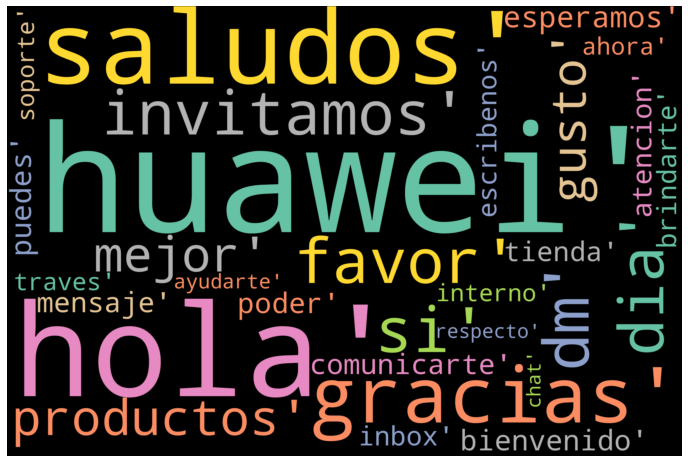

In [ ]:
huawei_word_cloud = WordCloud(width = 3000, height = 2000, random_state=1, max_words=30, background_color='black', \
                            colormap='Set2', collocations=False).generate(str(huawei_filtered_word))
plt.imshow(huawei_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
motorola_filtered_word_freq = FreqDist(motorola_filtered_word)
motorola_filtered_word_freq.most_common(20)

[('motorola', 521),
 ('mensaje', 449),
 ('hellomoto', 351),
 ('motog', 300),
 ('si', 287),
 ('hola', 271),
 ('privado', 244),
 ('necesitas', 236),
 ('gracias', 233),
 ('aun', 222),
 ('soporte', 221),
 ('ayuda', 208),
 ('respuesta', 183),
 ('cuenta', 177),
 ('nuevo', 162),
 ('esperamos', 160),
 ('tienda', 158),
 ('contigo', 150),
 ('comunicamos', 148),
 ('online', 143)]

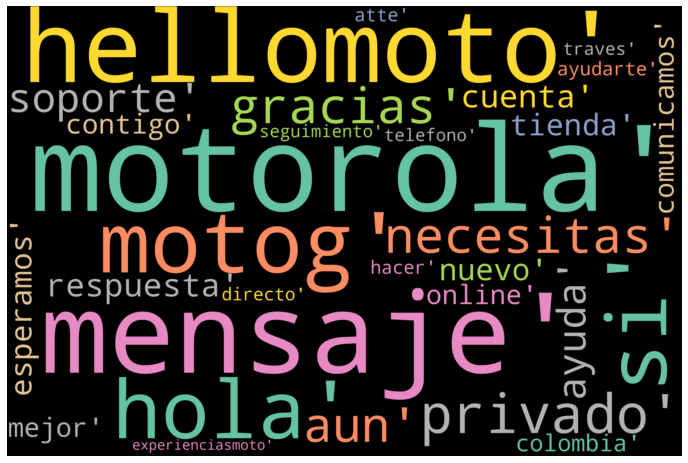

In [ ]:
motorola_word_cloud = WordCloud(width = 3000, height = 2000, random_state=1, max_words=30, background_color='black', \
                            colormap='Set2', collocations=False).generate(str(motorola_filtered_word))
plt.imshow(motorola_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
samsung_filtered_word_freq = FreqDist(samsung_filtered_word)
samsung_filtered_word_freq.most_common(20)

[('hola', 327),
 ('aqui', 221),
 ('saludos', 170),
 ('samsung', 168),
 ('dm', 168),
 ('dia', 159),
 ('atentos', 141),
 ('traves', 131),
 ('ingresa', 115),
 ('ayudarte', 114),
 ('buen', 105),
 ('favor', 104),
 ('medio', 96),
 ('mensaje', 95),
 ('nuevo', 92),
 ('conoceaqui', 85),
 ('galaxy', 85),
 ('puedes', 84),
 ('g', 84),
 ('si', 80)]

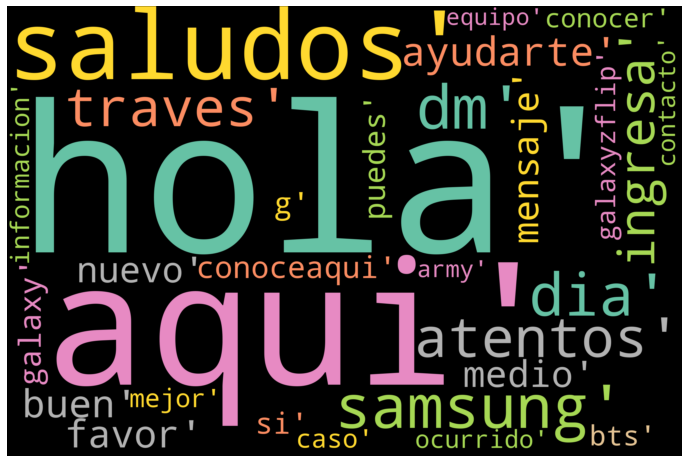

In [ ]:
samsung_word_cloud = WordCloud(width = 3000, height = 2000, random_state=1, max_words=30, \
                           background_color='black',colormap='Set2', \
                           collocations=False).generate(str(samsung_filtered_word))
plt.imshow(samsung_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
xiaomi_filtered_word_freq = FreqDist(xiaomi_filtered_word)
xiaomi_filtered_word_freq.most_common(20)

[('xiaomi', 130),
 ('redminote', 67),
 ('nuevo', 50),
 ('aqui', 48),
 ('nueva', 46),
 ('stores', 42),
 ('pais', 40),
 ('colombia', 40),
 ('serie', 39),
 ('disponible', 38),
 ('lanzamiento', 35),
 ('redmi', 35),
 ('autorizados', 34),
 ('mitpro', 34),
 ('distribuidores', 31),
 ('hoy', 31),
 ('g', 31),
 ('aprovecha', 28),
 ('gracias', 28),
 ('ecosistema', 28)]

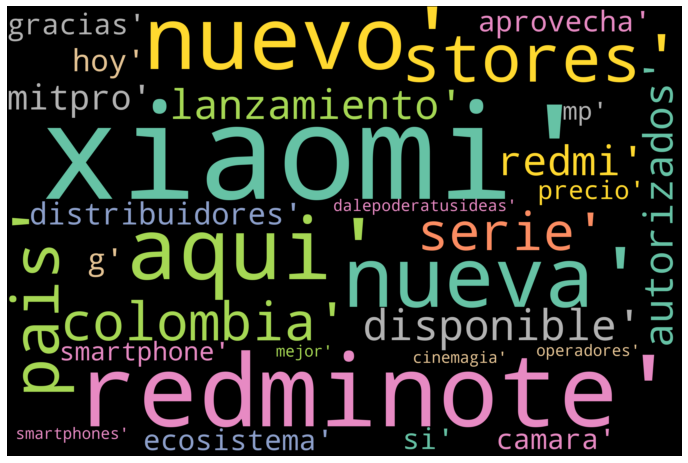

In [ ]:
xiaomi_word_cloud = WordCloud(width = 3000, height = 2000, random_state=1, max_words=30, background_color='black', \
                            colormap='Set2', collocations=False).generate(str(xiaomi_filtered_word))
plt.imshow(xiaomi_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 19. Reconocimiento entidad nombrada
Luego de identificar las palabras con mayor nivel de ocurrencia, continuaremos con la exploración de la información para tratar de resolver nuestra pregunta de investigación, con este fin implementaremos un analisis de reconocimiento de la entidad nombrada.

El objetivo principal del etiquetado de parte del discurso (POS) es identificar el grupo gramatical de una palabra determinada. Ya sea SUSTANTIVO, PRONOMBRE, ADJETIVO, VERBO, ADVERVIO, etc. según el contexto en el que se presenta.

![image-2.png](attachment:image-2.png)imagen.png

Por lo que es fundamental trabajar con la frases originales, sin mayor edición, para garantizar la comprensión del contexto. El etiquetado de POS Tagging asigna la categoria o etiqueta correspondiente a cada palabra de la frase. A continuación se presenta el significado de cada una de las etiquetas:

![image.png](attachment:image.png)imagen-2.png

Teniendo en cuenta que nos interesa identificar asuntos asociados con la forma en que estas Universidades comunican la sostenibilidad, vamos a priorizar la identificación de sustativos (NN) y adjetivos (JJ), para identificar aquellos con mayor nivel de ocurrencia.

Pastel: https://stackoverflow.com/questions/49355114/tagging-a-txt-file-from-inaugural-address-corpus

https://stackoverflow.com/questions/21882460/filter-specific-part-of-speech-nltk

https://stackoverflow.com/questions/33553046/storing-values-from-loop-in-a-list-or-tuple-in-python/33553178

In [ ]:
#open(r"scraped_data_20211005_e.txt", encoding="utf-8").read().replace("'',", "")

huawei_tagged_token = []
#with open(r"scraped_data_20211005_e.txt", encoding="utf-8") as f:
lines = huawei
for i in range(0, len(lines)):
    token_text = word_tokenize(lines[i].lower().replace("á", "a").replace("é", "e").replace("í", "i").\
                                   replace("ó", "o").replace("ú", "u"))
    huawei_tagged_token += nltk.pos_tag(token_text)

In [ ]:
#open(r"scraped_data_20211005_e.txt", encoding="utf-8").read().replace("'',", "")

motorola_tagged_token = []
#with open(r"scraped_data_20211005_e.txt", encoding="utf-8") as f:
lines = motorola
for i in range(0, len(lines)):
    token_text = word_tokenize(lines[i].lower().replace("á", "a").replace("é", "e").replace("í", "i").\
                                   replace("ó", "o").replace("ú", "u"))
    motorola_tagged_token += nltk.pos_tag(token_text)

In [ ]:
#open(r"scraped_data_20211005_e.txt", encoding="utf-8").read().replace("'',", "")

samsung_tagged_token = []
#with open(r"scraped_data_20211005_e.txt", encoding="utf-8") as f:
lines = samsung
for i in range(0, len(lines)):
    token_text = word_tokenize(lines[i].lower().replace("á", "a").replace("é", "e").replace("í", "i").\
                                   replace("ó", "o").replace("ú", "u"))
    samsung_tagged_token += nltk.pos_tag(token_text)

In [ ]:
#open(r"scraped_data_20211005_e.txt", encoding="utf-8").read().replace("'',", "")

xiaomi_tagged_token = []
#with open(r"scraped_data_20211005_e.txt", encoding="utf-8") as f:
lines = xiaomi
for i in range(0, len(lines)):
    token_text = word_tokenize(lines[i].lower().replace("á", "a").replace("é", "e").replace("í", "i").\
                                   replace("ó", "o").replace("ú", "u"))
    xiaomi_tagged_token += nltk.pos_tag(token_text)

Como estamos trabajando con la base de datos original, es nesamsungario limpiar más los tokens, por lo que retiraremos las palabras vacias (stopwords) y otras palabras que detectamos como innesamsungarias, para identificar aquellos sustantivos y adjetivos que mayor ocurrencia tienen.

In [ ]:
stop_words=set(stopwords.words("spanish"))
print(stop_words)

{'soy', 'habrá', 'hubiésemos', 'será', 'serán', 'estarías', 'estamos', 'teníamos', 'sentido', 'un', 'que', 'tenga', 'erais', 'nuestro', 'está', 'estadas', 'seríamos', 'vuestros', 'estaría', 'habrían', 'tengas', 'hay', 'el', 'tenidos', 'otro', 'teniendo', 'serías', 'algunos', 'ellos', 'ellas', 'nada', 'estuvisteis', 'os', 'por', 'tendremos', 'estados', 'ante', 'habida', 'habríais', 'tendrás', 'tendría', 'también', 'hubiese', 'seas', 'tendrán', 'estarán', 'nuestros', 'nosotros', 'fui', 'estuviésemos', 'son', 'estarás', 'cual', 'habíamos', 'a', 'seremos', 'y', 'sentidos', 'sentida', 'desde', 'habré', 'entre', 'estuviese', 'tendrían', 'eran', 'tenía', 'eso', 'fueses', 'habéis', 'algo', 'somos', 'la', 'una', 'tuyas', 'están', 'hubimos', 'suyos', 'uno', 'de', 'tendrías', 'estén', 'e', 'tenidas', 'estoy', 'estás', 'ha', 'estas', 'mío', 'haya', 'habría', 'fuerais', 'suyo', 'habremos', 'tuvieses', 'nos', 'tenían', 'hubisteis', 'fueron', 'hubieran', 'sois', 'suyas', 'tuyo', 'tuviesen', 'mis', 'n

In [ ]:
palbras_inn = {'ver', 'mas','https','http'}

In [ ]:
nn_huawei_tags = [t for t in huawei_tagged_token if t[1] == "NN"]
nn_huawei_tags_1 = [t for t in nn_huawei_tags if t[0] not in stopwords.words("spanish")]
nn_huawei_tags_2 = [t for t in nn_huawei_tags_1 if t[0] not in palbras_inn]

nn_huawei_tags_freq = FreqDist(nn_huawei_tags_2)
nn_huawei_tags_freq.most_common(30)

[(('huawei', 'NN'), 613),
 (('¡saludos', 'NN'), 254),
 (('¡hola', 'NN'), 198),
 (('gracias', 'NN'), 143),
 (('dm', 'NN'), 126),
 (('favor', 'NN'), 123),
 (('dia', 'NN'), 114),
 (('poder', 'NN'), 101),
 (('informacion', 'NN'), 99),
 (('atencion', 'NN'), 99),
 (('gusto', 'NN'), 95),
 (('productos', 'NN'), 93),
 (('brindarte', 'NN'), 90),
 (('esperamos', 'NN'), 83),
 (('comunicarte', 'NN'), 83),
 (('🤗', 'NN'), 82),
 (('🤩', 'NN'), 79),
 (('bienvenido', 'NN'), 78),
 (('mensaje', 'NN'), 76),
 (('si', 'NN'), 70),
 (('ayudarte', 'NN'), 59),
 (('consulta', 'NN'), 57),
 (('✌', 'NN'), 56),
 (('😊', 'NN'), 56),
 (('inbox', 'NN'), 52),
 (('aqui', 'NN'), 52),
 (('conoce', 'NN'), 49),
 (('conocer', 'NN'), 47),
 (('tienda', 'NN'), 47),
 (('muchas', 'NN'), 46)]

In [ ]:
jj_huawei_tags = [t for t in huawei_tagged_token if t[1] == "JJ"]
jj_huawei_tags_1 = [t for t in jj_huawei_tags if t[0] not in stopwords.words("spanish")]
jj_huawei_tags_2 = [t for t in jj_huawei_tags_1 if t[0] not in palbras_inn]

jj_huawei_tags_freq = FreqDist(jj_huawei_tags_2)
jj_huawei_tags_freq.most_common(30)

[(('@', 'JJ'), 613),
 (('escribenos', 'JJ'), 69),
 (('mejor', 'JJ'), 63),
 (('si', 'JJ'), 58),
 (('envianos', 'JJ'), 45),
 (('nuevo', 'JJ'), 43),
 (('escribirnos', 'JJ'), 39),
 (('agradecemos', 'JJ'), 38),
 (('alegra', 'JJ'), 37),
 (('huawei', 'JJ'), 36),
 (('¡te', 'JJ'), 34),
 (('gracias', 'JJ'), 33),
 (('👉', 'JJ'), 32),
 (('encanta', 'JJ'), 31),
 (('app', 'JJ'), 29),
 (('¡feliz', 'JJ'), 29),
 (('experiencias', 'JJ'), 24),
 (('virtual', 'JJ'), 24),
 (('ahora', 'JJ'), 23),
 (('queremos', 'JJ'), 22),
 (('gusto', 'JJ'), 22),
 (('adicional', 'JJ'), 21),
 (('feliz', 'JJ'), 20),
 (('lamentamos', 'JJ'), 19),
 (('nuevos', 'JJ'), 19),
 (('posible', 'JJ'), 18),
 (('duda', 'JJ'), 18),
 (('oficial', 'JJ'), 18),
 (('nueva', 'JJ'), 17),
 (('experiencia', 'JJ'), 16)]

In [ ]:
nn_motorola_tags = [t for t in motorola_tagged_token if t[1] == "NN"]
nn_motorola_tags_1 = [t for t in nn_motorola_tags if t[0] not in stopwords.words("spanish")]
nn_motorola_tags_2 = [t for t in nn_motorola_tags_1 if t[0] not in palbras_inn]

nn_motorola_tags_freq = FreqDist(nn_motorola_tags_2)
nn_motorola_tags_freq.most_common(30)

[(('motorola', 'NN'), 379),
 (('mensaje', 'NN'), 345),
 (('hellomoto', 'NN'), 308),
 (('si', 'NN'), 263),
 (('privado', 'NN'), 235),
 (('soporte', 'NN'), 204),
 (('gracias', 'NN'), 184),
 (('respuesta', 'NN'), 179),
 (('hola', 'NN'), 170),
 (('cuenta', 'NN'), 159),
 (('colombia', 'NN'), 132),
 (('ayudarte', 'NN'), 126),
 (('atte', 'NN'), 122),
 (('hacer', 'NN'), 115),
 (('aun', 'NN'), 110),
 (('directo', 'NN'), 110),
 (('telefono', 'NN'), 104),
 (('seguimiento', 'NN'), 103),
 (('sugerencia', 'NN'), 102),
 (('funciono', 'NN'), 102),
 (('experienciasmoto', 'NN'), 99),
 (('publico/mensaje', 'NN'), 93),
 (('saludarte', 'NN'), 93),
 (('favor', 'NN'), 92),
 (('¡hola', 'NN'), 92),
 (('contigo', 'NN'), 87),
 (('gusto', 'NN'), 87),
 (('quisieramos', 'NN'), 85),
 (('@', 'NN'), 83),
 (('poder', 'NN'), 81)]

In [ ]:
jj_motorola_tags = [t for t in motorola_tagged_token if t[1] == "JJ"]
jj_motorola_tags_1 = [t for t in jj_motorola_tags if t[0] not in stopwords.words("spanish")]
jj_motorola_tags_2 = [t for t in jj_motorola_tags_1 if t[0] not in palbras_inn]

jj_motorola_tags_freq = FreqDist(jj_motorola_tags_2)
jj_motorola_tags_freq.most_common(30)

[(('@', 'JJ'), 559),
 (('si', 'JJ'), 119),
 (('aun', 'JJ'), 102),
 (('comunicate', 'JJ'), 102),
 (('nuevo', 'JJ'), 91),
 (('oficial', 'JJ'), 89),
 (('contigo', 'JJ'), 63),
 (('motog9', 'JJ'), 56),
 (('hellomoto', 'JJ'), 50),
 (('celular', 'JJ'), 44),
 (('👉', 'JJ'), 43),
 (('mejor', 'JJ'), 39),
 (('📲', 'JJ'), 33),
 (('alli', 'JJ'), 33),
 (('gracias', 'JJ'), 31),
 (('cada', 'JJ'), 30),
 (('//t.co/bsxohcqzxm', 'JJ'), 26),
 (('//t.co/89axmly8c7', 'JJ'), 26),
 (('llega', 'JJ'), 26),
 (('alfredo', 'JJ'), 23),
 (('🤔', 'JJ'), 23),
 (('esperamos', 'JJ'), 23),
 (('util', 'JJ'), 22),
 (('maximo', 'JJ'), 21),
 (('📱', 'JJ'), 21),
 (('ultra', 'JJ'), 21),
 (('familia', 'JJ'), 20),
 (('¿cual', 'JJ'), 20),
 (('mucha', 'JJ'), 19),
 (('duda', 'JJ'), 19)]

In [ ]:
nn_samsung_tags = [t for t in samsung_tagged_token if t[1] == "NN"]
nn_samsung_tags_1 = [t for t in nn_samsung_tags if t[0] not in stopwords.words("spanish")]
nn_samsung_tags_2 = [t for t in nn_samsung_tags_1 if t[0] not in palbras_inn]

nn_samsung_tags_freq = FreqDist(nn_samsung_tags_2)
nn_samsung_tags_freq.most_common(30)

[(('aqui', 'NN'), 267),
 (('hola', 'NN'), 196),
 (('¡hola', 'NN'), 154),
 (('saludos', 'NN'), 151),
 (('dia', 'NN'), 148),
 (('conoce', 'NN'), 146),
 (('//t.co/6hwnt3w7w0', 'NN'), 102),
 (('samsung', 'NN'), 100),
 (('favor', 'NN'), 97),
 (('medio', 'NN'), 93),
 (('ayudarte', 'NN'), 90),
 (('informacion', 'NN'), 75),
 (('conocer', 'NN'), 72),
 (('atentos', 'NN'), 70),
 (('galaxy', 'NN'), 68),
 (('mensaje', 'NN'), 57),
 (('caso', 'NN'), 56),
 (('descubre', 'NN'), 54),
 (('si', 'NN'), 49),
 (('dejamos', 'NN'), 46),
 (('dm', 'NN'), 44),
 (('datos', 'NN'), 41),
 (('@', 'NN'), 40),
 (('buen', 'NN'), 40),
 (('solicitud', 'NN'), 36),
 (('equipo', 'NN'), 35),
 (('smartphone', 'NN'), 34),
 (('contigo', 'NN'), 33),
 (('amp', 'NN'), 33),
 (('disfruta', 'NN'), 32)]

In [ ]:
jj_samsung_tags = [t for t in samsung_tagged_token if t[1] == "JJ"]
jj_samsung_tags_1 = [t for t in jj_samsung_tags if t[0] not in stopwords.words("spanish")]
jj_samsung_tags_2 = [t for t in jj_samsung_tags_1 if t[0] not in palbras_inn]

jj_samsung_tags_freq = FreqDist(jj_samsung_tags_2)
jj_samsung_tags_freq.most_common(30)

[(('@', 'JJ'), 410),
 (('👉', 'JJ'), 78),
 (('ingresa', 'JJ'), 75),
 (('buen', 'JJ'), 58),
 (('aqui', 'JJ'), 55),
 (('feliz', 'JJ'), 32),
 (('nuevo', 'JJ'), 32),
 (('queremos', 'JJ'), 29),
 (('expandetumundo', 'JJ'), 28),
 (('celular', 'JJ'), 27),
 (('oficial', 'JJ'), 27),
 (('nuevos', 'JJ'), 26),
 (('ocurrido', 'JJ'), 22),
 (('mejor', 'JJ'), 22),
 (('si', 'JJ'), 21),
 (('🙋\u200d♂️', 'JJ'), 21),
 (('galaxyzflip4', 'JJ'), 19),
 (('escribenos', 'JJ'), 17),
 (('envianos', 'JJ'), 16),
 (('posible', 'JJ'), 15),
 (('conoce', 'JJ'), 14),
 (('blue', 'JJ'), 14),
 (('aplican', 'JJ'), 14),
 (('👉🏻', 'JJ'), 14),
 (('conectadosenfamilia', 'JJ'), 13),
 (('ayudarte', 'JJ'), 13),
 (('samsungunpacked', 'JJ'), 13),
 (('clic', 'JJ'), 13),
 (('increible', 'JJ'), 12),
 (('ahora', 'JJ'), 12)]

In [ ]:
nn_xiaomi_tags = [t for t in xiaomi_tagged_token if t[1] == "NN"]
nn_xiaomi_tags_1 = [t for t in nn_xiaomi_tags if t[0] not in stopwords.words("spanish")]
nn_xiaomi_tags_2 = [t for t in nn_xiaomi_tags_1 if t[0] not in palbras_inn]

nn_xiaomi_tags_freq = FreqDist(nn_xiaomi_tags_2)
nn_xiaomi_tags_freq.most_common(30)

[(('pais', 'NN'), 39),
 (('colombia', 'NN'), 29),
 (('hoy', 'NN'), 27),
 (('smartphone', 'NN'), 24),
 (('aqui', 'NN'), 23),
 (('soporte', 'NN'), 23),
 (('camara', 'NN'), 21),
 (('redmi', 'NN'), 21),
 (('si', 'NN'), 21),
 (('@', 'NN'), 20),
 (('ecosistema', 'NN'), 19),
 (('poder', 'NN'), 19),
 (('pantalla', 'NN'), 18),
 (('atencion', 'NN'), 18),
 (('miinsider', 'NN'), 17),
 (('mi11lite5g', 'NN'), 16),
 (('falabella', 'NN'), 15),
 (('precio', 'NN'), 15),
 (('linea', 'NN'), 15),
 (('center', 'NN'), 15),
 (('📨', 'NN'), 15),
 (('email', 'NN'), 15),
 (('service.co', 'NN'), 15),
 (('support.mi.com', 'NN'), 15),
 (('dia', 'NN'), 14),
 (('gran', 'NN'), 14),
 (('serie', 'NN'), 14),
 (('dias', 'NN'), 13),
 (('note', 'NN'), 13),
 (('cinemagia', 'NN'), 13)]

In [ ]:
jj_xiaomi_tags = [t for t in xiaomi_tagged_token if t[1] == "JJ"]
jj_xiaomi_tags_1 = [t for t in jj_xiaomi_tags if t[0] not in stopwords.words("spanish")]
jj_xiaomi_tags_2 = [t for t in jj_xiaomi_tags_1 if t[0] not in palbras_inn]

jj_xiaomi_tags_freq = FreqDist(jj_xiaomi_tags_2)
jj_xiaomi_tags_freq.most_common(30)

[(('@', 'JJ'), 43),
 (('disponible', 'JJ'), 37),
 (('nuevo', 'JJ'), 27),
 (('nueva', 'JJ'), 24),
 (('mi10tpro', 'JJ'), 18),
 (('dalepoderatusideas', 'JJ'), 18),
 (('aqui', 'JJ'), 16),
 (('especial', 'JJ'), 15),
 (('xiaomi', 'JJ'), 15),
 (('comercial', 'JJ'), 14),
 (('oficial', 'JJ'), 14),
 (('xiaomicolombia', 'JJ'), 14),
 (('xiaomi11tpro', 'JJ'), 13),
 (('encuentra', 'JJ'), 12),
 (('innovacionparatodos', 'JJ'), 12),
 (('p.m', 'JJ'), 12),
 (('👉', 'JJ'), 12),
 (('aprovecha', 'JJ'), 12),
 (('superaeldesafio', 'JJ'), 12),
 (('xiaomiescolombia', 'JJ'), 10),
 (('muestratuestilo', 'JJ'), 10),
 (('redminote10pro', 'JJ'), 9),
 (('¿cual', 'JJ'), 9),
 (('mejor', 'JJ'), 9),
 (('llega', 'JJ'), 9),
 (('local', 'JJ'), 9),
 (('//t.co/k0nand9jqp', 'JJ'), 8),
 (('live', 'JJ'), 8),
 (('cinemagia', 'JJ'), 8),
 (('//t.co/7srdehhgzd', 'JJ'), 8)]

20. Distribución de frecuencias
Luego de tener el reconocimiento de la entidad nombrada, a continuación revisaremos la distribución de frecuencias para identificar aquellas palabras que presentan una mayor ocurrencia, es decir los sustantivos y adjetivos más populares en las comunicaciones de cada universidad.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129303 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9996 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128522 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129303 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129321 missing from

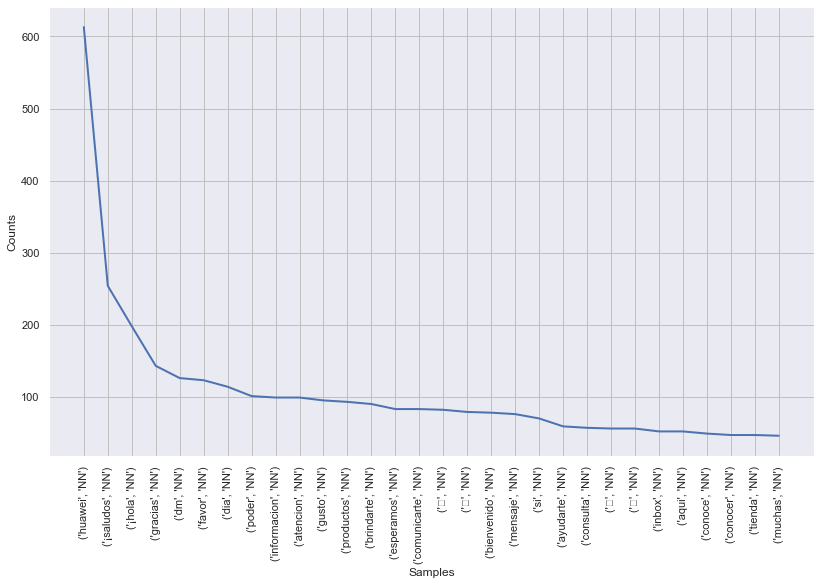

<Figure size 3600x3600 with 0 Axes>

In [ ]:
nn_huawei_tags_freq.plot(30,cumulative=False)
plt.figure(figsize = (50,50))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128073 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128073 missing from current font.
  font.set_text(s, 0, flags=flags)


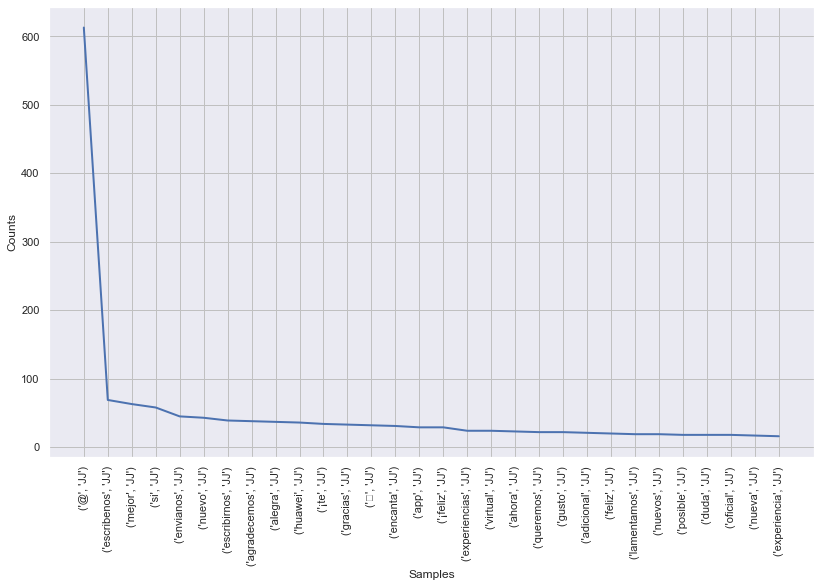

<Figure size 3600x3600 with 0 Axes>

In [ ]:
jj_huawei_tags_freq.plot(30,cumulative=False)
plt.figure(figsize = (50,50))
plt.show()

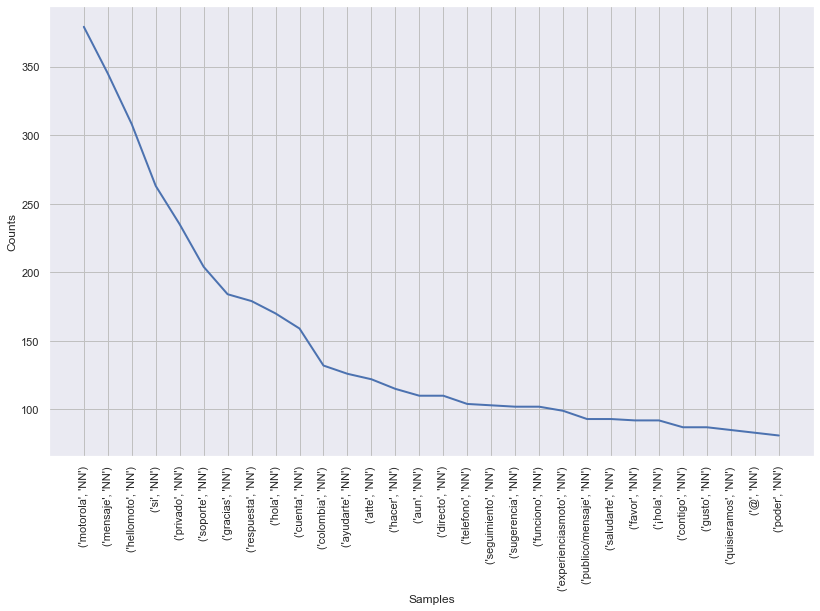

<Figure size 3600x3600 with 0 Axes>

In [ ]:
nn_motorola_tags_freq.plot(30,cumulative=False)
plt.figure(figsize = (50,50))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128242 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128241 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128242 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128241 missing from

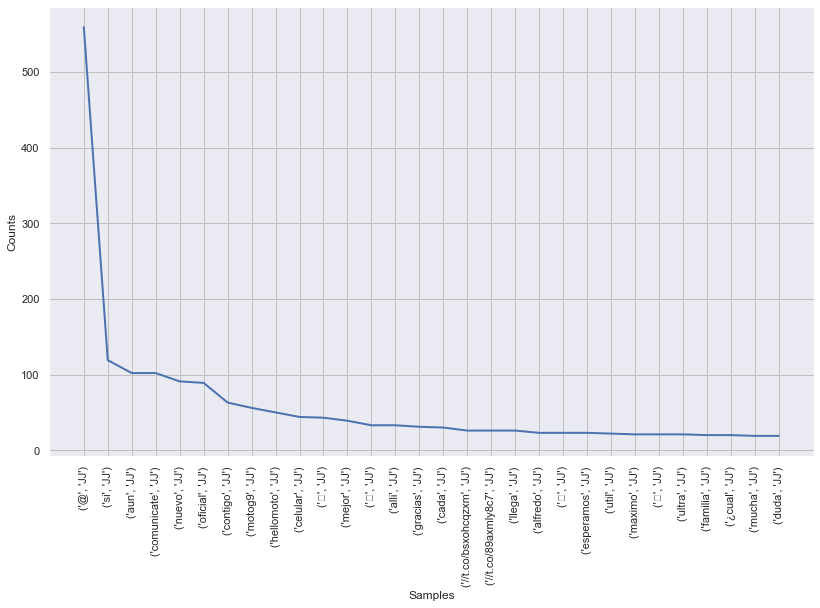

<Figure size 3600x3600 with 0 Axes>

In [ ]:
jj_motorola_tags_freq.plot(30,cumulative=False)
plt.figure(figsize = (50,50))
plt.show()

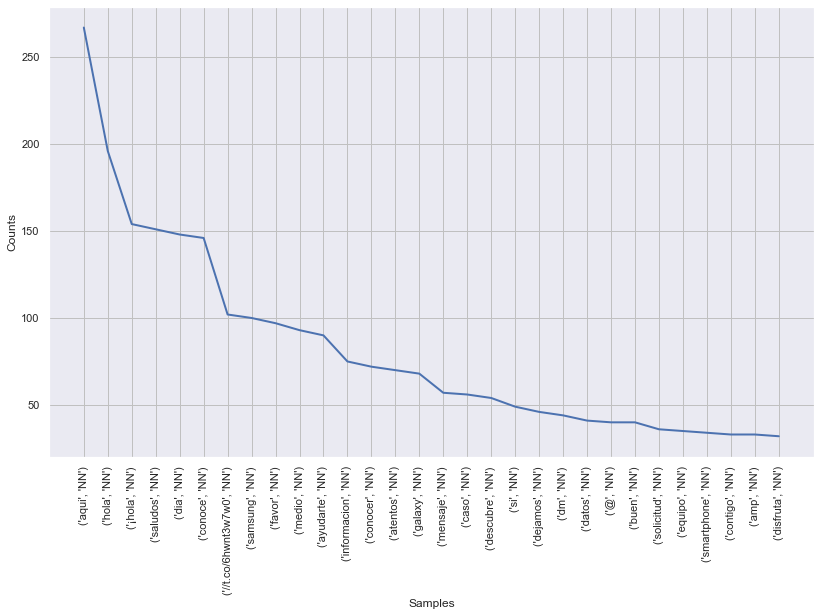

<Figure size 3600x3600 with 0 Axes>

In [ ]:
nn_samsung_tags_freq.plot(30,cumulative=False)
plt.figure(figsize = (50,50))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128587 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128587 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127995 missing from c

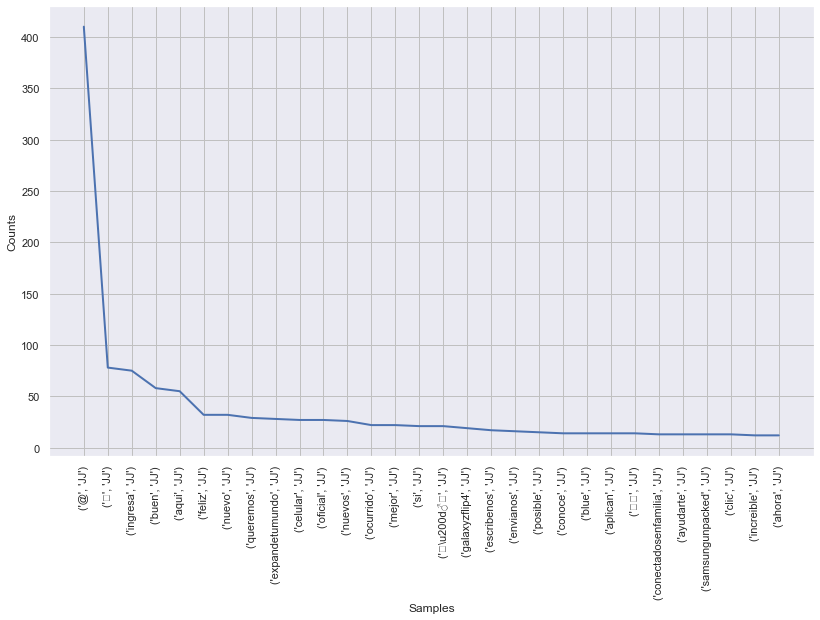

<Figure size 3600x3600 with 0 Axes>

In [ ]:
jj_samsung_tags_freq.plot(30,cumulative=False)
plt.figure(figsize = (50,50))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128232 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128232 missing from current font.
  font.set_text(s, 0, flags=flags)


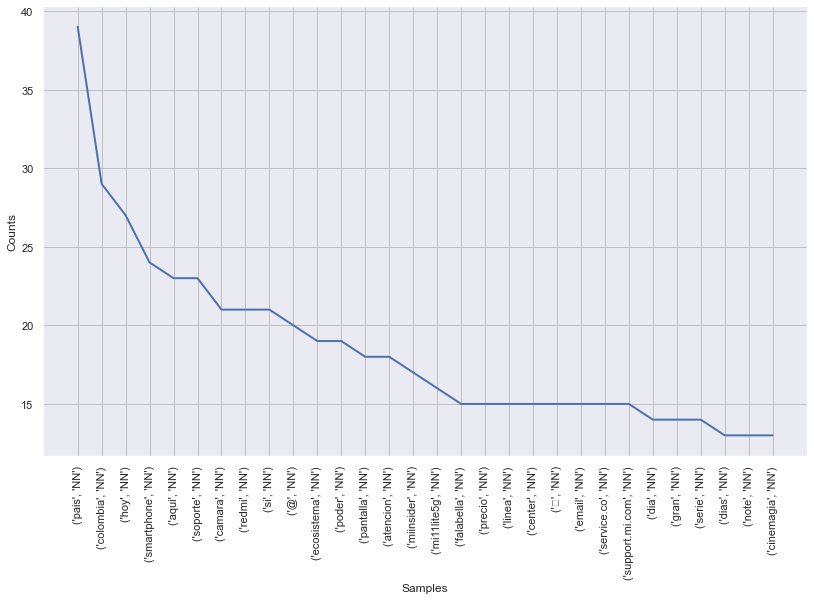

<Figure size 3600x3600 with 0 Axes>

In [ ]:
nn_xiaomi_tags_freq.plot(30,cumulative=False)
plt.figure(figsize = (50,50))
plt.show()

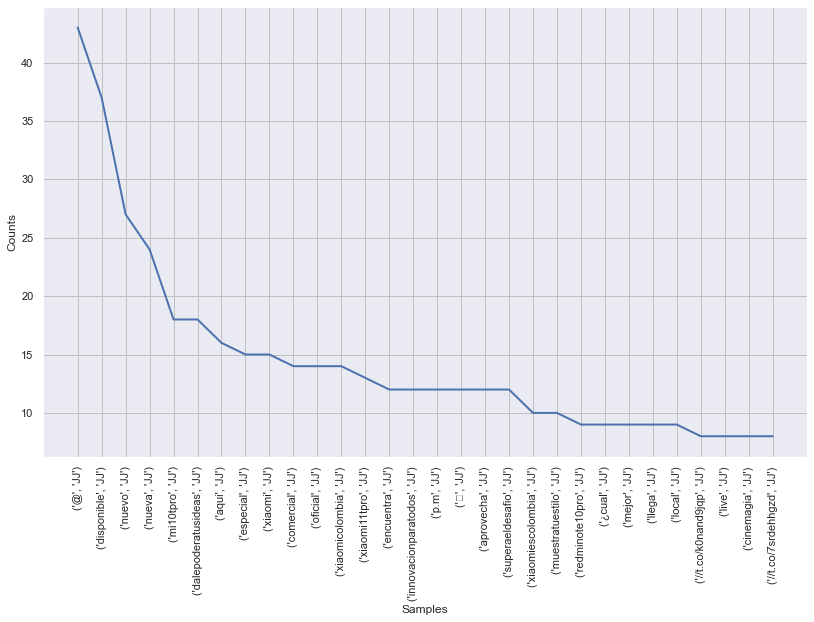

<Figure size 3600x3600 with 0 Axes>

In [ ]:
jj_xiaomi_tags_freq.plot(30,cumulative=False)
plt.figure(figsize = (50,50))
plt.show()

# 21. Análisis de sentimientos¶
Tras completar el segundo análisis exploratorio de la información, a continuación realizaremos un analisis de sentimientos para tratar de identificar el tono general -i.e., Netro, positivo o negativo- de cada uno de los post que hacen las universidades.

Pastel: https://datascience.stackexchange.com/questions/6691/sentiment-analysis-model-for-spanish

https://stackoverflow.com/questions/8899905/count-number-of-occurrensamsung-of-a-substring-in-a-string

In [ ]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")

loading configuration file https://huggingface.co/pysentimiento/robertuito-sentiment-analysis/resolve/main/config.json from cache at C:\Users\ESTUDIANTE/.cache\huggingface\transformers\034fd09e9530137fb6e6c042529972a92619fb02df8b40e7a4cfc50090943c46.98e658c5b8878c67807e3287b07db9608dbd08a5b69ce09979c447190bbe8077
Model config RobertaConfig {
  "_name_or_path": "pysentimiento/robertuito-sentiment-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEG",
    "1": "NEU",
    "2": "POS"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEG": 0,
    "NEU": 1,
    "POS": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "num_attention_heads": 12

In [ ]:
huawei_sentiment = []
#with open(r"scraped_data_20211005_e.txt", encoding="utf-8") as f:
lines = huawei
for i in lines:
    sentiment_huawei = analyzer.predict(i)
    huawei_sentiment.append(sentiment_huawei)

In [ ]:
huawei_sentiment_string = str(huawei_sentiment)
huawei_sentiment_string_POS = huawei_sentiment_string.count("output=POS")
huawei_sentiment_string_NEU = huawei_sentiment_string.count("output=NEU")
huawei_sentiment_string_NEG = huawei_sentiment_string.count("output=NEG")

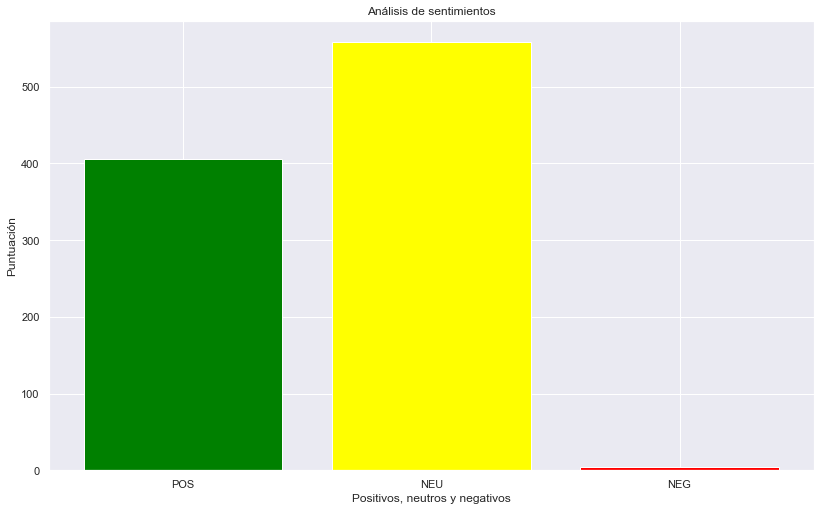

In [ ]:
sentimiento = ['POS','NEU','NEG']
valor = [huawei_sentiment_string_POS,huawei_sentiment_string_NEU,huawei_sentiment_string_NEG]
semaforo = ['green', 'yellow', 'red']

plt.bar(sentimiento, valor, color=semaforo)
plt.title('Análisis de sentimientos')
plt.xlabel('Positivos, neutros y negativos')
plt.ylabel('Puntuación')
plt.show()

In [ ]:
motorola_sentiment = []
#with open(r"scraped_data_20211005_e.txt", encoding="utf-8") as f:
lines = motorola
for i in lines:
    sentiment_motorola = analyzer.predict(i)
    motorola_sentiment.append(sentiment_motorola)

In [ ]:
motorola_sentiment_string = str(motorola_sentiment)
motorola_sentiment_string_POS = motorola_sentiment_string.count("output=POS")
motorola_sentiment_string_NEU = motorola_sentiment_string.count("output=NEU")
motorola_sentiment_string_NEG = motorola_sentiment_string.count("output=NEG")

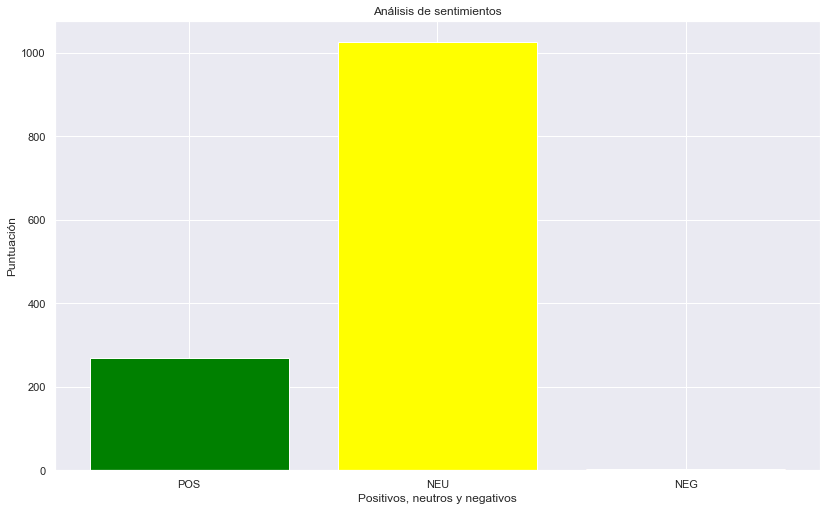

In [ ]:
sentimiento = ['POS','NEU','NEG']
valor = [motorola_sentiment_string_POS,motorola_sentiment_string_NEU,motorola_sentiment_string_NEG]
semaforo = ['green', 'yellow', 'red']

plt.bar(sentimiento, valor, color=semaforo)
plt.title('Análisis de sentimientos')
plt.xlabel('Positivos, neutros y negativos')
plt.ylabel('Puntuación')
plt.show()

In [ ]:
samsung_sentiment = []
#with open(r"scraped_data_20211005_e.txt", encoding="utf-8") as f:
lines = samsung
for i in lines:
    sentiment_samsung = analyzer.predict(i)
    samsung_sentiment.append(sentiment_samsung)

In [ ]:
samsung_sentiment_string = str(samsung_sentiment)
samsung_sentiment_string_POS = samsung_sentiment_string.count("output=POS")
samsung_sentiment_string_NEU = samsung_sentiment_string.count("output=NEU")
samsung_sentiment_string_NEG = samsung_sentiment_string.count("output=NEG")

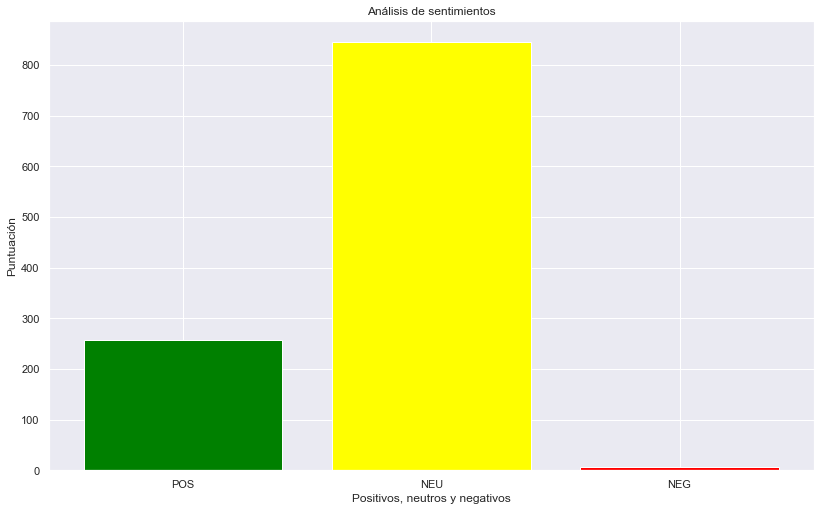

In [ ]:
sentimiento = ['POS','NEU','NEG']
valor = [samsung_sentiment_string_POS,samsung_sentiment_string_NEU,samsung_sentiment_string_NEG]
semaforo = ['green', 'yellow', 'red']

plt.bar(sentimiento, valor, color=semaforo)
plt.title('Análisis de sentimientos')
plt.xlabel('Positivos, neutros y negativos')
plt.ylabel('Puntuación')
plt.show()

In [ ]:
xiaomi_sentiment = []
#with open(r"scraped_data_20211005_e.txt", encoding="utf-8") as f:
lines = xiaomi
for i in lines:
    sentiment_xiaomi = analyzer.predict(i)
    xiaomi_sentiment.append(sentiment_xiaomi)

In [ ]:
xiaomi_sentiment_string = str(xiaomi_sentiment)
xiaomi_sentiment_string_POS = xiaomi_sentiment_string.count("output=POS")
xiaomi_sentiment_string_NEU = xiaomi_sentiment_string.count("output=NEU")
xiaomi_sentiment_string_NEG = xiaomi_sentiment_string.count("output=NEG")

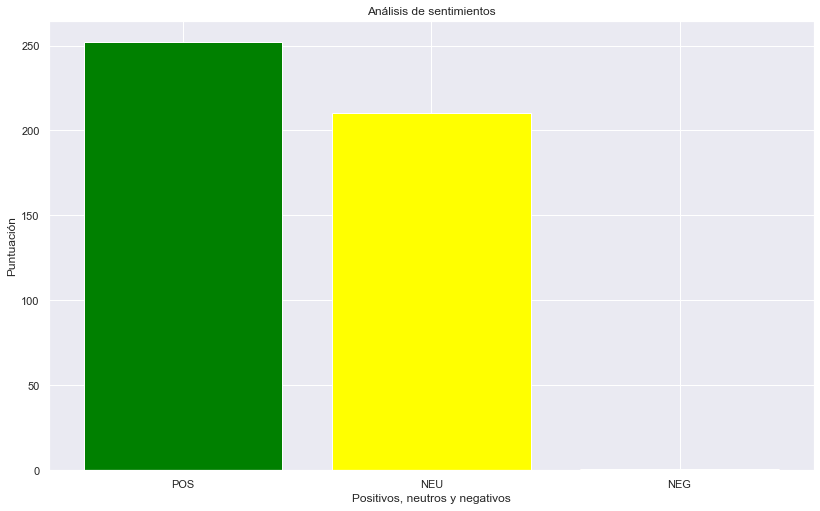

In [ ]:
sentimiento = ['POS','NEU','NEG']
valor = [xiaomi_sentiment_string_POS,xiaomi_sentiment_string_NEU,xiaomi_sentiment_string_NEG]
semaforo = ['green', 'yellow', 'red']

plt.bar(sentimiento, valor, color=semaforo)
plt.title('Análisis de sentimientos')
plt.xlabel('Positivos, neutros y negativos')
plt.ylabel('Puntuación')
plt.show()

# 22. Consolidar base de datos para análisis de regresión¶
A continuación se consolida la base de datos para el posterior analisis de regresión, las fases en las que se aplica este analisis son:

1.Consolidar las bases de datos de las 5 universidades
2.Seleccionar elementos únicos (pastel: https://stackoverflow.com/questions/43184491/df-unique-on-whole-dataframe-based-on-a-column)
3.Ejecutar el analisis de sentimientos a la base de datos consolidada (pastel: https://stackoverflow.com/questions/68416974/convert-string-to-colum)
4.Crear una variable en donde se haga referencia a la sostenibilidad (pastel: https://stackoverflow.com/questions/36701689/assign-value-to-a-pandas-dataframe-column-based-on-string-condition)
5.Seleccionar las columnas de interes

Consolidar las bases de datos de las 5 universidades

In [ ]:
import pandas as pd
import glob

path = r'C:\Users\ESTUDIANTE\Scrap Twitter\twint\data\all'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

all_HEIS = pd.concat(li, axis=0, ignore_index=True)

Seleccionar elementos únicos (pastel: https://stackoverflow.com/questions/43184491/df-unique-on-whole-dataframe-based-on-a-column)

In [ ]:
all_HEIS_unique = all_HEIS.drop_duplicates(subset=['tweet'])
all_HEIS_unique.head(2)

id      conversation_id  \
0  1254112666119032833  1254110673438679041   
1  1254032473895448576  1254032473895448576   

                                          created_at        date      time  \
0  2020-04-25 13:18:54 Hora de verano central (Mé...  2020-04-25  13:18:54   
1  2020-04-25 08:00:15 Hora de verano central (Mé...  2020-04-25  08:00:15   

   timezone    user_id        username            name  place  ... geo source  \
0      -500  501372328  huaweimobileco  HuaweiMobileCo    NaN  ... NaN    NaN   
1      -500  501372328  huaweimobileco  HuaweiMobileCo    NaN  ... NaN    NaN   

  user_rt_id user_rt retweet_id  reply_to  retweet_date  translate trans_src  \
0        NaN     NaN        NaN        []           NaN        NaN       NaN   
1        NaN     NaN        NaN        []           NaN        NaN       NaN   

  trans_dest  
0        NaN  
1        NaN  

[2 rows x 36 columns]

Ejecutar el analisis de sentimientos a la base de datos consolidada (pastel: https://stackoverflow.com/questions/68416974/convert-string-to-colum)

In [ ]:
#analyzer = SentimentAnalyzer(lang="es")


def prosamsungs(row):
    res = analyzer.predict(row["tweet"])
    return pd.Series({'sentiment': res.output, **res.probas})


all_HEIS_unique_sentiment = all_HEIS_unique.join(all_HEIS.apply(prosamsungs, axis=1))

Crear una variable en donde se haga referencia a la sostenibilidad (pastel: https://stackoverflow.com/questions/36701689/assign-value-to-a-pandas-dataframe-column-based-on-string-condition)

In [ ]:
all_HEIS_unique_sentiment.loc[all_HEIS_unique_sentiment['tweet'].str.contains("mejor"),'post_mejor'] = '1'

In [ ]:
all_HEIS_unique_sentiment.head(2)

id      conversation_id  \
0  1254112666119032833  1254110673438679041   
1  1254032473895448576  1254032473895448576   

                                          created_at        date      time  \
0  2020-04-25 13:18:54 Hora de verano central (Mé...  2020-04-25  13:18:54   
1  2020-04-25 08:00:15 Hora de verano central (Mé...  2020-04-25  08:00:15   

   timezone    user_id        username            name  place  ... reply_to  \
0      -500  501372328  huaweimobileco  HuaweiMobileCo    NaN  ...       []   
1      -500  501372328  huaweimobileco  HuaweiMobileCo    NaN  ...       []   

  retweet_date translate trans_src trans_dest  sentiment       NEG       NEU  \
0          NaN       NaN       NaN        NaN        NEU  0.005391  0.910900   
1          NaN       NaN       NaN        NaN        NEU  0.003311  0.814233   

        POS post_mejor  
0  0.083709        NaN  
1  0.182456          1  

[2 rows x 41 columns]

Seleccionar las columnas de interes

In [ ]:
all_HEIS_unique_sentiment_filter = all_HEIS_unique_sentiment[["id", "time", "username", "mentions", "urls", "photos", "replies_count", "retweets_count", "likes_count", "hashtags", "video", "reply_to", "sentiment", "NEG", "NEU", "POS", "post_mejor"]]
all_HEIS_unique_sentiment_filter.head(2)

id      time        username mentions  \
0  1254112666119032833  13:18:54  huaweimobileco       []   
1  1254032473895448576  08:00:15  huaweimobileco       []   

                                    urls  \
0                                     []   
1  ['https://bit.ly/AppGalleryServices']   

                                              photos  replies_count  \
0                                                 []              0   
1  ['https://pbs.twimg.com/media/EWc3447WsAENg6S....              2   

   retweets_count  likes_count           hashtags  video reply_to sentiment  \
0               0            0                 []      0       []       NEU   
1             154          136  ['quédateencasa']      1       []       NEU   

        NEG       NEU       POS post_mejor  
0  0.005391  0.910900  0.083709        NaN  
1  0.003311  0.814233  0.182456          1

# 23. Transformación de variables¶
A continuacion, se verifica cada una de las variables de interes, y se tranforman aquellas que no se ajustan a los esquemas de regresión de interes.

In [ ]:
all_HEIS_unique_sentiment_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3838 entries, 0 to 4112
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3838 non-null   int64  
 1   time            3838 non-null   object 
 2   username        3838 non-null   object 
 3   mentions        3838 non-null   object 
 4   urls            3838 non-null   object 
 5   photos          3838 non-null   object 
 6   replies_count   3838 non-null   int64  
 7   retweets_count  3838 non-null   int64  
 8   likes_count     3838 non-null   int64  
 9   hashtags        3838 non-null   object 
 10  video           3838 non-null   int64  
 11  reply_to        3838 non-null   object 
 12  sentiment       3838 non-null   object 
 13  NEG             3838 non-null   float64
 14  NEU             3838 non-null   float64
 15  POS             3838 non-null   float64
 16  post_mejor      411 non-null    object 
dtypes: float64(3), int64(5), object(9

Convertir la columna "time" en formato de tiempo, para extraer la hora del día en que se hace el post

In [ ]:
all_HEIS_filter_hour = pd.DataFrame()
all_HEIS_filter_hour['time'] = pd.to_datetime(all_HEIS_unique_sentiment_filter['time'], format='%H:%M:%S')
all_HEIS_filter_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3838 entries, 0 to 4112
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    3838 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 189.0 KB


In [ ]:
all_HEIS_unique_sentiment_filter["post_hour"] = all_HEIS_filter_hour['time'].dt.strftime('%H').astype(str).astype(int)
display(all_HEIS_unique_sentiment_filter)

C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_13476/3606034015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_HEIS_unique_sentiment_filter["post_hour"] = all_HEIS_filter_hour['time'].dt.strftime('%H').astype(str).astype(int)


id      time        username mentions  \
0     1254112666119032833  13:18:54  huaweimobileco       []   
1     1254032473895448576  08:00:15  huaweimobileco       []   
2     1253943150520999936  02:05:18  huaweimobileco       []   
3     1253807145621037057  17:04:52  huaweimobileco       []   
4     1253735895074824192  12:21:45  huaweimobileco       []   
...                   ...       ...             ...      ...   
4108  1452793944291651586  19:27:22  xiaomicolombia       []   
4109  1452728107471867904  15:05:45  xiaomicolombia       []   
4110  1452352642269728775  14:13:47  xiaomicolombia       []   
4111  1451947718717452294  11:24:46  xiaomicolombia       []   
4112  1451706789494468612  19:27:24  xiaomicolombia       []   

                                       urls  \
0                                        []   
1     ['https://bit.ly/AppGalleryServices']   
2                                        []   
3                                        []   
4            ['https://bit.ly/HuaweiP40Co']   
...                                     ...   
4108                                     []   
4109                                     []   
4110          ['https://fb.me/e/1wdNYny2K']   
4111                                     []   
4112                                     []   

                                                 photos  replies_count  \
0                                                    []              0   
1     ['https://pbs.twimg.com/media/EWc3447WsAENg6S....              2   
2                                                    []              0   
3                                                    []              0   
4                                                    []              0   
...                                                 ...            ...   
4108  ['https://pbs.twimg.com/media/FClcXZfXoAMFcUt....              7   
4109  ['https://pbs.twimg.com/media/FCkgfRvXEAoonUz....              0   
4110  ['https://pbs.twimg.com/media/FCfLBu6WUAcuKC4....              0   
4111                                                 []              3   
4112                                                 []              1   

      retweets_count  likes_count                                hashtags  \
0                  0            0                                      []   
1                154          136                       ['quédateencasa']   
2                  0            0                                      []   
3                  0            0                                      []   
4                  0            0                                      []   
...              ...          ...                                     ...   
4108               8           71  ['xiaomi11lite5gne', 'seriexiaomi11t']   
4109               7           30     ['regresoellite', 'seriexiaomi11t']   
4110               1           12         ['cinemagia', 'seriexiaomi11t']   
4111               2           23                           ['xiaomi11t']   
4112               2           17         ['cinemagia', 'seriexiaomi11t']   

      video                                           reply_to sentiment  \
0         0                                                 []       NEU   
1         1                                                 []       NEU   
2         0                                                 []       POS   
3         0  [{'screen_name': 'francodanielrs', 'name': 'Fr...       NEU   
4         0  [{'screen_name': 'ShadyDanielV', 'name': 'Dani...       NEU   
...     ...                                                ...       ...   
4108      1                                                 []       NEU   
4109      1                                                 []       NEU   
4110      1                                                 []       POS   
4111      1                                                 []       NEU   
4112      1                            

Transformar las variables: mentions, urls, photos, hashtags, reply_to a variables dicotomicas.
Pastel: https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column

In [ ]:
all_HEIS_unique_sentiment_filter.describe()

id  replies_count  retweets_count   likes_count        video  \
count  3.838000e+03    3838.000000     3838.000000   3838.000000  3838.000000   
mean   1.418880e+18       1.587546       10.903335     46.368942     0.441115   
std    9.446191e+16      18.920875      164.906985    614.636002     0.496585   
min    1.130884e+18       0.000000        0.000000      0.000000     0.000000   
25%    1.358904e+18       0.000000        0.000000      0.000000     0.000000   
50%    1.415363e+18       0.000000        0.000000      3.000000     0.000000   
75%    1.499086e+18       1.000000        1.000000      9.000000     1.000000   
max    1.575991e+18    1129.000000     7676.000000  26556.000000     1.000000   

               NEG          NEU          POS    post_hour  
count  3838.000000  3838.000000  3838.000000  3838.000000  
mean      0.016644     0.635380     0.347976    13.406201  
std       0.058194     0.333956     0.337965     4.146702  
min       0.000410     0.001475     0.000716     0.000000  
25%       0.004416     0.329319     0.055661    10.000000  
50%       0.007688     0.778147     0.202175    13.000000  
75%       0.012995     0.923429     0.643113    17.000000  
max       0.977971     0.996001     0.997733    23.000000

In [ ]:
all_HEIS_unique_sentiment_filter['post_mentions'] = np.where(all_HEIS_unique_sentiment_filter['mentions']=='[]', '0', '1').astype(str).astype(int)
all_HEIS_unique_sentiment_filter['post_urls'] = np.where(all_HEIS_unique_sentiment_filter['urls']=='[]', '0', '1').astype(str).astype(int)
all_HEIS_unique_sentiment_filter['post_photos'] = np.where(all_HEIS_unique_sentiment_filter['photos']=='[]', '0', '1').astype(str).astype(int)
all_HEIS_unique_sentiment_filter['post_hashtags'] = np.where(all_HEIS_unique_sentiment_filter['hashtags']=='[]', '0', '1').astype(str).astype(int)
all_HEIS_unique_sentiment_filter['post_reply_to'] = np.where(all_HEIS_unique_sentiment_filter['reply_to']=='[]', '0', '1').astype(str).astype(int)
all_HEIS_unique_sentiment_filter['post_mejor'] = all_HEIS_unique_sentiment_filter['post_mejor'].fillna(0).astype(int)

all_HEIS_unique_sentiment_filter['replies_count_bin'] = all_HEIS_unique_sentiment_filter.replies_count.map( lambda x: '0' if x <= 2 else '1').astype(str).astype(int)
all_HEIS_unique_sentiment_filter['retweets_count_bin'] = all_HEIS_unique_sentiment_filter.retweets_count.map( lambda x: '0' if x <= 11 else '1').astype(str).astype(int)
all_HEIS_unique_sentiment_filter['likes_count_bin'] = all_HEIS_unique_sentiment_filter.likes_count.map( lambda x: '0' if x <= 47 else '1').astype(str).astype(int)


display(all_HEIS_unique_sentiment_filter)

C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_13476/3079740592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_HEIS_unique_sentiment_filter['post_mentions'] = np.where(all_HEIS_unique_sentiment_filter['mentions']=='[]', '0', '1').astype(str).astype(int)
C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_13476/3079740592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_HEIS_unique_sentiment_filter['post_urls'] = np.where(all_HEIS_unique_sentiment_filter['urls']=='[]', '0', '1').astype(str).astype

id      time        username mentions  \
0     1254112666119032833  13:18:54  huaweimobileco       []   
1     1254032473895448576  08:00:15  huaweimobileco       []   
2     1253943150520999936  02:05:18  huaweimobileco       []   
3     1253807145621037057  17:04:52  huaweimobileco       []   
4     1253735895074824192  12:21:45  huaweimobileco       []   
...                   ...       ...             ...      ...   
4108  1452793944291651586  19:27:22  xiaomicolombia       []   
4109  1452728107471867904  15:05:45  xiaomicolombia       []   
4110  1452352642269728775  14:13:47  xiaomicolombia       []   
4111  1451947718717452294  11:24:46  xiaomicolombia       []   
4112  1451706789494468612  19:27:24  xiaomicolombia       []   

                                       urls  \
0                                        []   
1     ['https://bit.ly/AppGalleryServices']   
2                                        []   
3                                        []   
4            ['https://bit.ly/HuaweiP40Co']   
...                                     ...   
4108                                     []   
4109                                     []   
4110          ['https://fb.me/e/1wdNYny2K']   
4111                                     []   
4112                                     []   

                                                 photos  replies_count  \
0                                                    []              0   
1     ['https://pbs.twimg.com/media/EWc3447WsAENg6S....              2   
2                                                    []              0   
3                                                    []              0   
4                                                    []              0   
...                                                 ...            ...   
4108  ['https://pbs.twimg.com/media/FClcXZfXoAMFcUt....              7   
4109  ['https://pbs.twimg.com/media/FCkgfRvXEAoonUz....              0   
4110  ['https://pbs.twimg.com/media/FCfLBu6WUAcuKC4....              0   
4111                                                 []              3   
4112                                                 []              1   

      retweets_count  likes_count                                hashtags  \
0                  0            0                                      []   
1                154          136                       ['quédateencasa']   
2                  0            0                                      []   
3                  0            0                                      []   
4                  0            0                                      []   
...              ...          ...                                     ...   
4108               8           71  ['xiaomi11lite5gne', 'seriexiaomi11t']   
4109               7           30     ['regresoellite', 'seriexiaomi11t']   
4110               1           12         ['cinemagia', 'seriexiaomi11t']   
4111               2           23                           ['xiaomi11t']   
4112               2           17         ['cinemagia', 'seriexiaomi11t']   

      ...  post_mejor post_hour post_mentions  post_urls  post_photos  \
0     ...           0        13             0          0            0   
1     ...           1         8             0          1            1   
2     ...           0         2             0          0            0   
3     ...           0        17             0          0            0   
4     ...           0        12             0          1            0   
...   ...         ...       ...           ...        ...          ...   
4108  ...           0        19             0          0            1   
4109  ...           0        15             0          0            1   
4110  ...           0        14             0          1            1   
4111  ...           0        11             0          0            0   
4112  ...           0        19             0          0            0   

In [ ]:
all_HEIS_unique_sentiment_filter[all_HEIS_unique_sentiment_filter['replies_count_bin'] == 1]

id      time        username mentions  \
6     1253670238350184449  08:00:51  huaweimobileco       []   
11    1253360937555369984  11:31:48  huaweimobileco       []   
28    1251858118264356867  08:00:08  huaweimobileco       []   
30    1251495711440601089  08:00:03  huaweimobileco       []   
36    1250771067750277120  08:00:35  huaweimobileco       []   
...                   ...       ...             ...      ...   
4103  1453494215330123779  17:50:00  xiaomicolombia       []   
4105  1453397075463266316  11:24:00  xiaomicolombia       []   
4107  1453077024076087298  14:12:14  xiaomicolombia       []   
4108  1452793944291651586  19:27:22  xiaomicolombia       []   
4111  1451947718717452294  11:24:46  xiaomicolombia       []   

                                                   urls  \
6                 ['http://bit.ly/Huawei-MateBook-D15']   
11                                                   []   
28               ['https://bit.ly/AppGalleryEnFamilia']   
30                ['https://bit.ly/AppGalleryServices']   
36                     ['http://bit.ly/WatchGT2Huawei']   
...                                                 ...   
4103  ['https://twitter.com/i/broadcasts/1jMKgeblnYj...   
4105  ['https://twitter.com/i/broadcasts/1jMKgeblnYj...   
4107                                                 []   
4108                                                 []   
4111                                                 []   

                                                 photos  replies_count  \
6     ['https://pbs.twimg.com/media/EWXucC2X0AEtiHU....              3   
11                                                   []              4   
28    ['https://pbs.twimg.com/media/EV9-Uw5WAAE2sAp....              3   
30    ['https://pbs.twimg.com/media/EV40t5hWAAAVWkK....              4   
36    ['https://pbs.twimg.com/media/EVuhqE4WkAAztEx....              3   
...                                                 ...            ...   
4103                                                 []              5   
4105  ['https://pbs.twimg.com/media/FCt8PT8XoAEb2OO....              3   
4107  ['https://pbs.twimg.com/media/FCpd2SFWEAoyRPm....             18   
4108  ['https://pbs.twimg.com/media/FClcXZfXoAMFcUt....              7   
4111                                                 []              3   

      retweets_count  likes_count                                hashtags  \
6                139          127                                      []   
11                 0            1                                      []   
28               165          137                       ['quédateencasa']   
30               165          148                                      []   
36               160          132                                      []   
...              ...          ...                                     ...   
4103               2           18              ['seriexiaomi11t', 'mi11']   
4105               2           11         ['cinemagia', 'seriexiaomi11t']   
4107              21          311                           ['cinemagia']   
4108               8           71  ['xiaomi11lite5gne', 'seriexiaomi11t']   
4111               2           23                           ['xiaomi11t']   

      ...  post_mejor post_hour post_mentions  post_urls  post_photos  \
6     ...           0         8             0          1            1   
11    ...           0        11             0          0            0   
28    ...           0         8             0          1            1   
30    ...           0         8             0          1            1   
36    ...           0         8             0          1            1   
...   ...         ...       ...           ...        ...          ...   
4103  ...           0        17             0          1            0   
4105  ...           0        11             0          1            1   
4107  ...           0        14             0          0            1   
4

In [ ]:
all_HEIS_unique_sentiment_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3838 entries, 0 to 4112
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3838 non-null   int64  
 1   time                3838 non-null   object 
 2   username            3838 non-null   object 
 3   mentions            3838 non-null   object 
 4   urls                3838 non-null   object 
 5   photos              3838 non-null   object 
 6   replies_count       3838 non-null   int64  
 7   retweets_count      3838 non-null   int64  
 8   likes_count         3838 non-null   int64  
 9   hashtags            3838 non-null   object 
 10  video               3838 non-null   int64  
 11  reply_to            3838 non-null   object 
 12  sentiment           3838 non-null   object 
 13  NEG                 3838 non-null   float64
 14  NEU                 3838 non-null   float64
 15  POS                 3838 non-null   float64
 16  post_m

# 24. Separar los dataframe por universidad
Para hacer el posterior analisis de regresion, se dividiran el dataframe actual en varios, uno para cada universidad

In [ ]:
all_HEIS_unique_sentiment_filter = all_HEIS_unique_sentiment_filter[["id", "username", "replies_count_bin", "retweets_count_bin", "likes_count_bin", "video", "NEG", "NEU", "POS", "post_mejor", "post_hour", "post_mentions", "post_urls", "post_photos", "post_hashtags", "post_reply_to"]]
display(all_HEIS_unique_sentiment_filter)

id        username  replies_count_bin  \
0     1254112666119032833  huaweimobileco                  0   
1     1254032473895448576  huaweimobileco                  0   
2     1253943150520999936  huaweimobileco                  0   
3     1253807145621037057  huaweimobileco                  0   
4     1253735895074824192  huaweimobileco                  0   
...                   ...             ...                ...   
4108  1452793944291651586  xiaomicolombia                  1   
4109  1452728107471867904  xiaomicolombia                  0   
4110  1452352642269728775  xiaomicolombia                  0   
4111  1451947718717452294  xiaomicolombia                  1   
4112  1451706789494468612  xiaomicolombia                  0   

      retweets_count_bin  likes_count_bin  video       NEG       NEU  \
0                      0                0      0  0.005391  0.910900   
1                      1                1      1  0.003311  0.814233   
2                      0                0      0  0.010612  0.354577   
3                      0                0      0  0.008294  0.872323   
4                      0                0      0  0.008061  0.869464   
...                  ...              ...    ...       ...       ...   
4108                   0                1      1  0.015661  0.880186   
4109                   0                0      1  0.013769  0.725444   
4110                   0                0      1  0.055768  0.460797   
4111                   0                0      1  0.016502  0.693668   
4112                   0                0      1  0.004203  0.038468   

           POS  post_mejor  post_hour  post_mentions  post_urls  post_photos  \
0     0.083709           0         13              0          0            0   
1     0.182456           1          8              0          1            1   
2     0.634811           0          2              0          0            0   
3     0.119382           0         17              0          0            0   
4     0.122475           0         12              0          1            0   
...        ...         ...        ...            ...        ...          ...   
4108  0.104153           0         19              0          0            1   
4109  0.260787           0         15              0          0            1   
4110  0.483435           0         14              0          1            1   
4111  0.289830           0         11              0          0            0   
4112  0.957328           0         19              0          0            0   

      post_hashtags  post_reply_to  
0                 0              0  
1                 1              0  
2                 0              0  
3                 0              1  
4                 0              1  
...             ...            ...  
4108              1              0  
4109              1              0  
4110              1              0  
4111              1              0  
4112              1              0  

[3838 rows x 16 columns]

In [ ]:
huawei_complete = all_HEIS_unique_sentiment_filter.loc[(all_HEIS_unique_sentiment_filter['username'] == 'huaweimobileco')]
motorola_complete = all_HEIS_unique_sentiment_filter.loc[(all_HEIS_unique_sentiment_filter['username'] == 'motorola_col')]
samsung_complete = all_HEIS_unique_sentiment_filter.loc[(all_HEIS_unique_sentiment_filter['username'] == 'samsungmobileco')]
xiaomi_complete = all_HEIS_unique_sentiment_filter.loc[(all_HEIS_unique_sentiment_filter['username'] == 'xiaomicolombia')]


In [ ]:
huawei_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 991
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  967 non-null    int64  
 1   username            967 non-null    object 
 2   replies_count_bin   967 non-null    int32  
 3   retweets_count_bin  967 non-null    int32  
 4   likes_count_bin     967 non-null    int32  
 5   video               967 non-null    int64  
 6   NEG                 967 non-null    float64
 7   NEU                 967 non-null    float64
 8   POS                 967 non-null    float64
 9   post_mejor          967 non-null    int32  
 10  post_hour           967 non-null    int32  
 11  post_mentions       967 non-null    int32  
 12  post_urls           967 non-null    int32  
 13  post_photos         967 non-null    int32  
 14  post_hashtags       967 non-null    int32  
 15  post_reply_to       967 non-null    int32  
dtypes: float

In [ ]:
motorola_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 992 to 2350
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1298 non-null   int64  
 1   username            1298 non-null   object 
 2   replies_count_bin   1298 non-null   int32  
 3   retweets_count_bin  1298 non-null   int32  
 4   likes_count_bin     1298 non-null   int32  
 5   video               1298 non-null   int64  
 6   NEG                 1298 non-null   float64
 7   NEU                 1298 non-null   float64
 8   POS                 1298 non-null   float64
 9   post_mejor          1298 non-null   int32  
 10  post_hour           1298 non-null   int32  
 11  post_mentions       1298 non-null   int32  
 12  post_urls           1298 non-null   int32  
 13  post_photos         1298 non-null   int32  
 14  post_hashtags       1298 non-null   int32  
 15  post_reply_to       1298 non-null   int32  
dtypes: f

In [ ]:
samsung_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110 entries, 2351 to 3495
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1110 non-null   int64  
 1   username            1110 non-null   object 
 2   replies_count_bin   1110 non-null   int32  
 3   retweets_count_bin  1110 non-null   int32  
 4   likes_count_bin     1110 non-null   int32  
 5   video               1110 non-null   int64  
 6   NEG                 1110 non-null   float64
 7   NEU                 1110 non-null   float64
 8   POS                 1110 non-null   float64
 9   post_mejor          1110 non-null   int32  
 10  post_hour           1110 non-null   int32  
 11  post_mentions       1110 non-null   int32  
 12  post_urls           1110 non-null   int32  
 13  post_photos         1110 non-null   int32  
 14  post_hashtags       1110 non-null   int32  
 15  post_reply_to       1110 non-null   int32  
dtypes: 

In [ ]:
xiaomi_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 3496 to 4112
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  463 non-null    int64  
 1   username            463 non-null    object 
 2   replies_count_bin   463 non-null    int32  
 3   retweets_count_bin  463 non-null    int32  
 4   likes_count_bin     463 non-null    int32  
 5   video               463 non-null    int64  
 6   NEG                 463 non-null    float64
 7   NEU                 463 non-null    float64
 8   POS                 463 non-null    float64
 9   post_mejor          463 non-null    int32  
 10  post_hour           463 non-null    int32  
 11  post_mentions       463 non-null    int32  
 12  post_urls           463 non-null    int32  
 13  post_photos         463 non-null    int32  
 14  post_hashtags       463 non-null    int32  
 15  post_reply_to       463 non-null    int32  
dtypes: f

# 25. Diferentes modelos de regresión¶
A continuación se plantean diferentes modelos de regresión para identificar la incidencia de los elementos internos del mensaje posteado, con las reacciones que se generan a nivel externo entre los usuarios de la red social:

Elementos internos del mensaje:
video
NEG
NEU
POS
post_hour
post_mentions
post_urls
post_photos
post_hashtags
post_reply_to
post_mejor
Elementos externos:
replies_count_bin
retweets_count_bin
likes_count_bin

In [ ]:
huawei_complete.head(2)

id        username  replies_count_bin  retweets_count_bin  \
0  1254112666119032833  huaweimobileco                  0                   0   
1  1254032473895448576  huaweimobileco                  0                   1   

   likes_count_bin  video       NEG       NEU       POS  post_mejor  \
0                0      0  0.005391  0.910900  0.083709           0   
1                1      1  0.003311  0.814233  0.182456           1   

   post_hour  post_mentions  post_urls  post_photos  post_hashtags  \
0         13              0          0            0              0   
1          8              0          1            1              1   

   post_reply_to  
0              0  
1              0

Se revisa la existencia de posibles correlaciones entre las variables no categoricas que se incluirán en el modelo

<AxesSubplot:>

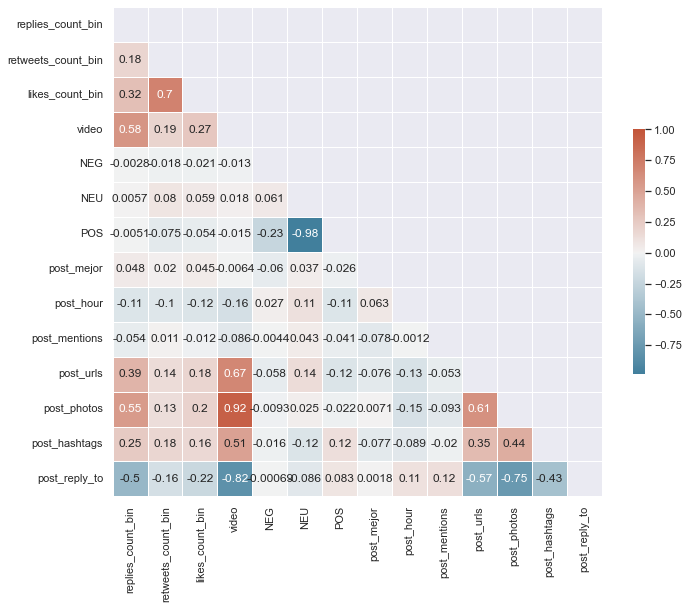

In [ ]:
to_drop = ["id", "username"] #Las que son categoricas
df_correlation = huawei_complete.drop(to_drop, axis = 1).corr()

mask = np.triu(np.ones_like(df_correlation, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_correlation, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

<AxesSubplot:>

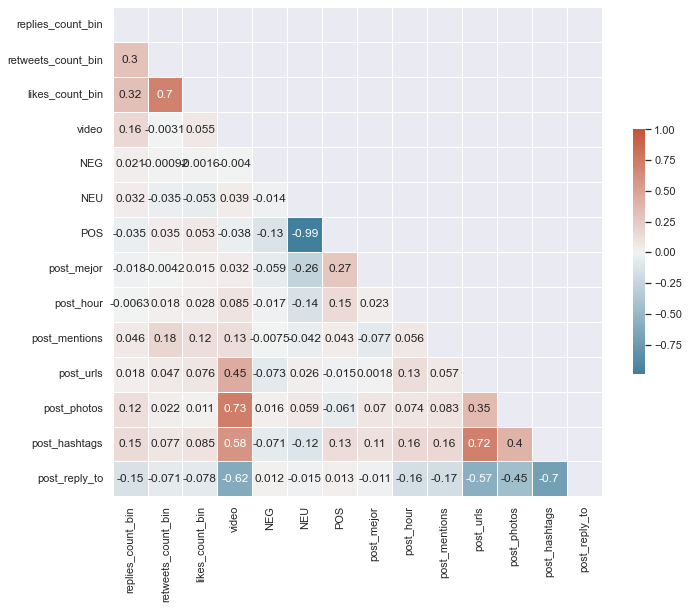

In [ ]:
to_drop = ["id", "username"] #Las que son categoricas
df_correlation = motorola_complete.drop(to_drop, axis = 1).corr()

mask = np.triu(np.ones_like(df_correlation, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_correlation, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

<AxesSubplot:>

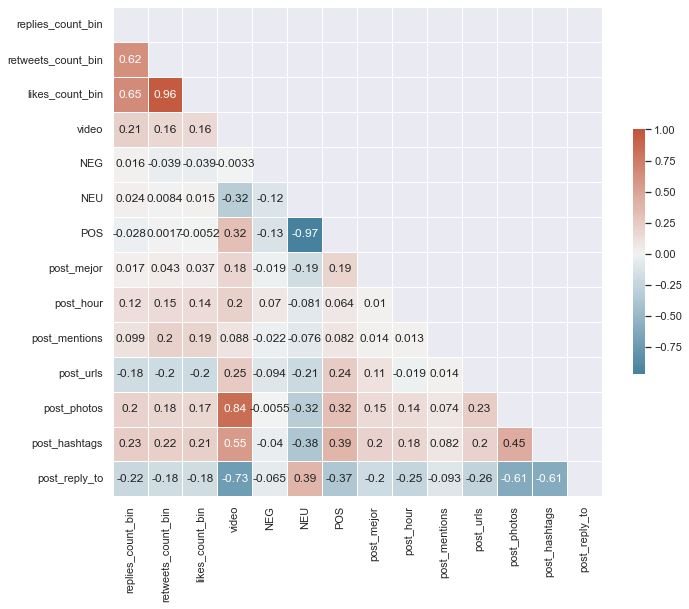

In [ ]:
to_drop = ["id", "username"] #Las que son categoricas
df_correlation = samsung_complete.drop(to_drop, axis = 1).corr()

mask = np.triu(np.ones_like(df_correlation, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_correlation, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

<AxesSubplot:>

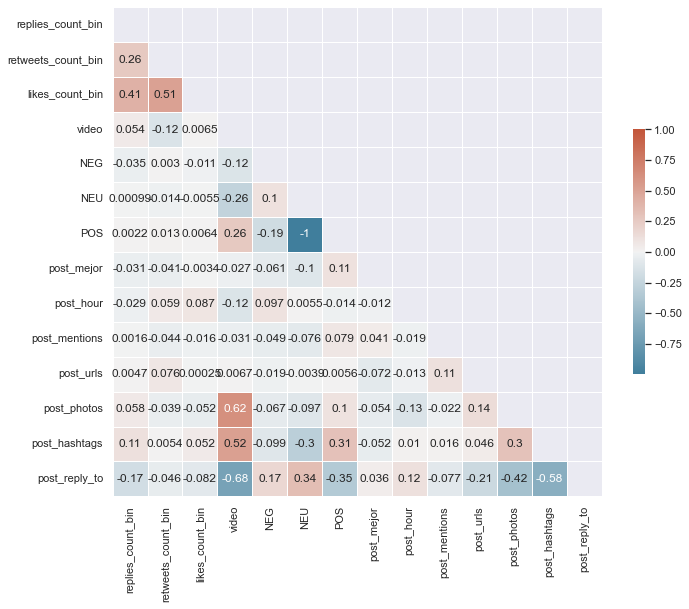

In [ ]:
to_drop = ["id", "username"] #Las que son categoricas
df_correlation = xiaomi_complete.drop(to_drop, axis = 1).corr()

mask = np.triu(np.ones_like(df_correlation, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_correlation, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# 25.1 Primera prueba con variable "replies_count_bin" como variable dependiente para la huawei¶
A continuación vamos a hacer la verificacon del modelo con la variable "replies_count_bin" como variable dependiente

In [ ]:
to_drop = ["id", "username", "retweets_count_bin", "likes_count_bin"] #Las que son categoricas
huawei_complete = huawei_complete.drop(to_drop, axis = 1)
display(huawei_complete)

replies_count_bin  video       NEG       NEU       POS  post_mejor  \
0                    0      0  0.005391  0.910900  0.083709           0   
1                    0      1  0.003311  0.814233  0.182456           1   
2                    0      0  0.010612  0.354577  0.634811           0   
3                    0      0  0.008294  0.872323  0.119382           0   
4                    0      0  0.008061  0.869464  0.122475           0   
..                 ...    ...       ...       ...       ...         ...   
987                  0      0  0.000863  0.009353  0.989783           0   
988                  0      0  0.002312  0.014181  0.983507           0   
989                  0      0  0.001461  0.033431  0.965108           0   
990                  0      1  0.012525  0.700071  0.287404           0   
991                  0      0  0.007719  0.949958  0.042323           1   

     post_hour  post_mentions  post_urls  post_photos  post_hashtags  \
0           13              0          0            0              0   
1            8              0          1            1              1   
2            2              0          0            0              0   
3           17              0          0            0              0   
4           12              0          1            0              0   
..         ...            ...        ...          ...            ...   
987         12              0          0            0              0   
988          9              0          0            0              0   
989          9              0          0            0              0   
990          9              0          1            1              1   
991         19              0          0            0              0   

     post_reply_to  
0                0  
1                0  
2                0  
3                1  
4                1  
..             ...  
987              1  
988              1  
989              1  
990              0  
991              1  

[967 rows x 12 columns]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
#Import ROC AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

SEED = 1111
lr = LogisticRegression(random_state = SEED)
knn = KNN(n_neighbors = 6)
dt = DecisionTreeClassifier(criterion = 'gini', random_state = SEED, max_depth = round(len(huawei_complete)**(1/2)))
rfc = RandomForestClassifier(n_estimators = 500 , min_samples_leaf = 0.12, random_state =SEED)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=1)
#supvm = svm.SVC()

In [ ]:
df_desertor = huawei_complete[huawei_complete['replies_count_bin'] == 1]
df_no_desertor = huawei_complete[huawei_complete['replies_count_bin'] == 0]

df_no_desertor = df_no_desertor.sample(n=len(df_desertor))

df_new = pd.concat([df_desertor, df_no_desertor])
df_new = df_new.sample(frac=1)

In [ ]:
y1 = df_new['replies_count_bin'].values
X1 = df_new.drop('replies_count_bin', axis = 1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.26, random_state = SEED, stratify = y1)

classifiers =[('Logistic Regression', lr), ('K Nearest Neighbors', knn),\
              ('Classification Tree', dt), ('Random Forest', rfc), ('Ada Boost', ada)]

vc = VotingClassifier(estimators = classifiers)

In [ ]:
for clf_name, clf in classifiers:
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)

    y_pred_proba = clf.predict_proba(X1_test)[:,1]
    roc_score = roc_auc_score(y1_test, y_pred_proba)

    print('{:s} accuracy: {:.3f}'.format(clf_name, accuracy_score(y1_test, y1_pred)))
    print('{:s} ROC score: {:.3f}'.format(clf_name, roc_score))
    print('')

vc.fit(X1_train, y1_train)
y1_predVC = vc.predict(X1_test)
print('Voting Classifier accuracy: {:.3f}'.format(accuracy_score(y1_test, y1_predVC)))

Logistic Regression accuracy: 0.882
Logistic Regression ROC score: 0.864

K Nearest Neighbors accuracy: 0.868
K Nearest Neighbors ROC score: 0.927

Classification Tree accuracy: 0.842
Classification Tree ROC score: 0.842

Random Forest accuracy: 0.882
Random Forest ROC score: 0.908

Ada Boost accuracy: 0.855
Ada Boost ROC score: 0.855

Voting Classifier accuracy: 0.895


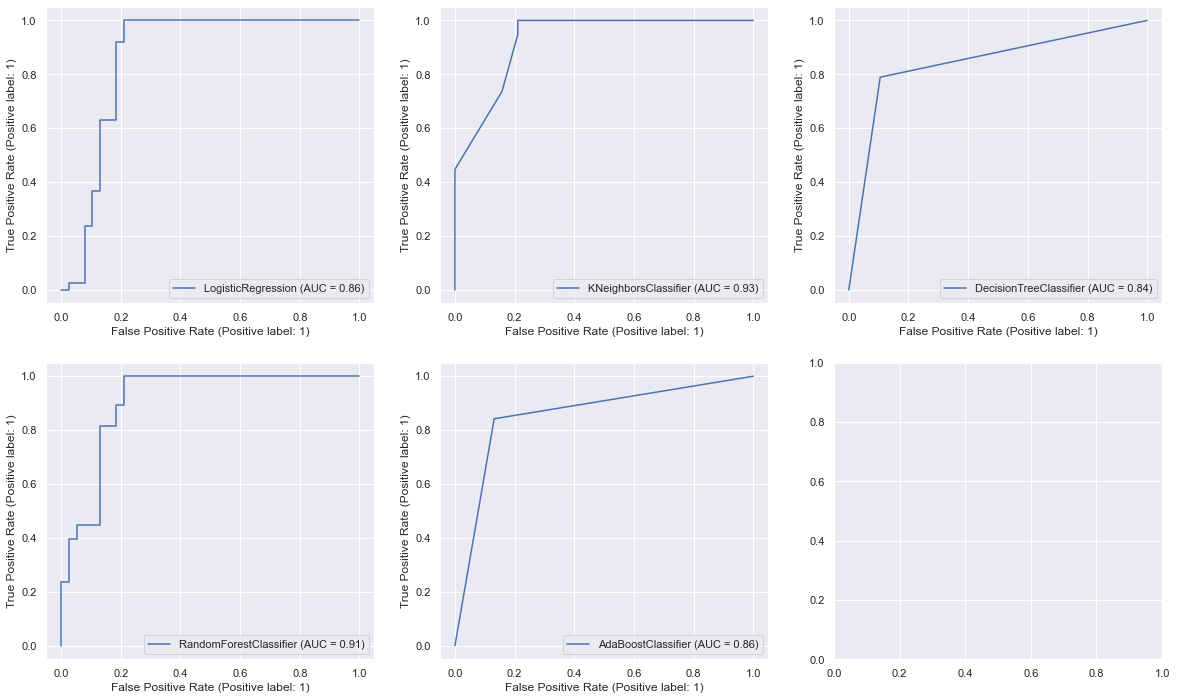

In [ ]:
sns.set()
fig, axes = plt.subplots(2, 3, figsize = (20,12))
idxs = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]]

for (clf_name, clf), idx in zip(classifiers, idxs):
    #clf.fit(X1_train, y1_train)
    plot_roc_curve(clf, X1_test, y1_test, ax = idx)

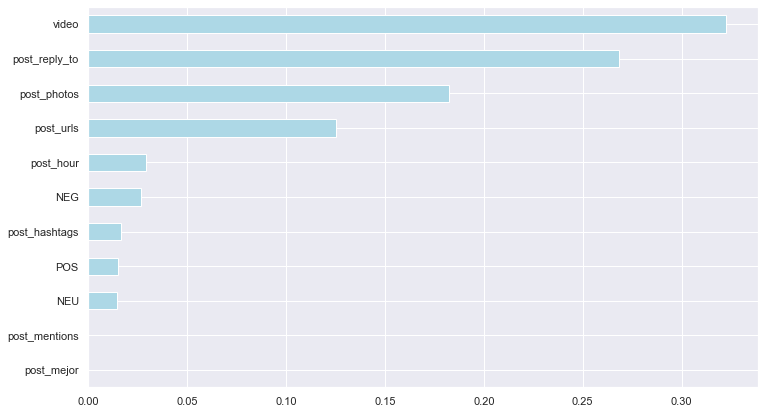

In [ ]:
#Feature importance
fig, axes = plt.subplots(figsize= (12,7))
importances_rf =pd.Series(rfc.feature_importances_[0:15], index = df_new.drop\
                                          (['replies_count_bin'], axis = 1).columns[0:15])
sorted_importances_rf = importances_rf.sort_values()
sns.set()
sorted_importances_rf.plot(kind='barh', color = 'lightblue')
plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
print(len(max_depth))
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = 3, n_iter = 20, n_jobs = -1,\
                               random_state=SEED)

rf_random.fit(X1_train, y1_train)

11


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(min_samples_leaf=0.12,
                                                    n_estimators=500,
                                                    random_state=1111),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 

In [ ]:
print(rf_random.best_params_)
best_random_model = rf_random.best_estimator_
yrf_pred_random = best_random_model.predict(X1_test)
print('Random Forest accuracy: {:.3f}'.format(accuracy_score(y1_test, yrf_pred_random)))

{'n_estimators': 911, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}
Random Forest accuracy: 0.882


In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

rf_with_best_params = RandomForestClassifier(n_estimators = 733 , min_samples_split = 2, random_state =SEED,\
                    min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False)

clf_names = ['Logistic Regression', 'K Nearest Neighbors', 'Classification Tree', 'Random Forest', 'Ada Boost']
clfs = [lr, knn, dt, rfc, ada]


cross_val_strategy = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for classifier, classifier_name in zip(clfs, clf_names):
    scores = cross_val_score(classifier, X1_train, y1_train, cv = cross_val_strategy)

    mean_acc = np.mean(scores)
    std_acc = np.std(scores)

    print('{:s}  Mean accuracy: {:.3f}'.format(classifier_name, mean_acc))
    print('{:s}  Mean std: {:.3f}'.format(classifier_name, std_acc))
    print('')

Logistic Regression  Mean accuracy: 0.850
Logistic Regression  Mean std: 0.034

K Nearest Neighbors  Mean accuracy: 0.855
K Nearest Neighbors  Mean std: 0.031

Classification Tree  Mean accuracy: 0.741
Classification Tree  Mean std: 0.047

Random Forest  Mean accuracy: 0.850
Random Forest  Mean std: 0.034

Ada Boost  Mean accuracy: 0.736
Ada Boost  Mean std: 0.055



# 25.2 Primera prueba con variable "retweets_count_bin" como variable dependiente para la huawei¶
A continuación vamos a hacer la verificacon del modelo con la variable "retweets_count_bin" como variable dependiente

In [ ]:
#Volver a correr numeral 24 para que la BD se genere completa

In [ ]:
to_drop = ["id", "username", "replies_count_bin", "likes_count_bin"] #Las que son categoricas
huawei_complete = huawei_complete.drop(to_drop, axis = 1)
display(huawei_complete)

KeyError: "['id' 'username' 'likes_count_bin'] not found in axis"

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
#Import ROC AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

SEED = 1111
lr = LogisticRegression(random_state = SEED)
knn = KNN(n_neighbors = 6)
dt = DecisionTreeClassifier(criterion = 'gini', random_state = SEED, max_depth = round(len(huawei_complete)**(1/2)))
rfc = RandomForestClassifier(n_estimators = 500 , min_samples_leaf = 0.12, random_state =SEED)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=1)
supvm = svm.SVC()

In [ ]:
df_desertor = huawei_complete[huawei_complete['retweets_count_bin'] == 1]
df_no_desertor = huawei_complete[huawei_complete['retweets_count_bin'] == 0]

df_no_desertor = df_no_desertor.sample(n=len(df_desertor))

df_new = pd.concat([df_desertor, df_no_desertor])
df_new = df_new.sample(frac=1)

In [ ]:
y1 = df_new['retweets_count_bin'].values
X1 = df_new.drop('retweets_count_bin', axis = 1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.26, random_state = SEED, stratify = y1)

classifiers =[('Logistic Regression', lr), ('K Nearest Neighbors', knn),\
              ('Classification Tree', dt), ('Random Forest', rfc), ('Ada Boost', ada)]

vc = VotingClassifier(estimators = classifiers)

In [ ]:
for clf_name, clf in classifiers:
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)

    y_pred_proba = clf.predict_proba(X1_test)[:,1]
    roc_score = roc_auc_score(y1_test, y_pred_proba)

    print('{:s} accuracy: {:.3f}'.format(clf_name, accuracy_score(y1_test, y1_pred)))
    print('{:s} ROC score: {:.3f}'.format(clf_name, roc_score))
    print('')

vc.fit(X1_train, y1_train)
y1_predVC = vc.predict(X1_test)
print('Voting Classifier accuracy: {:.3f}'.format(accuracy_score(y1_test, y1_predVC)))

In [ ]:
sns.set()
fig, axes = plt.subplots(2, 3, figsize = (20,12))
idxs = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]]

for (clf_name, clf), idx in zip(classifiers, idxs):
    #clf.fit(X1_train, y1_train)
    plot_roc_curve(clf, X1_test, y1_test, ax = idx)

In [ ]:
#Feature importance
fig, axes = plt.subplots(figsize= (12,7))
importances_rf =pd.Series(rfc.feature_importances_[0:15], index = df_new.drop\
                                          (['retweets_count_bin'], axis = 1).columns[0:15])
sorted_importances_rf = importances_rf.sort_values()
sns.set()
sorted_importances_rf.plot(kind='barh', color = 'lightblue')
plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
print(len(max_depth))
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = 3, n_iter = 20, n_jobs = -1,\
                               random_state=SEED)

rf_random.fit(X1_train, y1_train)

In [ ]:
print(rf_random.best_params_)
best_random_model = rf_random.best_estimator_
yrf_pred_random = best_random_model.predict(X1_test)
print('Random Forest accuracy: {:.3f}'.format(accuracy_score(y1_test, yrf_pred_random)))

In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

rf_with_best_params = RandomForestClassifier(n_estimators = 733 , min_samples_split = 2, random_state =SEED,\
                    min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False)

clf_names = ['Logistic Regression', 'K Nearest Neighbors', 'Classification Tree', 'Random Forest', 'Ada Boost']
clfs = [lr, knn, dt, rfc, ada]


cross_val_strategy = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for classifier, classifier_name in zip(clfs, clf_names):
    scores = cross_val_score(classifier, X1_train, y1_train, cv = cross_val_strategy)

    mean_acc = np.mean(scores)
    std_acc = np.std(scores)

    print('{:s}  Mean accuracy: {:.3f}'.format(classifier_name, mean_acc))
    print('{:s}  Mean std: {:.3f}'.format(classifier_name, std_acc))
    print('')

# 25.3 Primera prueba con variable "likes_count_bin" como variable dependiente para la huawei
A continuación vamos a hacer la verificacon del modelo con la variable "likes_count_bin" como variable dependiente

In [ ]:
#Volver a correr numeral 24 para que la BD se genere completa

In [ ]:
to_drop = ["id", "username", "replies_count_bin", "retweets_count_bin"] #Las que son categoricas
huawei_complete = huawei_complete.drop(to_drop, axis = 1)
display(huawei_complete)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
#Import ROC AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

SEED = 1111
lr = LogisticRegression(random_state = SEED)
knn = KNN(n_neighbors = 6)
dt = DecisionTreeClassifier(criterion = 'gini', random_state = SEED, max_depth = round(len(huawei_complete)**(1/2)))
rfc = RandomForestClassifier(n_estimators = 500 , min_samples_leaf = 0.12, random_state =SEED)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=1)
supvm = svm.SVC()

In [ ]:
df_desertor = huawei_complete[huawei_complete['likes_count_bin'] == 1]
df_no_desertor = huawei_complete[huawei_complete['likes_count_bin'] == 0]

df_no_desertor = df_no_desertor.sample(n=len(df_desertor), replace=True) #Le agregue el replace=True

df_new = pd.concat([df_desertor, df_no_desertor])
df_new = df_new.sample(frac=1)

In [ ]:
y1 = df_new['likes_count_bin'].values
X1 = df_new.drop('likes_count_bin', axis = 1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.26, random_state = SEED, stratify = y1)

classifiers =[('Logistic Regression', lr), ('K Nearest Neighbors', knn),\
              ('Classification Tree', dt), ('Random Forest', rfc), ('Ada Boost', ada)]

vc = VotingClassifier(estimators = classifiers)

In [ ]:
for clf_name, clf in classifiers:
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)

    y_pred_proba = clf.predict_proba(X1_test)[:,1]
    roc_score = roc_auc_score(y1_test, y_pred_proba)

    print('{:s} accuracy: {:.3f}'.format(clf_name, accuracy_score(y1_test, y1_pred)))
    print('{:s} ROC score: {:.3f}'.format(clf_name, roc_score))
    print('')

vc.fit(X1_train, y1_train)
y1_predVC = vc.predict(X1_test)
print('Voting Classifier accuracy: {:.3f}'.format(accuracy_score(y1_test, y1_predVC)))

In [ ]:
sns.set()
fig, axes = plt.subplots(2, 3, figsize = (20,12))
idxs = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]]

for (clf_name, clf), idx in zip(classifiers, idxs):
    #clf.fit(X1_train, y1_train)
    plot_roc_curve(clf, X1_test, y1_test, ax = idx)

In [ ]:
#Feature importance
fig, axes = plt.subplots(figsize= (12,7))
importances_rf =pd.Series(rfc.feature_importances_[0:15], index = df_new.drop\
                                          (['likes_count_bin'], axis = 1).columns[0:15])
sorted_importances_rf = importances_rf.sort_values()
sns.set()
sorted_importances_rf.plot(kind='barh', color = 'lightblue')
plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
print(len(max_depth))
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = 3, n_iter = 20, n_jobs = -1,\
                               random_state=SEED)

rf_random.fit(X1_train, y1_train)

In [ ]:
print(rf_random.best_params_)
best_random_model = rf_random.best_estimator_
yrf_pred_random = best_random_model.predict(X1_test)
print('Random Forest accuracy: {:.3f}'.format(accuracy_score(y1_test, yrf_pred_random)))

In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

rf_with_best_params = RandomForestClassifier(n_estimators = 733 , min_samples_split = 2, random_state =SEED,\
                    min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False)

clf_names = ['Logistic Regression', 'K Nearest Neighbors', 'Classification Tree', 'Random Forest', 'Ada Boost']
clfs = [lr, knn, dt, rfc, ada]


cross_val_strategy = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for classifier, classifier_name in zip(clfs, clf_names):
    scores = cross_val_score(classifier, X1_train, y1_train, cv = cross_val_strategy)

    mean_acc = np.mean(scores)
    std_acc = np.std(scores)

    print('{:s}  Mean accuracy: {:.3f}'.format(classifier_name, mean_acc))
    print('{:s}  Mean std: {:.3f}'.format(classifier_name, std_acc))
    print('')

# 25.1 Primera prueba con variable "replies_count_bin" como variable dependiente para la motorola¶
A continuación vamos a hacer la verificacon del modelo con la variable "replies_count_bin" como variable dependiente

In [ ]:
to_drop = ["id", "username", "retweets_count_bin", "likes_count_bin"] #Las que son categoricas
motorola_complete = motorola_complete.drop(to_drop, axis = 1)
display(motorola_complete)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
#Import ROC AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

SEED = 1111
lr = LogisticRegression(random_state = SEED)
knn = KNN(n_neighbors = 6)
dt = DecisionTreeClassifier(criterion = 'gini', random_state = SEED, max_depth = round(len(motorola_complete)**(1/2)))
rfc = RandomForestClassifier(n_estimators = 500 , min_samples_leaf = 0.12, random_state =SEED)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=1)
#supvm = svm.SVC()

In [ ]:
df_desertor = motorola_complete[motorola_complete['replies_count_bin'] == 1]
df_no_desertor = motorola_complete[motorola_complete['replies_count_bin'] == 0]

df_no_desertor = df_no_desertor.sample(n=len(df_desertor))

df_new = pd.concat([df_desertor, df_no_desertor])
df_new = df_new.sample(frac=1)

In [ ]:
y1 = df_new['replies_count_bin'].values
X1 = df_new.drop('replies_count_bin', axis = 1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.26, random_state = SEED, stratify = y1)

classifiers =[('Logistic Regression', lr), ('K Nearest Neighbors', knn),\
              ('Classification Tree', dt), ('Random Forest', rfc), ('Ada Boost', ada)]

vc = VotingClassifier(estimators = classifiers)

In [ ]:
for clf_name, clf in classifiers:
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)

    y_pred_proba = clf.predict_proba(X1_test)[:,1]
    roc_score = roc_auc_score(y1_test, y_pred_proba)

    print('{:s} accuracy: {:.3f}'.format(clf_name, accuracy_score(y1_test, y1_pred)))
    print('{:s} ROC score: {:.3f}'.format(clf_name, roc_score))
    print('')

vc.fit(X1_train, y1_train)
y1_predVC = vc.predict(X1_test)
print('Voting Classifier accuracy: {:.3f}'.format(accuracy_score(y1_test, y1_predVC)))

In [ ]:
sns.set()
fig, axes = plt.subplots(2, 3, figsize = (20,12))
idxs = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]]

for (clf_name, clf), idx in zip(classifiers, idxs):
    #clf.fit(X1_train, y1_train)
    plot_roc_curve(clf, X1_test, y1_test, ax = idx)

In [ ]:
#Feature importance
fig, axes = plt.subplots(figsize= (12,7))
importances_rf =pd.Series(rfc.feature_importances_[0:15], index = df_new.drop\
                                          (['replies_count_bin'], axis = 1).columns[0:15])
sorted_importances_rf = importances_rf.sort_values()
sns.set()
sorted_importances_rf.plot(kind='barh', color = 'lightblue')
plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
print(len(max_depth))
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = 3, n_iter = 20, n_jobs = -1,\
                               random_state=SEED)

rf_random.fit(X1_train, y1_train)

In [ ]:
print(rf_random.best_params_)
best_random_model = rf_random.best_estimator_
yrf_pred_random = best_random_model.predict(X1_test)
print('Random Forest accuracy: {:.3f}'.format(accuracy_score(y1_test, yrf_pred_random)))

In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

rf_with_best_params = RandomForestClassifier(n_estimators = 733 , min_samples_split = 2, random_state =SEED,\
                    min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False)

clf_names = ['Logistic Regression', 'K Nearest Neighbors', 'Classification Tree', 'Random Forest', 'Ada Boost']
clfs = [lr, knn, dt, rfc, ada]


cross_val_strategy = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for classifier, classifier_name in zip(clfs, clf_names):
    scores = cross_val_score(classifier, X1_train, y1_train, cv = cross_val_strategy)

    mean_acc = np.mean(scores)
    std_acc = np.std(scores)

    print('{:s}  Mean accuracy: {:.3f}'.format(classifier_name, mean_acc))
    print('{:s}  Mean std: {:.3f}'.format(classifier_name, std_acc))
    print('')

# 25.2 Primera prueba con variable "retweets_count_bin" como variable dependiente para la motorola¶
A continuación vamos a hacer la verificacon del modelo con la variable "retweets_count_bin" como variable dependiente

In [ ]:
#Volver a correr numeral 24 para que la BD se genere completa

In [ ]:
to_drop = ["id", "username", "replies_count_bin", "likes_count_bin"] #Las que son categoricas
motorola_complete = motorola_complete.drop(to_drop, axis = 1)
display(motorola_complete)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
#Import ROC AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

SEED = 1111
lr = LogisticRegression(random_state = SEED)
knn = KNN(n_neighbors = 6)
dt = DecisionTreeClassifier(criterion = 'gini', random_state = SEED, max_depth = round(len(motorola_complete)**(1/2)))
rfc = RandomForestClassifier(n_estimators = 500 , min_samples_leaf = 0.12, random_state =SEED)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=1)
supvm = svm.SVC()

In [ ]:
df_desertor = motorola_complete[motorola_complete['retweets_count_bin'] == 1]
df_no_desertor = motorola_complete[motorola_complete['retweets_count_bin'] == 0]

df_no_desertor = df_no_desertor.sample(n=len(df_desertor))

df_new = pd.concat([df_desertor, df_no_desertor])
df_new = df_new.sample(frac=1)

In [ ]:
y1 = df_new['retweets_count_bin'].values
X1 = df_new.drop('retweets_count_bin', axis = 1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.26, random_state = SEED, stratify = y1)

classifiers =[('Logistic Regression', lr), ('K Nearest Neighbors', knn),\
              ('Classification Tree', dt), ('Random Forest', rfc), ('Ada Boost', ada)]

vc = VotingClassifier(estimators = classifiers)

In [ ]:
for clf_name, clf in classifiers:
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)

    y_pred_proba = clf.predict_proba(X1_test)[:,1]
    roc_score = roc_auc_score(y1_test, y_pred_proba)

    print('{:s} accuracy: {:.3f}'.format(clf_name, accuracy_score(y1_test, y1_pred)))
    print('{:s} ROC score: {:.3f}'.format(clf_name, roc_score))
    print('')

vc.fit(X1_train, y1_train)
y1_predVC = vc.predict(X1_test)
print('Voting Classifier accuracy: {:.3f}'.format(accuracy_score(y1_test, y1_predVC)))

In [ ]:
sns.set()
fig, axes = plt.subplots(2, 3, figsize = (20,12))
idxs = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]]

for (clf_name, clf), idx in zip(classifiers, idxs):
    #clf.fit(X1_train, y1_train)
    plot_roc_curve(clf, X1_test, y1_test, ax = idx)

In [ ]:
#Feature importance
fig, axes = plt.subplots(figsize= (12,7))
importances_rf =pd.Series(rfc.feature_importances_[0:15], index = df_new.drop\
                                          (['retweets_count_bin'], axis = 1).columns[0:15])
sorted_importances_rf = importances_rf.sort_values()
sns.set()
sorted_importances_rf.plot(kind='barh', color = 'lightblue')
plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
print(len(max_depth))
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = 3, n_iter = 20, n_jobs = -1,\
                               random_state=SEED)

rf_random.fit(X1_train, y1_train)

In [ ]:
print(rf_random.best_params_)
best_random_model = rf_random.best_estimator_
yrf_pred_random = best_random_model.predict(X1_test)
print('Random Forest accuracy: {:.3f}'.format(accuracy_score(y1_test, yrf_pred_random)))

In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

rf_with_best_params = RandomForestClassifier(n_estimators = 733 , min_samples_split = 2, random_state =SEED,\
                    min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False)

clf_names = ['Logistic Regression', 'K Nearest Neighbors', 'Classification Tree', 'Random Forest', 'Ada Boost']
clfs = [lr, knn, dt, rfc, ada]


cross_val_strategy = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for classifier, classifier_name in zip(clfs, clf_names):
    scores = cross_val_score(classifier, X1_train, y1_train, cv = cross_val_strategy)

    mean_acc = np.mean(scores)
    std_acc = np.std(scores)

    print('{:s}  Mean accuracy: {:.3f}'.format(classifier_name, mean_acc))
    print('{:s}  Mean std: {:.3f}'.format(classifier_name, std_acc))
    print('')

In [ ]:
#Volver a correr numeral 24 para que la BD se genere completa

In [ ]:
to_drop = ["id", "username", "replies_count_bin", "retweets_count_bin"] #Las que son categoricas
motorola_complete = motorola_complete.drop(to_drop, axis = 1)
display(motorola_complete)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
#Import ROC AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

SEED = 1111
lr = LogisticRegression(random_state = SEED)
knn = KNN(n_neighbors = 6)
dt = DecisionTreeClassifier(criterion = 'gini', random_state = SEED, max_depth = round(len(motorola_complete)**(1/2)))
rfc = RandomForestClassifier(n_estimators = 500 , min_samples_leaf = 0.12, random_state =SEED)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=1)
supvm = svm.SVC()

In [ ]:
df_desertor = motorola_complete[motorola_complete['likes_count_bin'] == 1]
df_no_desertor = motorola_complete[motorola_complete['likes_count_bin'] == 0]

df_no_desertor = df_no_desertor.sample(n=len(df_desertor), replace=True) #Le agregue el replace=True

df_new = pd.concat([df_desertor, df_no_desertor])
df_new = df_new.sample(frac=1)

In [ ]:
y1 = df_new['likes_count_bin'].values
X1 = df_new.drop('likes_count_bin', axis = 1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.26, random_state = SEED, stratify = y1)

classifiers =[('Logistic Regression', lr), ('K Nearest Neighbors', knn),\
              ('Classification Tree', dt), ('Random Forest', rfc), ('Ada Boost', ada)]

vc = VotingClassifier(estimators = classifiers)

In [ ]:
for clf_name, clf in classifiers:
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)

    y_pred_proba = clf.predict_proba(X1_test)[:,1]
    roc_score = roc_auc_score(y1_test, y_pred_proba)

    print('{:s} accuracy: {:.3f}'.format(clf_name, accuracy_score(y1_test, y1_pred)))
    print('{:s} ROC score: {:.3f}'.format(clf_name, roc_score))
    print('')

vc.fit(X1_train, y1_train)
y1_predVC = vc.predict(X1_test)
print('Voting Classifier accuracy: {:.3f}'.format(accuracy_score(y1_test, y1_predVC)))

In [ ]:
sns.set()
fig, axes = plt.subplots(2, 3, figsize = (20,12))
idxs = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]]

for (clf_name, clf), idx in zip(classifiers, idxs):
    #clf.fit(X1_train, y1_train)
    plot_roc_curve(clf, X1_test, y1_test, ax = idx)

In [ ]:
#Feature importance
fig, axes = plt.subplots(figsize= (12,7))
importances_rf =pd.Series(rfc.feature_importances_[0:15], index = df_new.drop\
                                          (['likes_count_bin'], axis = 1).columns[0:15])
sorted_importances_rf = importances_rf.sort_values()
sns.set()
sorted_importances_rf.plot(kind='barh', color = 'lightblue')
plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
print(len(max_depth))
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = 3, n_iter = 20, n_jobs = -1,\
                               random_state=SEED)

rf_random.fit(X1_train, y1_train)

In [ ]:
print(rf_random.best_params_)
best_random_model = rf_random.best_estimator_
yrf_pred_random = best_random_model.predict(X1_test)
print('Random Forest accuracy: {:.3f}'.format(accuracy_score(y1_test, yrf_pred_random)))

In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

rf_with_best_params = RandomForestClassifier(n_estimators = 733 , min_samples_split = 2, random_state =SEED,\
                    min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False)

clf_names = ['Logistic Regression', 'K Nearest Neighbors', 'Classification Tree', 'Random Forest', 'Ada Boost']
clfs = [lr, knn, dt, rfc, ada]


cross_val_strategy = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for classifier, classifier_name in zip(clfs, clf_names):
    scores = cross_val_score(classifier, X1_train, y1_train, cv = cross_val_strategy)

    mean_acc = np.mean(scores)
    std_acc = np.std(scores)

    print('{:s}  Mean accuracy: {:.3f}'.format(classifier_name, mean_acc))
    print('{:s}  Mean std: {:.3f}'.format(classifier_name, std_acc))
    print('')

# 25.1 Primera prueba con variable "replies_count_bin" como variable dependiente para la samsung¶
A continuación vamos a hacer la verificacon del modelo con la variable "replies_count_bin" como variable dependiente

In [ ]:
to_drop = ["id", "username", "retweets_count_bin", "likes_count_bin"] #Las que son categoricas
samsung_complete = samsung_complete.drop(to_drop, axis = 1)
display(samsung_complete)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
#Import ROC AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

SEED = 1111
lr = LogisticRegression(random_state = SEED)
knn = KNN(n_neighbors = 6)
dt = DecisionTreeClassifier(criterion = 'gini', random_state = SEED, max_depth = round(len(samsung_complete)**(1/2)))
rfc = RandomForestClassifier(n_estimators = 500 , min_samples_leaf = 0.12, random_state =SEED)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=1)
#supvm = svm.SVC()

In [ ]:
df_desertor = samsung_complete[samsung_complete['replies_count_bin'] == 1]
df_no_desertor = samsung_complete[samsung_complete['replies_count_bin'] == 0]

df_no_desertor = df_no_desertor.sample(n=len(df_desertor))

df_new = pd.concat([df_desertor, df_no_desertor])
df_new = df_new.sample(frac=1)

In [ ]:
y1 = df_new['replies_count_bin'].values
X1 = df_new.drop('replies_count_bin', axis = 1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.26, random_state = SEED, stratify = y1)

classifiers =[('Logistic Regression', lr), ('K Nearest Neighbors', knn),\
              ('Classification Tree', dt), ('Random Forest', rfc), ('Ada Boost', ada)]

vc = VotingClassifier(estimators = classifiers)

In [ ]:
for clf_name, clf in classifiers:
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)

    y_pred_proba = clf.predict_proba(X1_test)[:,1]
    roc_score = roc_auc_score(y1_test, y_pred_proba)

    print('{:s} accuracy: {:.3f}'.format(clf_name, accuracy_score(y1_test, y1_pred)))
    print('{:s} ROC score: {:.3f}'.format(clf_name, roc_score))
    print('')

vc.fit(X1_train, y1_train)
y1_predVC = vc.predict(X1_test)
print('Voting Classifier accuracy: {:.3f}'.format(accuracy_score(y1_test, y1_predVC)))

In [ ]:
sns.set()
fig, axes = plt.subplots(2, 3, figsize = (20,12))
idxs = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]]

for (clf_name, clf), idx in zip(classifiers, idxs):
    #clf.fit(X1_train, y1_train)
    plot_roc_curve(clf, X1_test, y1_test, ax = idx)

In [ ]:
#Feature importance
fig, axes = plt.subplots(figsize= (12,7))
importances_rf =pd.Series(rfc.feature_importances_[0:15], index = df_new.drop\
                                          (['replies_count_bin'], axis = 1).columns[0:15])
sorted_importances_rf = importances_rf.sort_values()
sns.set()
sorted_importances_rf.plot(kind='barh', color = 'lightblue')
plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
print(len(max_depth))
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = 3, n_iter = 20, n_jobs = -1,\
                               random_state=SEED)

rf_random.fit(X1_train, y1_train)

In [ ]:
print(rf_random.best_params_)
best_random_model = rf_random.best_estimator_
yrf_pred_random = best_random_model.predict(X1_test)
print('Random Forest accuracy: {:.3f}'.format(accuracy_score(y1_test, yrf_pred_random)))

In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

rf_with_best_params = RandomForestClassifier(n_estimators = 733 , min_samples_split = 2, random_state =SEED,\
                    min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False)

clf_names = ['Logistic Regression', 'K Nearest Neighbors', 'Classification Tree', 'Random Forest', 'Ada Boost']
clfs = [lr, knn, dt, rfc, ada]


cross_val_strategy = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for classifier, classifier_name in zip(clfs, clf_names):
    scores = cross_val_score(classifier, X1_train, y1_train, cv = cross_val_strategy)

    mean_acc = np.mean(scores)
    std_acc = np.std(scores)

    print('{:s}  Mean accuracy: {:.3f}'.format(classifier_name, mean_acc))
    print('{:s}  Mean std: {:.3f}'.format(classifier_name, std_acc))
    print('')

# 25.2 Primera prueba con variable "retweets_count_bin" como variable dependiente para la samsung¶
A continuación vamos a hacer la verificacon del modelo con la variable "retweets_count_bin" como variable dependiente

In [ ]:
#Volver a correr numeral 24 para que la BD se genere completa

In [ ]:
to_drop = ["id", "username", "replies_count_bin", "likes_count_bin"] #Las que son categoricas
samsung_complete = samsung_complete.drop(to_drop, axis = 1)
display(samsung_complete)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
#Import ROC AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

SEED = 1111
lr = LogisticRegression(random_state = SEED)
knn = KNN(n_neighbors = 6)
dt = DecisionTreeClassifier(criterion = 'gini', random_state = SEED, max_depth = round(len(samsung_complete)**(1/2)))
rfc = RandomForestClassifier(n_estimators = 500 , min_samples_leaf = 0.12, random_state =SEED)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=1)
supvm = svm.SVC()

In [ ]:
df_desertor = samsung_complete[samsung_complete['retweets_count_bin'] == 1]
df_no_desertor = samsung_complete[samsung_complete['retweets_count_bin'] == 0]

df_no_desertor = df_no_desertor.sample(n=len(df_desertor))

df_new = pd.concat([df_desertor, df_no_desertor])
df_new = df_new.sample(frac=1)

In [ ]:
y1 = df_new['retweets_count_bin'].values
X1 = df_new.drop('retweets_count_bin', axis = 1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.26, random_state = SEED, stratify = y1)

classifiers =[('Logistic Regression', lr), ('K Nearest Neighbors', knn),\
              ('Classification Tree', dt), ('Random Forest', rfc), ('Ada Boost', ada)]

vc = VotingClassifier(estimators = classifiers)

In [ ]:
for clf_name, clf in classifiers:
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)

    y_pred_proba = clf.predict_proba(X1_test)[:,1]
    roc_score = roc_auc_score(y1_test, y_pred_proba)

    print('{:s} accuracy: {:.3f}'.format(clf_name, accuracy_score(y1_test, y1_pred)))
    print('{:s} ROC score: {:.3f}'.format(clf_name, roc_score))
    print('')

vc.fit(X1_train, y1_train)
y1_predVC = vc.predict(X1_test)
print('Voting Classifier accuracy: {:.3f}'.format(accuracy_score(y1_test, y1_predVC)))

In [ ]:
sns.set()
fig, axes = plt.subplots(2, 3, figsize = (20,12))
idxs = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]]

for (clf_name, clf), idx in zip(classifiers, idxs):
    #clf.fit(X1_train, y1_train)
    plot_roc_curve(clf, X1_test, y1_test, ax = idx)

In [ ]:
#Feature importance
fig, axes = plt.subplots(figsize= (12,7))
importances_rf =pd.Series(rfc.feature_importances_[0:15], index = df_new.drop\
                                          (['retweets_count_bin'], axis = 1).columns[0:15])
sorted_importances_rf = importances_rf.sort_values()
sns.set()
sorted_importances_rf.plot(kind='barh', color = 'lightblue')
plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
print(len(max_depth))
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = 3, n_iter = 20, n_jobs = -1,\
                               random_state=SEED)

rf_random.fit(X1_train, y1_train)

In [ ]:
print(rf_random.best_params_)
best_random_model = rf_random.best_estimator_
yrf_pred_random = best_random_model.predict(X1_test)
print('Random Forest accuracy: {:.3f}'.format(accuracy_score(y1_test, yrf_pred_random)))

In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

rf_with_best_params = RandomForestClassifier(n_estimators = 733 , min_samples_split = 2, random_state =SEED,\
                    min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False)

clf_names = ['Logistic Regression', 'K Nearest Neighbors', 'Classification Tree', 'Random Forest', 'Ada Boost']
clfs = [lr, knn, dt, rfc, ada]


cross_val_strategy = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for classifier, classifier_name in zip(clfs, clf_names):
    scores = cross_val_score(classifier, X1_train, y1_train, cv = cross_val_strategy)

    mean_acc = np.mean(scores)
    std_acc = np.std(scores)

    print('{:s}  Mean accuracy: {:.3f}'.format(classifier_name, mean_acc))
    print('{:s}  Mean std: {:.3f}'.format(classifier_name, std_acc))
    print('')

# 25.3 Primera prueba con variable "likes_count_bin" como variable dependiente para la samsung
A continuación vamos a hacer la verificacon del modelo con la variable "likes_count_bin" como variable dependiente

In [ ]:
#Volver a correr numeral 24 para que la BD se genere completa

In [ ]:
to_drop = ["id", "username", "replies_count_bin", "retweets_count_bin"] #Las que son categoricas
samsung_complete = samsung_complete.drop(to_drop, axis = 1)
display(samsung_complete)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
#Import ROC AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

SEED = 1111
lr = LogisticRegression(random_state = SEED)
knn = KNN(n_neighbors = 6)
dt = DecisionTreeClassifier(criterion = 'gini', random_state = SEED, max_depth = round(len(samsung_complete)**(1/2)))
rfc = RandomForestClassifier(n_estimators = 500 , min_samples_leaf = 0.12, random_state =SEED)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=1)
supvm = svm.SVC()

In [ ]:
df_desertor = samsung_complete[samsung_complete['likes_count_bin'] == 1]
df_no_desertor = samsung_complete[samsung_complete['likes_count_bin'] == 0]

df_no_desertor = df_no_desertor.sample(n=len(df_desertor), replace=True) #Le agregue el replace=True

df_new = pd.concat([df_desertor, df_no_desertor])
df_new = df_new.sample(frac=1)

In [ ]:
y1 = df_new['likes_count_bin'].values
X1 = df_new.drop('likes_count_bin', axis = 1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.26, random_state = SEED, stratify = y1)

classifiers =[('Logistic Regression', lr), ('K Nearest Neighbors', knn),\
              ('Classification Tree', dt), ('Random Forest', rfc), ('Ada Boost', ada)]

vc = VotingClassifier(estimators = classifiers)

In [ ]:
for clf_name, clf in classifiers:
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)

    y_pred_proba = clf.predict_proba(X1_test)[:,1]
    roc_score = roc_auc_score(y1_test, y_pred_proba)

    print('{:s} accuracy: {:.3f}'.format(clf_name, accuracy_score(y1_test, y1_pred)))
    print('{:s} ROC score: {:.3f}'.format(clf_name, roc_score))
    print('')

vc.fit(X1_train, y1_train)
y1_predVC = vc.predict(X1_test)
print('Voting Classifier accuracy: {:.3f}'.format(accuracy_score(y1_test, y1_predVC)))

In [ ]:
sns.set()
fig, axes = plt.subplots(2, 3, figsize = (20,12))
idxs = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]]

for (clf_name, clf), idx in zip(classifiers, idxs):
    #clf.fit(X1_train, y1_train)
    plot_roc_curve(clf, X1_test, y1_test, ax = idx)

In [ ]:
#Feature importance
fig, axes = plt.subplots(figsize= (12,7))
importances_rf =pd.Series(rfc.feature_importances_[0:15], index = df_new.drop\
                                          (['likes_count_bin'], axis = 1).columns[0:15])
sorted_importances_rf = importances_rf.sort_values()
sns.set()
sorted_importances_rf.plot(kind='barh', color = 'lightblue')
plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
print(len(max_depth))
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = 3, n_iter = 20, n_jobs = -1,\
                               random_state=SEED)

rf_random.fit(X1_train, y1_train)

In [ ]:
print(rf_random.best_params_)
best_random_model = rf_random.best_estimator_
yrf_pred_random = best_random_model.predict(X1_test)
print('Random Forest accuracy: {:.3f}'.format(accuracy_score(y1_test, yrf_pred_random)))

In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

rf_with_best_params = RandomForestClassifier(n_estimators = 733 , min_samples_split = 2, random_state =SEED,\
                    min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False)

clf_names = ['Logistic Regression', 'K Nearest Neighbors', 'Classification Tree', 'Random Forest', 'Ada Boost']
clfs = [lr, knn, dt, rfc, ada]


cross_val_strategy = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for classifier, classifier_name in zip(clfs, clf_names):
    scores = cross_val_score(classifier, X1_train, y1_train, cv = cross_val_strategy)

    mean_acc = np.mean(scores)
    std_acc = np.std(scores)

    print('{:s}  Mean accuracy: {:.3f}'.format(classifier_name, mean_acc))
    print('{:s}  Mean std: {:.3f}'.format(classifier_name, std_acc))
    print('')

# 25.1 Primera prueba con variable "replies_count_bin" como variable dependiente para la xiaomi¶
A continuación vamos a hacer la verificacon del modelo con la variable "replies_count_bin" como variable dependiente

In [ ]:
to_drop = ["id", "username", "retweets_count_bin", "likes_count_bin"] #Las que son categoricas
xiaomi_complete = xiaomi_complete.drop(to_drop, axis = 1)
display(xiaomi_complete)

replies_count_bin  video       NEG       NEU       POS  post_mejor  \
3496                  0      1  0.009343  0.101374  0.889284           0   
3497                  0      1  0.004997  0.634547  0.360456           0   
3498                  0      1  0.003841  0.551759  0.444400           0   
3499                  0      1  0.006017  0.579175  0.414808           0   
3500                  0      1  0.008857  0.190024  0.801119           0   
...                 ...    ...       ...       ...       ...         ...   
4108                  1      1  0.015661  0.880186  0.104153           0   
4109                  0      1  0.013769  0.725444  0.260787           0   
4110                  0      1  0.055768  0.460797  0.483435           0   
4111                  1      1  0.016502  0.693668  0.289830           0   
4112                  0      1  0.004203  0.038468  0.957328           0   

      post_hour  post_mentions  post_urls  post_photos  post_hashtags  \
3496         10              0          0            1              1   
3497         17              0          0            1              1   
3498         16              0          0            1              1   
3499         16              0          1            1              1   
3500         13              0          0            1              1   
...         ...            ...        ...          ...            ...   
4108         19              0          0            1              1   
4109         15              0          0            1              1   
4110         14              0          1            1              1   
4111         11              0          0            0              1   
4112         19              0          0            0              1   

      post_reply_to  
3496              0  
3497              0  
3498              0  
3499              0  
3500              0  
...             ...  
4108              0  
4109              0  
4110              0  
4111              0  
4112              0  

[463 rows x 12 columns]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
#Import ROC AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

SEED = 1111
lr = LogisticRegression(random_state = SEED)
knn = KNN(n_neighbors = 6)
dt = DecisionTreeClassifier(criterion = 'gini', random_state = SEED, max_depth = round(len(xiaomi_complete)**(1/2)))
rfc = RandomForestClassifier(n_estimators = 500 , min_samples_leaf = 0.12, random_state =SEED)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=1)
#supvm = svm.SVC()

In [ ]:
df_desertor = xiaomi_complete[xiaomi_complete['replies_count_bin'] == 1]
df_no_desertor = xiaomi_complete[xiaomi_complete['replies_count_bin'] == 0]

df_no_desertor = df_no_desertor.sample(n=len(df_desertor))

df_new = pd.concat([df_desertor, df_no_desertor])
df_new = df_new.sample(frac=1)

In [ ]:
y1 = df_new['replies_count_bin'].values
X1 = df_new.drop('replies_count_bin', axis = 1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.26, random_state = SEED, stratify = y1)

classifiers =[('Logistic Regression', lr), ('K Nearest Neighbors', knn),\
              ('Classification Tree', dt), ('Random Forest', rfc), ('Ada Boost', ada)]

vc = VotingClassifier(estimators = classifiers)

In [ ]:
for clf_name, clf in classifiers:
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)

    y_pred_proba = clf.predict_proba(X1_test)[:,1]
    roc_score = roc_auc_score(y1_test, y_pred_proba)

    print('{:s} accuracy: {:.3f}'.format(clf_name, accuracy_score(y1_test, y1_pred)))
    print('{:s} ROC score: {:.3f}'.format(clf_name, roc_score))
    print('')

vc.fit(X1_train, y1_train)
y1_predVC = vc.predict(X1_test)
print('Voting Classifier accuracy: {:.3f}'.format(accuracy_score(y1_test, y1_predVC)))

Logistic Regression accuracy: 0.515
Logistic Regression ROC score: 0.569

K Nearest Neighbors accuracy: 0.544
K Nearest Neighbors ROC score: 0.562

Classification Tree accuracy: 0.618
Classification Tree ROC score: 0.618

Random Forest accuracy: 0.529
Random Forest ROC score: 0.577

Ada Boost accuracy: 0.632
Ada Boost ROC score: 0.632

Voting Classifier accuracy: 0.588


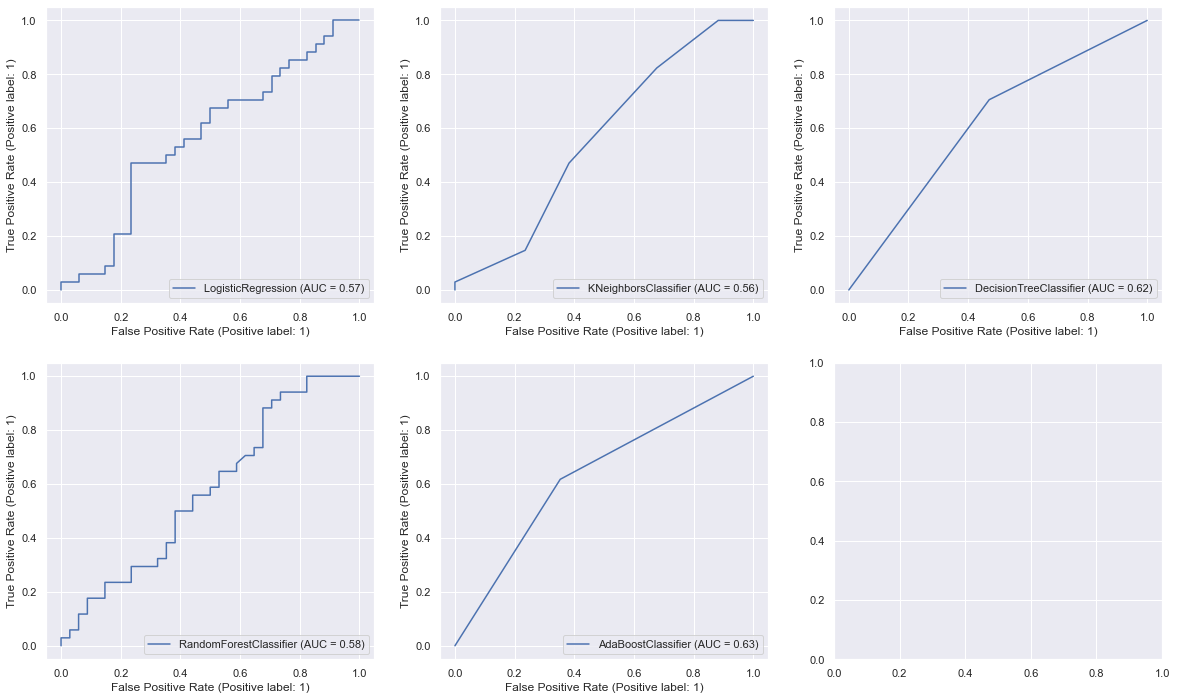

In [ ]:
sns.set()
fig, axes = plt.subplots(2, 3, figsize = (20,12))
idxs = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]]

for (clf_name, clf), idx in zip(classifiers, idxs):
    #clf.fit(X1_train, y1_train)
    plot_roc_curve(clf, X1_test, y1_test, ax = idx)

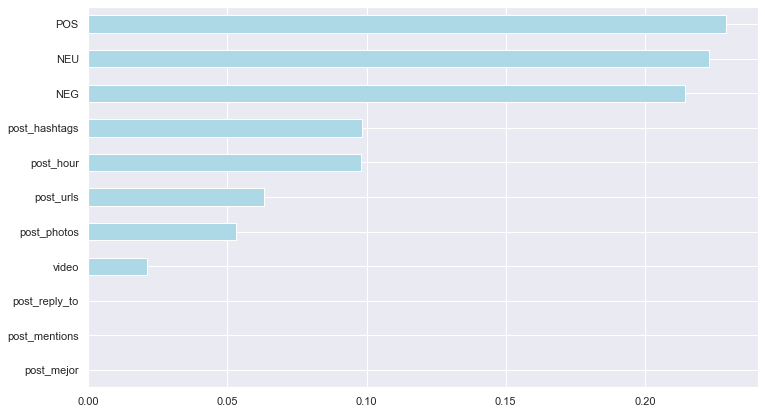

In [ ]:
#Feature importance
fig, axes = plt.subplots(figsize= (12,7))
importances_rf =pd.Series(rfc.feature_importances_[0:15], index = df_new.drop\
                                          (['replies_count_bin'], axis = 1).columns[0:15])
sorted_importances_rf = importances_rf.sort_values()
sns.set()
sorted_importances_rf.plot(kind='barh', color = 'lightblue')
plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
print(len(max_depth))
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = 3, n_iter = 20, n_jobs = -1,\
                               random_state=SEED)

rf_random.fit(X1_train, y1_train)

11


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(min_samples_leaf=0.12,
                                                    n_estimators=500,
                                                    random_state=1111),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 

In [ ]:
print(rf_random.best_params_)
best_random_model = rf_random.best_estimator_
yrf_pred_random = best_random_model.predict(X1_test)
print('Random Forest accuracy: {:.3f}'.format(accuracy_score(y1_test, yrf_pred_random)))

{'n_estimators': 555, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}
Random Forest accuracy: 0.515


In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

rf_with_best_params = RandomForestClassifier(n_estimators = 733 , min_samples_split = 2, random_state =SEED,\
                    min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False)

clf_names = ['Logistic Regression', 'K Nearest Neighbors', 'Classification Tree', 'Random Forest', 'Ada Boost']
clfs = [lr, knn, dt, rfc, ada]


cross_val_strategy = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for classifier, classifier_name in zip(clfs, clf_names):
    scores = cross_val_score(classifier, X1_train, y1_train, cv = cross_val_strategy)

    mean_acc = np.mean(scores)
    std_acc = np.std(scores)

    print('{:s}  Mean accuracy: {:.3f}'.format(classifier_name, mean_acc))
    print('{:s}  Mean std: {:.3f}'.format(classifier_name, std_acc))
    print('')

Logistic Regression  Mean accuracy: 0.532
Logistic Regression  Mean std: 0.059

K Nearest Neighbors  Mean accuracy: 0.479
K Nearest Neighbors  Mean std: 0.117

Classification Tree  Mean accuracy: 0.553
Classification Tree  Mean std: 0.029

Random Forest  Mean accuracy: 0.495
Random Forest  Mean std: 0.051

Ada Boost  Mean accuracy: 0.579
Ada Boost  Mean std: 0.053



# 25.2 Primera prueba con variable "retweets_count_bin" como variable dependiente para la xiaomi¶
A continuación vamos a hacer la verificacon del modelo con la variable "retweets_count_bin" como variable dependiente

In [ ]:
#Volver a correr numeral 24 para que la BD se genere completa

In [ ]:
to_drop = ["id", "username", "replies_count_bin", "likes_count_bin"] #Las que son categoricas
xiaomi_complete = xiaomi_complete.drop(to_drop, axis = 1)
display(xiaomi_complete)

retweets_count_bin  video       NEG       NEU       POS  post_mejor  \
3496                   0      1  0.009343  0.101374  0.889284           0   
3497                   0      1  0.004997  0.634547  0.360456           0   
3498                   0      1  0.003841  0.551759  0.444400           0   
3499                   0      1  0.006017  0.579175  0.414808           0   
3500                   0      1  0.008857  0.190024  0.801119           0   
...                  ...    ...       ...       ...       ...         ...   
4108                   0      1  0.015661  0.880186  0.104153           0   
4109                   0      1  0.013769  0.725444  0.260787           0   
4110                   0      1  0.055768  0.460797  0.483435           0   
4111                   0      1  0.016502  0.693668  0.289830           0   
4112                   0      1  0.004203  0.038468  0.957328           0   

      post_hour  post_mentions  post_urls  post_photos  post_hashtags  \
3496         10              0          0            1              1   
3497         17              0          0            1              1   
3498         16              0          0            1              1   
3499         16              0          1            1              1   
3500         13              0          0            1              1   
...         ...            ...        ...          ...            ...   
4108         19              0          0            1              1   
4109         15              0          0            1              1   
4110         14              0          1            1              1   
4111         11              0          0            0              1   
4112         19              0          0            0              1   

      post_reply_to  
3496              0  
3497              0  
3498              0  
3499              0  
3500              0  
...             ...  
4108              0  
4109              0  
4110              0  
4111              0  
4112              0  

[463 rows x 12 columns]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
#Import ROC AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

SEED = 1111
lr = LogisticRegression(random_state = SEED)
knn = KNN(n_neighbors = 6)
dt = DecisionTreeClassifier(criterion = 'gini', random_state = SEED, max_depth = round(len(xiaomi_complete)**(1/2)))
rfc = RandomForestClassifier(n_estimators = 500 , min_samples_leaf = 0.12, random_state =SEED)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=1)
supvm = svm.SVC()

In [ ]:
df_desertor = xiaomi_complete[xiaomi_complete['retweets_count_bin'] == 1]
df_no_desertor = xiaomi_complete[xiaomi_complete['retweets_count_bin'] == 0]

df_no_desertor = df_no_desertor.sample(n=len(df_desertor))

df_new = pd.concat([df_desertor, df_no_desertor])
df_new = df_new.sample(frac=1)

In [ ]:
y1 = df_new['retweets_count_bin'].values
X1 = df_new.drop('retweets_count_bin', axis = 1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.26, random_state = SEED, stratify = y1)

classifiers =[('Logistic Regression', lr), ('K Nearest Neighbors', knn),\
              ('Classification Tree', dt), ('Random Forest', rfc), ('Ada Boost', ada)]

vc = VotingClassifier(estimators = classifiers)

In [ ]:
for clf_name, clf in classifiers:
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)

    y_pred_proba = clf.predict_proba(X1_test)[:,1]
    roc_score = roc_auc_score(y1_test, y_pred_proba)

    print('{:s} accuracy: {:.3f}'.format(clf_name, accuracy_score(y1_test, y1_pred)))
    print('{:s} ROC score: {:.3f}'.format(clf_name, roc_score))
    print('')

vc.fit(X1_train, y1_train)
y1_predVC = vc.predict(X1_test)
print('Voting Classifier accuracy: {:.3f}'.format(accuracy_score(y1_test, y1_predVC)))

Logistic Regression accuracy: 0.571
Logistic Regression ROC score: 0.417

K Nearest Neighbors accuracy: 0.429
K Nearest Neighbors ROC score: 0.125

Classification Tree accuracy: 0.857
Classification Tree ROC score: 0.875

Random Forest accuracy: 0.714
Random Forest ROC score: 0.583

Ada Boost accuracy: 0.857
Ada Boost ROC score: 0.875

Voting Classifier accuracy: 0.857


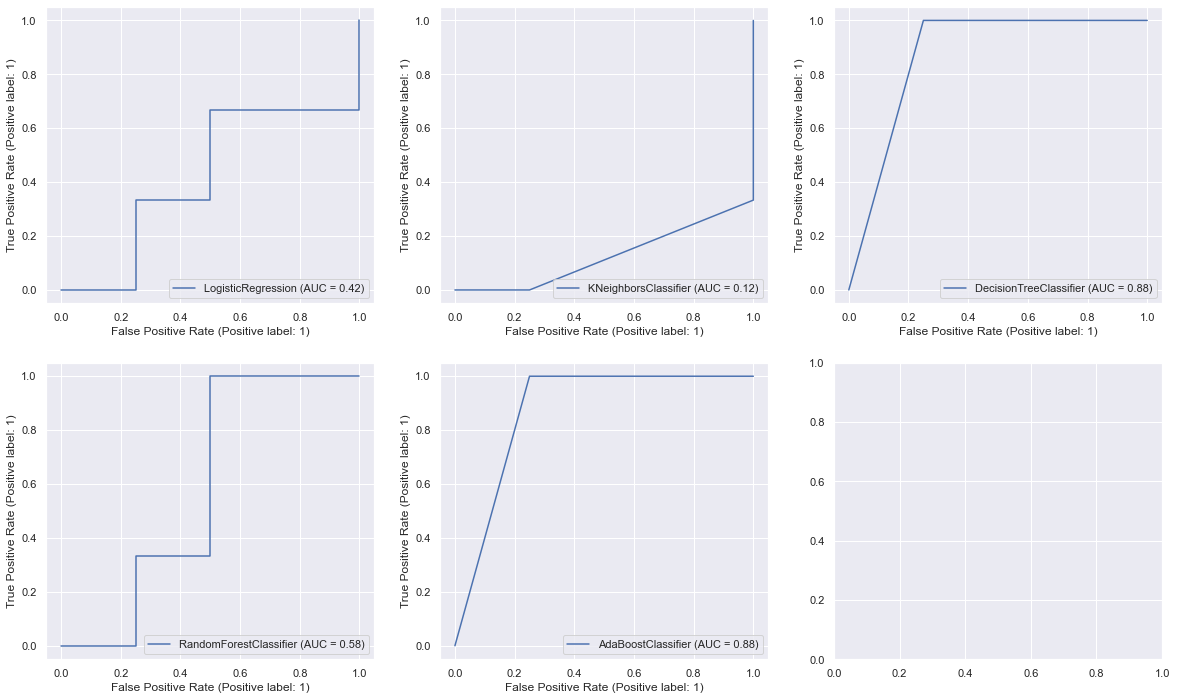

In [ ]:
sns.set()
fig, axes = plt.subplots(2, 3, figsize = (20,12))
idxs = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]]

for (clf_name, clf), idx in zip(classifiers, idxs):
    #clf.fit(X1_train, y1_train)
    plot_roc_curve(clf, X1_test, y1_test, ax = idx)

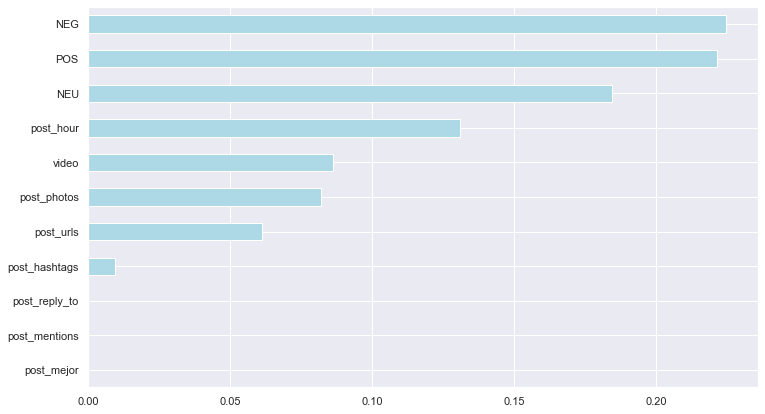

In [ ]:
#Feature importance
fig, axes = plt.subplots(figsize= (12,7))
importances_rf =pd.Series(rfc.feature_importances_[0:15], index = df_new.drop\
                                          (['retweets_count_bin'], axis = 1).columns[0:15])
sorted_importances_rf = importances_rf.sort_values()
sns.set()
sorted_importances_rf.plot(kind='barh', color = 'lightblue')
plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
print(len(max_depth))
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = 3, n_iter = 20, n_jobs = -1,\
                               random_state=SEED)

rf_random.fit(X1_train, y1_train)

11


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(min_samples_leaf=0.12,
                                                    n_estimators=500,
                                                    random_state=1111),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 

In [ ]:
print(rf_random.best_params_)
best_random_model = rf_random.best_estimator_
yrf_pred_random = best_random_model.predict(X1_test)
print('Random Forest accuracy: {:.3f}'.format(accuracy_score(y1_test, yrf_pred_random)))

{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': False}
Random Forest accuracy: 0.714


In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

rf_with_best_params = RandomForestClassifier(n_estimators = 733 , min_samples_split = 2, random_state =SEED,\
                    min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False)

clf_names = ['Logistic Regression', 'K Nearest Neighbors', 'Classification Tree', 'Random Forest', 'Ada Boost']
clfs = [lr, knn, dt, rfc, ada]


cross_val_strategy = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for classifier, classifier_name in zip(clfs, clf_names):
    scores = cross_val_score(classifier, X1_train, y1_train, cv = cross_val_strategy)

    mean_acc = np.mean(scores)
    std_acc = np.std(scores)

    print('{:s}  Mean accuracy: {:.3f}'.format(classifier_name, mean_acc))
    print('{:s}  Mean std: {:.3f}'.format(classifier_name, std_acc))
    print('')

Logistic Regression  Mean accuracy: 0.350
Logistic Regression  Mean std: 0.200

K Nearest Neighbors  Mean accuracy: 0.500
K Nearest Neighbors  Mean std: 0.158

Classification Tree  Mean accuracy: 0.550
Classification Tree  Mean std: 0.245

Random Forest  Mean accuracy: 0.650
Random Forest  Mean std: 0.255

Ada Boost  Mean accuracy: 0.700
Ada Boost  Mean std: 0.187



# 25.3 Primera prueba con variable "likes_count_bin" como variable dependiente para la xiaomi
A continuación vamos a hacer la verificacon del modelo con la variable "likes_count_bin" como variable dependiente

In [ ]:
#Volver a correr numeral 24 para que la BD se genere completa

In [ ]:
to_drop = ["id", "username", "replies_count_bin", "retweets_count_bin"] #Las que son categoricas
xiaomi_complete = xiaomi_complete.drop(to_drop, axis = 1)
display(xiaomi_complete)

likes_count_bin  video       NEG       NEU       POS  post_mejor  \
3496                0      1  0.009343  0.101374  0.889284           0   
3497                0      1  0.004997  0.634547  0.360456           0   
3498                0      1  0.003841  0.551759  0.444400           0   
3499                0      1  0.006017  0.579175  0.414808           0   
3500                0      1  0.008857  0.190024  0.801119           0   
...               ...    ...       ...       ...       ...         ...   
4108                1      1  0.015661  0.880186  0.104153           0   
4109                0      1  0.013769  0.725444  0.260787           0   
4110                0      1  0.055768  0.460797  0.483435           0   
4111                0      1  0.016502  0.693668  0.289830           0   
4112                0      1  0.004203  0.038468  0.957328           0   

      post_hour  post_mentions  post_urls  post_photos  post_hashtags  \
3496         10              0          0            1              1   
3497         17              0          0            1              1   
3498         16              0          0            1              1   
3499         16              0          1            1              1   
3500         13              0          0            1              1   
...         ...            ...        ...          ...            ...   
4108         19              0          0            1              1   
4109         15              0          0            1              1   
4110         14              0          1            1              1   
4111         11              0          0            0              1   
4112         19              0          0            0              1   

      post_reply_to  
3496              0  
3497              0  
3498              0  
3499              0  
3500              0  
...             ...  
4108              0  
4109              0  
4110              0  
4111              0  
4112              0  

[463 rows x 12 columns]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
#Import ROC AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

SEED = 1111
lr = LogisticRegression(random_state = SEED)
knn = KNN(n_neighbors = 6)
dt = DecisionTreeClassifier(criterion = 'gini', random_state = SEED, max_depth = round(len(xiaomi_complete)**(1/2)))
rfc = RandomForestClassifier(n_estimators = 500 , min_samples_leaf = 0.12, random_state =SEED)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=1)
supvm = svm.SVC()

In [ ]:
df_desertor = xiaomi_complete[xiaomi_complete['likes_count_bin'] == 1]
df_no_desertor = xiaomi_complete[xiaomi_complete['likes_count_bin'] == 0]

df_no_desertor = df_no_desertor.sample(n=len(df_desertor), replace=True) #Le agregue el replace=True

df_new = pd.concat([df_desertor, df_no_desertor])
df_new = df_new.sample(frac=1)

In [ ]:
y1 = df_new['likes_count_bin'].values
X1 = df_new.drop('likes_count_bin', axis = 1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.26, random_state = SEED, stratify = y1)

classifiers =[('Logistic Regression', lr), ('K Nearest Neighbors', knn),\
              ('Classification Tree', dt), ('Random Forest', rfc), ('Ada Boost', ada)]

vc = VotingClassifier(estimators = classifiers)

In [ ]:
for clf_name, clf in classifiers:
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)

    y_pred_proba = clf.predict_proba(X1_test)[:,1]
    roc_score = roc_auc_score(y1_test, y_pred_proba)

    print('{:s} accuracy: {:.3f}'.format(clf_name, accuracy_score(y1_test, y1_pred)))
    print('{:s} ROC score: {:.3f}'.format(clf_name, roc_score))
    print('')

vc.fit(X1_train, y1_train)
y1_predVC = vc.predict(X1_test)
print('Voting Classifier accuracy: {:.3f}'.format(accuracy_score(y1_test, y1_predVC)))

Logistic Regression accuracy: 0.737
Logistic Regression ROC score: 0.856

K Nearest Neighbors accuracy: 0.474
K Nearest Neighbors ROC score: 0.572

Classification Tree accuracy: 0.579
Classification Tree ROC score: 0.578

Random Forest accuracy: 0.526
Random Forest ROC score: 0.606

Ada Boost accuracy: 0.474
Ada Boost ROC score: 0.478

Voting Classifier accuracy: 0.579


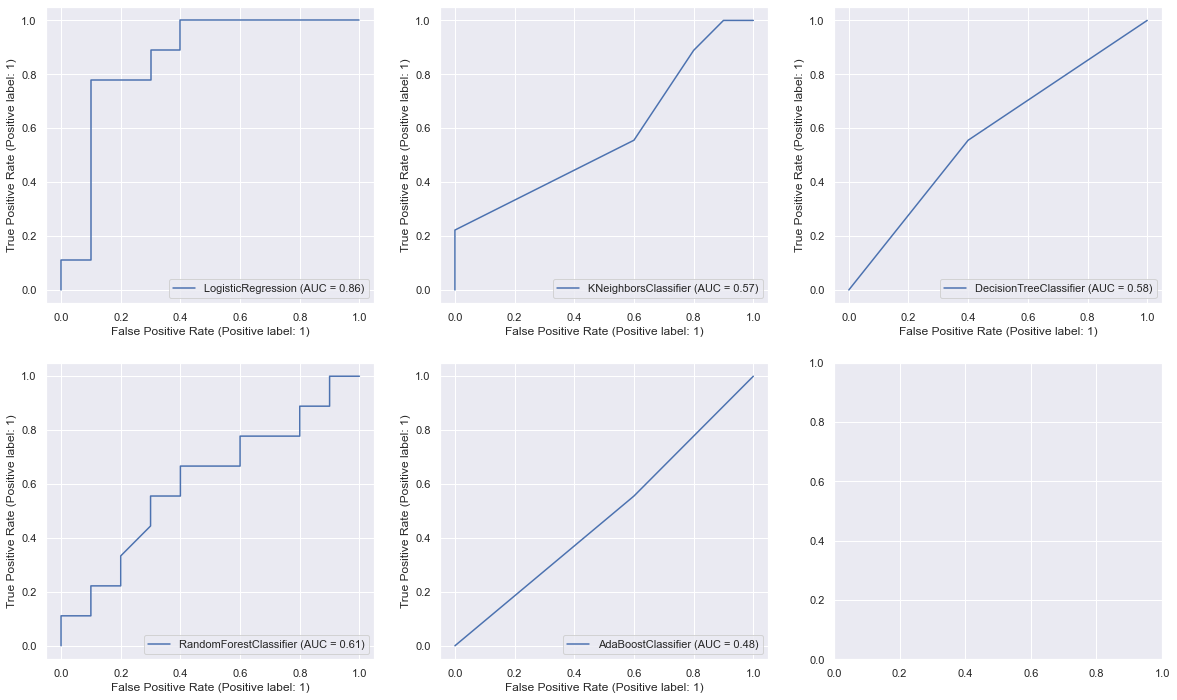

In [ ]:
sns.set()
fig, axes = plt.subplots(2, 3, figsize = (20,12))
idxs = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]]

for (clf_name, clf), idx in zip(classifiers, idxs):
    #clf.fit(X1_train, y1_train)
    plot_roc_curve(clf, X1_test, y1_test, ax = idx)

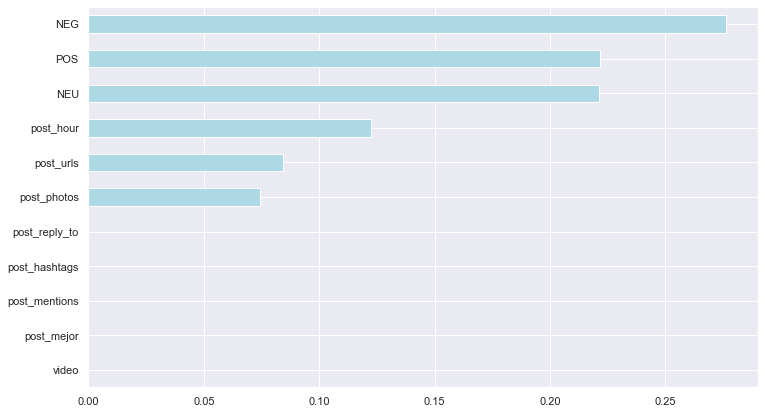

In [ ]:
#Feature importance
fig, axes = plt.subplots(figsize= (12,7))
importances_rf =pd.Series(rfc.feature_importances_[0:15], index = df_new.drop\
                                          (['likes_count_bin'], axis = 1).columns[0:15])
sorted_importances_rf = importances_rf.sort_values()
sns.set()
sorted_importances_rf.plot(kind='barh', color = 'lightblue')
plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
print(len(max_depth))
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = 3, n_iter = 20, n_jobs = -1,\
                               random_state=SEED)

rf_random.fit(X1_train, y1_train)

11


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(min_samples_leaf=0.12,
                                                    n_estimators=500,
                                                    random_state=1111),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 

In [ ]:
print(rf_random.best_params_)
best_random_model = rf_random.best_estimator_
yrf_pred_random = best_random_model.predict(X1_test)
print('Random Forest accuracy: {:.3f}'.format(accuracy_score(y1_test, yrf_pred_random)))

{'n_estimators': 911, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}
Random Forest accuracy: 0.526


In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

rf_with_best_params = RandomForestClassifier(n_estimators = 733 , min_samples_split = 2, random_state =SEED,\
                    min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False)

clf_names = ['Logistic Regression', 'K Nearest Neighbors', 'Classification Tree', 'Random Forest', 'Ada Boost']
clfs = [lr, knn, dt, rfc, ada]


cross_val_strategy = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for classifier, classifier_name in zip(clfs, clf_names):
    scores = cross_val_score(classifier, X1_train, y1_train, cv = cross_val_strategy)

    mean_acc = np.mean(scores)
    std_acc = np.std(scores)

    print('{:s}  Mean accuracy: {:.3f}'.format(classifier_name, mean_acc))
    print('{:s}  Mean std: {:.3f}'.format(classifier_name, std_acc))
    print('')

Logistic Regression  Mean accuracy: 0.491
Logistic Regression  Mean std: 0.148

K Nearest Neighbors  Mean accuracy: 0.382
K Nearest Neighbors  Mean std: 0.106

Classification Tree  Mean accuracy: 0.564
Classification Tree  Mean std: 0.121

Random Forest  Mean accuracy: 0.491
Random Forest  Mean std: 0.109

Ada Boost  Mean accuracy: 0.600
Ada Boost  Mean std: 0.073



# Ultima entrega algoritmo Maquina de Soporte de vectores

In [ ]:
import numpy as np
import pandas as pd
from pydataset import data
from sklearn import svm
from sklearn import model_selection
from statsmodels.tools.eval_measures import mse

initiated datasets repo at: C:\Users\ESTUDIANTE\.pydataset/


# Data preparation

In [ ]:
huawei_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 991
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  967 non-null    int64  
 1   time                967 non-null    object 
 2   username            967 non-null    object 
 3   mentions            967 non-null    object 
 4   urls                967 non-null    object 
 5   photos              967 non-null    object 
 6   replies_count       967 non-null    int64  
 7   retweets_count      967 non-null    int64  
 8   likes_count         967 non-null    int64  
 9   hashtags            967 non-null    object 
 10  video               967 non-null    int64  
 11  reply_to            967 non-null    object 
 12  sentiment           967 non-null    object 
 13  NEG                 967 non-null    float64
 14  NEU                 967 non-null    float64
 15  POS                 967 non-null    float64
 16  post_mej

In [ ]:
huawei_complete.head()

id      time        username mentions  \
0  1254112666119032833  13:18:54  huaweimobileco       []   
1  1254032473895448576  08:00:15  huaweimobileco       []   
2  1253943150520999936  02:05:18  huaweimobileco       []   
3  1253807145621037057  17:04:52  huaweimobileco       []   
4  1253735895074824192  12:21:45  huaweimobileco       []   

                                    urls  \
0                                     []   
1  ['https://bit.ly/AppGalleryServices']   
2                                     []   
3                                     []   
4         ['https://bit.ly/HuaweiP40Co']   

                                                photos  replies_count  \
0                                                   []              0   
1  ['https://pbs.twimg.com/media/EWc3447WsAENg6S.jpg']              2   
2                                                   []              0   
3                                                   []              0   
4                                                   []              0   

   retweets_count  likes_count           hashtags  ...  post_mejor post_hour  \
0               0            0                 []  ...           0        13   
1             154          136  ['quédateencasa']  ...           1         8   
2               0            0                 []  ...           0         2   
3               0            0                 []  ...           0        17   
4               0            0                 []  ...           0        12   

  post_mentions  post_urls  post_photos  post_hashtags  post_reply_to  \
0             0          0            0              0              0   
1             0          1            1              1              0   
2             0          0            0              0              0   
3             0          0            0              0              1   
4             0          1            0              0              1   

   replies_count_bin  retweets_count_bin  likes_count_bin  
0                  0                   0                0  
1                  0                   1                1  
2                  0                   0                0  
3                  0                   0                0  
4                  0                   0                0  

[5 rows x 26 columns]

In [ ]:
# Data Manipulation
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Sklearn
from sklearn.linear_model import LinearRegression # for building a linear regression model
from sklearn.svm import SVR # for building SVR model
from sklearn.preprocessing import MinMaxScaler

# Visualizations
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization

# HUAWEI

In [ ]:
huawei_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 991
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  967 non-null    int64  
 1   time                967 non-null    object 
 2   username            967 non-null    object 
 3   mentions            967 non-null    object 
 4   urls                967 non-null    object 
 5   photos              967 non-null    object 
 6   replies_count       967 non-null    int64  
 7   retweets_count      967 non-null    int64  
 8   likes_count         967 non-null    int64  
 9   hashtags            967 non-null    object 
 10  video               967 non-null    int64  
 11  reply_to            967 non-null    object 
 12  sentiment           967 non-null    object 
 13  NEG                 967 non-null    float64
 14  NEU                 967 non-null    float64
 15  POS                 967 non-null    float64
 16  post_mej

In [ ]:
# Use MinMax scaling on X2 and X3 features
scaler = MinMaxScaler()
huawei_complete['video (scaled)']=scaler.fit_transform(huawei_complete[['video']])
huawei_complete['post_hour (scaled)']=scaler.fit_transform(huawei_complete[['post_hour']])

# Print Dataframe
huawei_complete

C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_13476/343875670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huawei_complete['video (scaled)']=scaler.fit_transform(huawei_complete[['video']])
C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_13476/343875670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huawei_complete['post_hour (scaled)']=scaler.fit_transform(huawei_complete[['post_hour']])


id      time        username mentions  \
0    1254112666119032833  13:18:54  huaweimobileco       []   
1    1254032473895448576  08:00:15  huaweimobileco       []   
2    1253943150520999936  02:05:18  huaweimobileco       []   
3    1253807145621037057  17:04:52  huaweimobileco       []   
4    1253735895074824192  12:21:45  huaweimobileco       []   
..                   ...       ...             ...      ...   
987  1575177735659454465  12:36:52  huaweimobileco       []   
988  1575134167507017728  09:43:44  huaweimobileco       []   
989  1575126306685161472  09:12:30  huaweimobileco       []   
990  1575123332432789506  09:00:41  huaweimobileco       []   
991  1574921890686070784  19:40:14  huaweimobileco       []   

                                      urls  \
0                                       []   
1    ['https://bit.ly/AppGalleryServices']   
2                                       []   
3                                       []   
4           ['https://bit.ly/HuaweiP40Co']   
..                                     ...   
987                                     []   
988                                     []   
989                                     []   
990               ['https://fal.cn/3sgAR']   
991                                     []   

                                                photos  replies_count  \
0                                                   []              0   
1    ['https://pbs.twimg.com/media/EWc3447WsAENg6S....              2   
2                                                   []              0   
3                                                   []              0   
4                                                   []              0   
..                                                 ...            ...   
987                                                 []              0   
988                                                 []              1   
989                                                 []              0   
990  ['https://pbs.twimg.com/media/Fdv2Uo4XkAYesPT....              0   
991                                                 []              0   

     retweets_count  likes_count           hashtags  ...  post_mentions  \
0                 0            0                 []  ...              0   
1               154          136  ['quédateencasa']  ...              0   
2                 0            0                 []  ...              0   
3                 0            0                 []  ...              0   
4                 0            0                 []  ...              0   
..              ...          ...                ...  ...            ...   
987               0            0                 []  ...              0   
988               0            1                 []  ...              0   
989               0            0                 []  ...              0   
990               0            2   ['freebudspro2']  ...              0   
991               0            0                 []  ...              0   

    post_urls post_photos  post_hashtags  post_reply_to  replies_count_bin  \
0           0           0              0              0                  0   
1           1           1              1              0                  0   
2           0           0              0              0                  0   
3           0           0              0              1                  0   
4           1           0              0              1                  0   
..        ...         ...            ...            ...                ...   
987         0           0              0              1                  0   
988         0           0              0              1                  0   
989         0           0              0              1                  0   
990         1           1              1              0                  0   
991         0           0              0              1                  0  

In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(huawei_complete,
                    x=huawei_complete['post_hour (scaled)'],
                    y=huawei_complete['video (scaled)'],
                    z=huawei_complete['likes_count'],
                    opacity=0.8, color_discrete_sequence=['black'],
                    height=900, width=1000
                   )

# Set figure title
fig.update_layout(title_text="Scatter 3D Plot",
                  scene_camera_eye=dict(x=1.5, y=1.5, z=0.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.2),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey')))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

In [ ]:
# ----------- Select variables -----------
X=huawei_complete[['video (scaled)','post_hour (scaled)']]
y=huawei_complete['likes_count'].values

# ----------- Model fitting -----------
# Define models and set hyperparameter values
model1 = LinearRegression()
model2 = SVR(kernel='rbf', C=100, epsilon=1)

# Fit the two models
lr = model1.fit(X, y)
svr = model2.fit(X, y)

# ----------- For creating a prediciton plane to be used in the visualization -----------
# Set Increments between points in a meshgrid
mesh_size = 0.05

# Identify min and max values for input variables
x_min, x_max = X['video (scaled)'].min(), X['video (scaled)'].max()
y_min, y_max = X['post_hour (scaled)'].min(), X['post_hour (scaled)'].max()

# Return evenly spaced values based on a range between min and max
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)

# Create a meshgrid
xx, yy = np.meshgrid(xrange, yrange)

# ----------- Create a prediciton plane  -----------
# Use models to create a prediciton plane --- Linear Regression
pred_LR = model1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_LR = pred_LR.reshape(xx.shape)

# Use models to create a prediciton plane --- SVR
pred_svr = model2.predict(np.c_[xx.ravel(), yy.ravel()])
pred_svr = pred_svr.reshape(xx.shape)

# Note, .ravel() flattens the array to a 1D array,
# then np.c_ takes elements from flattened xx and yy arrays and puts them together,
# this creates the right shape required for model input

# prediction array that is created by the model output is a 1D array,
# Hence, we need to reshape it to be the same shape as xx or yy to be able to display it on a graph


In [ ]:
# Create a 3D scatter plot with predictions
fig = px.scatter_3d(huawei_complete, x=huawei_complete['video (scaled)'], y=huawei_complete['post_hour (scaled)'], z=huawei_complete['likes_count'],
                    opacity=0.8, color_discrete_sequence=['black'],
                    width=1000, height=900
                   )

# Set figure title and colors
fig.update_layout(title_text="Scatter 3D Plot with Linear Regression Prediction Surface",
                  scene_camera_eye=dict(x=1.5, y=1.5, z=0.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.2),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey')))
# Update marker size
fig.update_traces(marker=dict(size=2))

# Add prediction plane
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred_LR, name='LR',
                          colorscale=px.colors.sequential.Sunsetdark, showscale=False))

fig.show()

In [ ]:
# Create a 3D scatter plot with predictions
fig = px.scatter_3d(huawei_complete, x=huawei_complete['post_hour (scaled)'], y=huawei_complete['video (scaled)'], z=huawei_complete['likes_count'],
                    opacity=0.8, color_discrete_sequence=['black'],
                    width=1000, height=900
                   )

# Set figure title and colors
fig.update_layout(title_text="Scatter 3D Plot with SVR Prediction Surface",
                  scene_camera_eye=dict(x=1.5, y=1.5, z=0.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.2),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey')))
# Update marker size
fig.update_traces(marker=dict(size=2))

# Add prediction plane
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred_svr, name='SVR',
                          colorscale=px.colors.sequential.Sunsetdark,
                          showscale=False))

fig.show()

# MOTOROLA

In [ ]:
motorola_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 992 to 2350
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1298 non-null   int64  
 1   time                1298 non-null   object 
 2   username            1298 non-null   object 
 3   mentions            1298 non-null   object 
 4   urls                1298 non-null   object 
 5   photos              1298 non-null   object 
 6   replies_count       1298 non-null   int64  
 7   retweets_count      1298 non-null   int64  
 8   likes_count         1298 non-null   int64  
 9   hashtags            1298 non-null   object 
 10  video               1298 non-null   int64  
 11  reply_to            1298 non-null   object 
 12  sentiment           1298 non-null   object 
 13  NEG                 1298 non-null   float64
 14  NEU                 1298 non-null   float64
 15  POS                 1298 non-null   float64
 16  post

In [ ]:
# Use MinMax scaling on X2 and X3 features
scaler = MinMaxScaler()
motorola_complete['video (scaled)']=scaler.fit_transform(motorola_complete[['video']])
motorola_complete['post_hour (scaled)']=scaler.fit_transform(motorola_complete[['post_hour']])

# Print Dataframe
motorola_complete

C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_13476/1638679310.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_13476/1638679310.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id      time      username mentions  \
992   1382823550927605760  17:30:00  motorola_col       []   
993   1382785800895483904  15:00:00  motorola_col       []   
994   1382781814364893184  14:44:10  motorola_col       []   
995   1382472499930218496  18:15:03  motorola_col       []   
996   1382397224991227905  13:15:56  motorola_col       []   
...                   ...       ...           ...      ...   
2346  1435354850104123404  16:30:38  motorola_col       []   
2347  1435023547391426565  18:34:09  motorola_col       []   
2348  1434959731332894721  14:20:34  motorola_col       []   
2349  1434686917510107137  20:16:30  motorola_col       []   
2350  1434496049964519426  07:38:04  motorola_col       []   

                                    urls  \
992       ['http://bit.ly/IGMotorolaCo']   
993       ['http://bit.ly/IGMotorolaCo']   
994                                   []   
995         ['http://ow.ly/6pfu50Eg5VF']   
996                                   []   
...                                  ...   
2346                                  []   
2347  ['http://bit.ly/MotoEdge20liteco']   
2348                                  []   
2349  ['http://bit.ly/ReadyForMotorola']   
2350                                  []   

                                                 photos  replies_count  \
992                                                  []              0   
993                                                  []              0   
994                                                  []              3   
995                                                  []              1   
996                                                  []              1   
...                                                 ...            ...   
2346                                                 []              0   
2347  ['https://pbs.twimg.com/media/E-o6LbjXsAE1Zlh....              1   
2348                                                 []              0   
2349                                                 []              0   
2350                                                 []              0   

      retweets_count  likes_count  \
992                1            3   
993                0            4   
994                3           15   
995                4           34   
996                0            0   
...              ...          ...   
2346               0            8   
2347               1            6   
2348               0            0   
2349               0           10   
2350               0            0   

                                         hashtags  ...  post_mentions  \
992                                   ['motog30']  ...              0   
993                                   ['motog30']  ...              0   
994                                ['motolovers']  ...              0   
995                         ['motog100', 'motog']  ...              0   
996                                            []  ...              0   
...                                           ...  ...            ...   
2346               ['motorola', 'powertoempower']  ...              0   
2347  ['edge20lite', 'findyouredge', 'hellomoto']  ...              0   
2348                                           []  ...              0   
2349                    ['motog100', 'hellomoto']  ...              0   
2350                                           []  ...              0   

     post_urls post_photos  post_hashtags  post_reply_to  replies_count_bin  \
992          1           0              1              0                  0   
993          1           0              1              0                  0   
994          0           0              1              0                  1   
995          1           0              1              0                  0   
996          0           0              0              1                  0   
...        ...         ...            ...            ...        

In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(motorola_complete,
                    x=motorola_complete['post_hour (scaled)'],
                    y=motorola_complete['video (scaled)'],
                    z=motorola_complete['likes_count'],
                    opacity=0.8, color_discrete_sequence=['black'],
                    height=900, width=1000
                   )

# Set figure title
fig.update_layout(title_text="Scatter 3D Plot",
                  scene_camera_eye=dict(x=1.5, y=1.5, z=0.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.2),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey')))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

In [ ]:
# ----------- Select variables -----------
X=motorola_complete[['video (scaled)','post_hour (scaled)']]
y=motorola_complete['likes_count'].values

# ----------- Model fitting -----------
# Define models and set hyperparameter values
model1 = LinearRegression()
model2 = SVR(kernel='rbf', C=100, epsilon=1)

# Fit the two models
lr = model1.fit(X, y)
svr = model2.fit(X, y)

# ----------- For creating a prediciton plane to be used in the visualization -----------
# Set Increments between points in a meshgrid
mesh_size = 0.05

# Identify min and max values for input variables
x_min, x_max = X['video (scaled)'].min(), X['video (scaled)'].max()
y_min, y_max = X['post_hour (scaled)'].min(), X['post_hour (scaled)'].max()

# Return evenly spaced values based on a range between min and max
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)

# Create a meshgrid
xx, yy = np.meshgrid(xrange, yrange)

# ----------- Create a prediciton plane  -----------
# Use models to create a prediciton plane --- Linear Regression
pred_LR = model1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_LR = pred_LR.reshape(xx.shape)

# Use models to create a prediciton plane --- SVR
pred_svr = model2.predict(np.c_[xx.ravel(), yy.ravel()])
pred_svr = pred_svr.reshape(xx.shape)

# Note, .ravel() flattens the array to a 1D array,
# then np.c_ takes elements from flattened xx and yy arrays and puts them together,
# this creates the right shape required for model input

# prediction array that is created by the model output is a 1D array,
# Hence, we need to reshape it to be the same shape as xx or yy to be able to display it on a graph


In [ ]:
# Create a 3D scatter plot with predictions
fig = px.scatter_3d(motorola_complete, x=motorola_complete['video (scaled)'], y=motorola_complete['post_hour (scaled)'], z=motorola_complete['likes_count'],
                    opacity=0.8, color_discrete_sequence=['black'],
                    width=1000, height=900
                   )

# Set figure title and colors
fig.update_layout(title_text="Scatter 3D Plot with Linear Regression Prediction Surface",
                  scene_camera_eye=dict(x=1.5, y=1.5, z=0.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.2),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey')))
# Update marker size
fig.update_traces(marker=dict(size=2))

# Add prediction plane
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred_LR, name='LR',
                          colorscale=px.colors.sequential.Sunsetdark, showscale=False))

fig.show()

In [ ]:
# Create a 3D scatter plot with predictions
fig = px.scatter_3d(motorola_complete, x=motorola_complete['post_hour (scaled)'], y=motorola_complete['video (scaled)'], z=motorola_complete['likes_count'],
                    opacity=0.8, color_discrete_sequence=['black'],
                    width=1000, height=900
                   )

# Set figure title and colors
fig.update_layout(title_text="Scatter 3D Plot with SVR Prediction Surface",
                  scene_camera_eye=dict(x=1.5, y=1.5, z=0.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.2),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey')))
# Update marker size
fig.update_traces(marker=dict(size=2))

# Add prediction plane
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred_svr, name='SVR',
                          colorscale=px.colors.sequential.Sunsetdark,
                          showscale=False))

fig.show()

# SAMSUNG

In [ ]:
samsung_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110 entries, 2351 to 3495
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1110 non-null   int64  
 1   time                1110 non-null   object 
 2   username            1110 non-null   object 
 3   mentions            1110 non-null   object 
 4   urls                1110 non-null   object 
 5   photos              1110 non-null   object 
 6   replies_count       1110 non-null   int64  
 7   retweets_count      1110 non-null   int64  
 8   likes_count         1110 non-null   int64  
 9   hashtags            1110 non-null   object 
 10  video               1110 non-null   int64  
 11  reply_to            1110 non-null   object 
 12  sentiment           1110 non-null   object 
 13  NEG                 1110 non-null   float64
 14  NEU                 1110 non-null   float64
 15  POS                 1110 non-null   float64
 16  pos

In [ ]:
# Use MinMax scaling on X2 and X3 features
scaler = MinMaxScaler()
samsung_complete['video (scaled)']=scaler.fit_transform(samsung_complete[['video']])
samsung_complete['post_hour (scaled)']=scaler.fit_transform(samsung_complete[['post_hour']])

# Print Dataframe
samsung_complete

C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_13476/3121491506.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_13476/3121491506.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id      time         username  \
2351  1255950876092571648  15:03:17  samsungmobileco   
2352  1255892311973810177  11:10:35  samsungmobileco   
2353  1255620061081022466  17:08:45  samsungmobileco   
2354  1255576685396852736  14:16:23  samsungmobileco   
2355  1255251423660515331  16:43:55  samsungmobileco   
...                   ...       ...              ...   
3491  1567558973598957569  12:02:37  samsungmobileco   
3492  1567316594887475203  19:59:30  samsungmobileco   
3493  1567239315209478146  14:52:25  samsungmobileco   
3494  1567196911852986371  12:03:55  samsungmobileco   
3495  1566941750064717826  19:10:00  samsungmobileco   

                                               mentions  \
2351  [{'screen_name': 'josecarlostecno', 'name': 'j...   
2352                                                 []   
2353                                                 []   
2354                                                 []   
2355                                                 []   
...                                                 ...   
3491                                                 []   
3492                                                 []   
3493                                                 []   
3494                                                 []   
3495                                                 []   

                                                   urls  \
2351                                                 []   
2352  ['https://shop.samsung.com.co/galaxy-s10-plus-...   
2353                        ['http://spr.ly/60121N2ZQ']   
2354                        ['http://spr.ly/60121f97Y']   
2355                        ['http://spr.ly/60161N3Am']   
...                                                 ...   
3491                                                 []   
3492                                                 []   
3493                                                 []   
3494                         ['https://bit.ly/3Qjs1zP']   
3495                         ['https://bit.ly/3Qjs1zP']   

                                                 photos  replies_count  \
2351                                                 []              0   
2352  ['https://pbs.twimg.com/media/EW3TGjAXYAASc0-....              1   
2353  ['https://pbs.twimg.com/media/EWzbWobXQAIiNFp....              1   
2354                                                 []              1   
2355                                                 []              0   
...                                                 ...            ...   
3491                                                 []              0   
3492  ['https://pbs.twimg.com/tweet_video_thumb/Fb_1...              4   
3493                                                 []              0   
3494  ['https://pbs.twimg.com/media/Fb_NNeQX0AMveI7....              0   
3495  ['https://pbs.twimg.com/media/Fb7OHfDXoAInUcB....              1   

      retweets_count  likes_count  \
2351               1            7   
2352               2            8   
2353               2           10   
2354               0            0   
2355               0            6   
...              ...          ...   
3491               4           19   
3492              62          187   
3493               1            7   
3494               1            8   
3495               0           11   

                                               hashtags  ...  post_mentions  \
2351                                     ['galaxyfold']  ...              1   
2352  ['tbt', 'yomequedoencasa', 'conectadosenfamili...  ...              0   
2353  ['yomequedoencasa', 'conectadosenfamilia', 'un...  ...              0   
2354                                                 []  ...              0   
2355         ['conectadosenfamilia', 'yomequedoencasa']  ...              0   
...                                                 ...  ...            ...   
3491                 ['expandetumundo', 'gala

In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(samsung_complete,
                    x=samsung_complete['post_hour (scaled)'],
                    y=samsung_complete['video (scaled)'],
                    z=samsung_complete['likes_count'],
                    opacity=0.8, color_discrete_sequence=['black'],
                    height=900, width=1000
                   )

# Set figure title
fig.update_layout(title_text="Scatter 3D Plot",
                  scene_camera_eye=dict(x=1.5, y=1.5, z=0.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.2),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey')))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

In [ ]:
# ----------- Select variables -----------
X=samsung_complete[['video (scaled)','post_hour (scaled)']]
y=samsung_complete['likes_count'].values

# ----------- Model fitting -----------
# Define models and set hyperparameter values
model1 = LinearRegression()
model2 = SVR(kernel='rbf', C=100, epsilon=1)

# Fit the two models
lr = model1.fit(X, y)
svr = model2.fit(X, y)

# ----------- For creating a prediciton plane to be used in the visualization -----------
# Set Increments between points in a meshgrid
mesh_size = 0.05

# Identify min and max values for input variables
x_min, x_max = X['video (scaled)'].min(), X['video (scaled)'].max()
y_min, y_max = X['post_hour (scaled)'].min(), X['post_hour (scaled)'].max()

# Return evenly spaced values based on a range between min and max
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)

# Create a meshgrid
xx, yy = np.meshgrid(xrange, yrange)

# ----------- Create a prediciton plane  -----------
# Use models to create a prediciton plane --- Linear Regression
pred_LR = model1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_LR = pred_LR.reshape(xx.shape)

# Use models to create a prediciton plane --- SVR
pred_svr = model2.predict(np.c_[xx.ravel(), yy.ravel()])
pred_svr = pred_svr.reshape(xx.shape)

# Note, .ravel() flattens the array to a 1D array,
# then np.c_ takes elements from flattened xx and yy arrays and puts them together,
# this creates the right shape required for model input

# prediction array that is created by the model output is a 1D array,
# Hence, we need to reshape it to be the same shape as xx or yy to be able to display it on a graph


In [ ]:
# Create a 3D scatter plot with predictions
fig = px.scatter_3d(samsung_complete, x=samsung_complete['video (scaled)'], y=samsung_complete['post_hour (scaled)'], z=samsung_complete['likes_count'],
                    opacity=0.8, color_discrete_sequence=['black'],
                    width=1000, height=900
                   )

# Set figure title and colors
fig.update_layout(title_text="Scatter 3D Plot with Linear Regression Prediction Surface",
                  scene_camera_eye=dict(x=1.5, y=1.5, z=0.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.2),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey')))
# Update marker size
fig.update_traces(marker=dict(size=2))

# Add prediction plane
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred_LR, name='LR',
                          colorscale=px.colors.sequential.Sunsetdark, showscale=False))

fig.show()

In [ ]:
# Create a 3D scatter plot with predictions
fig = px.scatter_3d(samsung_complete, x=samsung_complete['post_hour (scaled)'], y=samsung_complete['video (scaled)'], z=samsung_complete['likes_count'],
                    opacity=0.8, color_discrete_sequence=['black'],
                    width=1000, height=900
                   )

# Set figure title and colors
fig.update_layout(title_text="Scatter 3D Plot with SVR Prediction Surface",
                  scene_camera_eye=dict(x=1.5, y=1.5, z=0.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.2),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey')))
# Update marker size
fig.update_traces(marker=dict(size=2))

# Add prediction plane
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred_svr, name='SVR',
                          colorscale=px.colors.sequential.Sunsetdark,
                          showscale=False))

fig.show()

# XIAOMI

In [ ]:
xiaomi_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 3496 to 4112
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  463 non-null    int64  
 1   time                463 non-null    object 
 2   username            463 non-null    object 
 3   mentions            463 non-null    object 
 4   urls                463 non-null    object 
 5   photos              463 non-null    object 
 6   replies_count       463 non-null    int64  
 7   retweets_count      463 non-null    int64  
 8   likes_count         463 non-null    int64  
 9   hashtags            463 non-null    object 
 10  video               463 non-null    int64  
 11  reply_to            463 non-null    object 
 12  sentiment           463 non-null    object 
 13  NEG                 463 non-null    float64
 14  NEU                 463 non-null    float64
 15  POS                 463 non-null    float64
 16  post

In [ ]:
# Use MinMax scaling on X2 and X3 features
scaler = MinMaxScaler()
xiaomi_complete['video (scaled)']=scaler.fit_transform(xiaomi_complete[['video']])
xiaomi_complete['post_hour (scaled)']=scaler.fit_transform(xiaomi_complete[['post_hour']])

# Print Dataframe
xiaomi_complete

C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_13476/1560165412.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_13476/1560165412.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id      time        username mentions  \
3496  1399017762995851264  10:00:01  xiaomicolombia       []   
3497  1398410333430104066  17:46:19  xiaomicolombia       []   
3498  1398035187225841665  16:55:37  xiaomicolombia       []   
3499  1398029856110174219  16:34:26  xiaomicolombia       []   
3500  1397615712290623489  13:08:46  xiaomicolombia       []   
...                   ...       ...             ...      ...   
4108  1452793944291651586  19:27:22  xiaomicolombia       []   
4109  1452728107471867904  15:05:45  xiaomicolombia       []   
4110  1452352642269728775  14:13:47  xiaomicolombia       []   
4111  1451947718717452294  11:24:46  xiaomicolombia       []   
4112  1451706789494468612  19:27:24  xiaomicolombia       []   

                                              urls  \
3496                                            []   
3497                                            []   
3498                                            []   
3499  ['https://c.mi.com/thread-3719896-1-1.html']   
3500                                            []   
...                                            ...   
4108                                            []   
4109                                            []   
4110                 ['https://fb.me/e/1wdNYny2K']   
4111                                            []   
4112                                            []   

                                                 photos  replies_count  \
3496  ['https://pbs.twimg.com/media/E2gm_GmXEAA0GW_....              2   
3497  ['https://pbs.twimg.com/media/E2gmvAUWEAUtKGQ....              2   
3498  ['https://pbs.twimg.com/media/E2bRhJ3XEAMdkMs....              0   
3499  ['https://pbs.twimg.com/media/E2bMt4CXMAEbR69....              0   
3500  ['https://pbs.twimg.com/media/E2VUCAxWQAA6n2N....              2   
...                                                 ...            ...   
4108  ['https://pbs.twimg.com/media/FClcXZfXoAMFcUt....              7   
4109  ['https://pbs.twimg.com/media/FCkgfRvXEAoonUz....              0   
4110  ['https://pbs.twimg.com/media/FCfLBu6WUAcuKC4....              0   
4111                                                 []              3   
4112                                                 []              1   

      retweets_count  likes_count                                hashtags  \
3496               2           29                          ['mi11lite5g']   
3497               0           16               ['redminote9', 'redmi9a']   
3498               0           17                       ['mimamáestrena']   
3499               0           11                         ['micommunity']   
3500               1           23  ['redminote10s', 'tusaventurasen64mp']   
...              ...          ...                                     ...   
4108               8           71  ['xiaomi11lite5gne', 'seriexiaomi11t']   
4109               7           30     ['regresoellite', 'seriexiaomi11t']   
4110               1           12         ['cinemagia', 'seriexiaomi11t']   
4111               2           23                           ['xiaomi11t']   
4112               2           17         ['cinemagia', 'seriexiaomi11t']   

      ...  post_mentions post_urls post_photos  post_hashtags  post_reply_to  \
3496  ...              0         0           1              1              0   
3497  ...              0         0           1              1              0   
3498  ...              0         0           1              1              0   
3499  ...              0         1           1              1              0   
3500  ...              0         0           1              1              0   
...   ...            ...       ...         ...            ...            ...   
4108  ...              0         0           1              1              0   
4109  ...              0         0           1              1              0   
4110  ...              0         1           1              1          

In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(xiaomi_complete,
                    x=xiaomi_complete['post_hour (scaled)'],
                    y=xiaomi_complete['video (scaled)'],
                    z=xiaomi_complete['likes_count'],
                    opacity=0.8, color_discrete_sequence=['black'],
                    height=900, width=1000
                   )

# Set figure title
fig.update_layout(title_text="Scatter 3D Plot",
                  scene_camera_eye=dict(x=1.5, y=1.5, z=0.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.2),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey')))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

In [ ]:
# ----------- Select variables -----------
X=xiaomi_complete[['video (scaled)','post_hour (scaled)']]
y=xiaomi_complete['likes_count'].values

# ----------- Model fitting -----------
# Define models and set hyperparameter values
model1 = LinearRegression()
model2 = SVR(kernel='rbf', C=100, epsilon=1)

# Fit the two models
lr = model1.fit(X, y)
svr = model2.fit(X, y)

# ----------- For creating a prediciton plane to be used in the visualization -----------
# Set Increments between points in a meshgrid
mesh_size = 0.05

# Identify min and max values for input variables
x_min, x_max = X['video (scaled)'].min(), X['video (scaled)'].max()
y_min, y_max = X['post_hour (scaled)'].min(), X['post_hour (scaled)'].max()

# Return evenly spaced values based on a range between min and max
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)

# Create a meshgrid
xx, yy = np.meshgrid(xrange, yrange)

# ----------- Create a prediciton plane  -----------
# Use models to create a prediciton plane --- Linear Regression
pred_LR = model1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_LR = pred_LR.reshape(xx.shape)

# Use models to create a prediciton plane --- SVR
pred_svr = model2.predict(np.c_[xx.ravel(), yy.ravel()])
pred_svr = pred_svr.reshape(xx.shape)

# Note, .ravel() flattens the array to a 1D array,
# then np.c_ takes elements from flattened xx and yy arrays and puts them together,
# this creates the right shape required for model input

# prediction array that is created by the model output is a 1D array,
# Hence, we need to reshape it to be the same shape as xx or yy to be able to display it on a graph


In [ ]:
# Create a 3D scatter plot with predictions
fig = px.scatter_3d(xiaomi_complete, x=xiaomi_complete['video (scaled)'], y=xiaomi_complete['post_hour (scaled)'], z=xiaomi_complete['likes_count'],
                    opacity=0.8, color_discrete_sequence=['black'],
                    width=1000, height=900
                   )

# Set figure title and colors
fig.update_layout(title_text="Scatter 3D Plot with Linear Regression Prediction Surface",
                  scene_camera_eye=dict(x=1.5, y=1.5, z=0.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.2),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey')))
# Update marker size
fig.update_traces(marker=dict(size=2))

# Add prediction plane
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred_LR, name='LR',
                          colorscale=px.colors.sequential.Sunsetdark, showscale=False))

fig.show()

In [ ]:
# Create a 3D scatter plot with predictions
fig = px.scatter_3d(xiaomi_complete, x=xiaomi_complete['post_hour (scaled)'], y=xiaomi_complete['video (scaled)'], z=xiaomi_complete['likes_count'],
                    opacity=0.8, color_discrete_sequence=['black'],
                    width=1000, height=900
                   )

# Set figure title and colors
fig.update_layout(title_text="Scatter 3D Plot with SVR Prediction Surface",
                  scene_camera_eye=dict(x=1.5, y=1.5, z=0.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.2),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey')))
# Update marker size
fig.update_traces(marker=dict(size=2))

# Add prediction plane
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred_svr, name='SVR',
                          colorscale=px.colors.sequential.Sunsetdark,
                          showscale=False))

fig.show()

In [ ]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical features from strings to number arrays

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

# Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

In [ ]:
# Function that handles sample splitting, model fitting and report printing
def mfunc(X, y, typ):

    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    model = typ
    clf = model.fit(X_train, y_train)

    # Predict class labels on a test data
    pred_labels = model.predict(X_test)

    # Print model attributes
    print('Classes: ', clf.classes_) # class labels known to the classifier
    if str(typ)=='GaussianNB()':
        print('Class Priors: ',clf.class_prior_) # prior probability of each class.
    else:
        print('Class Log Priors: ',clf.class_log_prior_) # log prior probability of each class.

    # Use score method to get accuracy of the model
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')

    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels))

    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, pred_labels

# huawei

In [ ]:
# Select data for modeling
X=huawei_complete[['video', 'post_hour']]
y=huawei_complete['likes_count'].values

# Fit the model and print the result
X_train, X_test, y_train, y_test, clf, pred_labels, = mfunc(X, y, GaussianNB())

Classes:  [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   30   33   36   46   49   52   53   59  126  127  128  132  133
  135  136  137  190  212  216  258  276  352  363 1183]
Class Priors:  [0.56274256 0.11772316 0.01940492 0.00776197 0.01164295 0.01034929
 0.02069858 0.02587322 0.01940492 0.02199224 0.01423027 0.01423027
 0.01034929 0.01164295 0.00776197 0.01293661 0.01293661 0.00905563
 0.00388098 0.00517464 0.01164295 0.00388098 0.00776197 0.01034929
 0.00258732 0.00129366 0.00517464 0.00129366 0.00129366 0.00129366
 0.00129366 0.00129366 0.00129366 0.00129366 0.00129366 0.00258732
 0.00129366 0.00129366 0.00258732 0.00129366 0.00129366 0.00258732
 0.00129366 0.00129366 0.00129366 0.00129366 0.00129366 0.00129366
 0.00129366 0.00129366 0.00129366 0.00129366 0.00129366]
--------------------------------------------------------
Accuracy Score:  0.5515463917525774
-------------------

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` param

In [ ]:
# Specify a size of the mesh to be used
mesh_size = 5
margin = 1

# Create a mesh grid on which we will run our model
x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Specify traces
trace_specs = [
    #[X_train, y_train, 0, 'Train', 'brown'],
    #[X_train, y_train, 1, 'Train', 'aqua'],
    [X_test, y_test, 0, 'Test', 'red'],
    [X_test, y_test, 1, 'Test', 'blue']
]

# Build the graph using trace_specs from above
fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label].iloc[:, 0], y=X[y==label].iloc[:, 1],
        name=f'{split} data, Actual Class: {label}',
        mode='markers', marker_color=marker
    )
    for X, y, label, split, marker in trace_specs
])

# Update marker size
fig.update_traces(marker_size=2, marker_line_width=0)

# Update axis range
fig.update_xaxes(range=[-100, 100])
fig.update_yaxes(range=[0,50])

# Update chart title and legend placement
fig.update_layout(title_text="Decision Boundary for Naive Bayes Model",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

# Add contour graph
fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=True,
        colorscale='magma',
        opacity=1,
        name='Score',
        hoverinfo='skip'
    )
)

fig.show()

# motorola

In [ ]:
# Select data for modeling
X=motorola_complete[['video', 'post_hour']]
y=motorola_complete['likes_count'].values

# Fit the model and print the result
X_train, X_test, y_train, y_test, clf, pred_labels, = mfunc(X, y, GaussianNB())

Classes:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  19  21  23  26  28  34  36  47  70 155 178 224 311 800 926]
Class Priors:  [0.4026975  0.10404624 0.05298651 0.06840077 0.06840077 0.0867052
 0.05202312 0.04046243 0.03082852 0.02312139 0.0105973  0.01445087
 0.00578035 0.00385356 0.00385356 0.0105973  0.00481696 0.00096339
 0.00096339 0.00192678 0.00096339 0.00096339 0.00096339 0.00096339
 0.00096339 0.00096339 0.00096339 0.00096339 0.00096339 0.00096339
 0.00096339 0.00096339 0.00096339]
--------------------------------------------------------
Accuracy Score:  0.2423076923076923
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.65      0.63        96
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00       

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` param

In [ ]:
# Specify a size of the mesh to be used
mesh_size = 5
margin = 1

# Create a mesh grid on which we will run our model
x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Specify traces
trace_specs = [
    #[X_train, y_train, 0, 'Train', 'brown'],
    #[X_train, y_train, 1, 'Train', 'aqua'],
    [X_test, y_test, 0, 'Test', 'red'],
    [X_test, y_test, 1, 'Test', 'blue']
]

# Build the graph using trace_specs from above
fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label].iloc[:, 0], y=X[y==label].iloc[:, 1],
        name=f'{split} data, Actual Class: {label}',
        mode='markers', marker_color=marker
    )
    for X, y, label, split, marker in trace_specs
])

# Update marker size
fig.update_traces(marker_size=2, marker_line_width=0)

# Update axis range
fig.update_xaxes(range=[-100, 100])
fig.update_yaxes(range=[0,50])

# Update chart title and legend placement
fig.update_layout(title_text="Decision Boundary for Naive Bayes Model",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

# Add contour graph
fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=True,
        colorscale='magma',
        opacity=1,
        name='Score',
        hoverinfo='skip'
    )
)

fig.show()

# samsung


In [ ]:
# Select data for modeling
X=samsung_complete[['video', 'post_hour']]
y=samsung_complete['likes_count'].values

# Fit the model and print the result
X_train, X_test, y_train, y_test, clf, pred_labels, = mfunc(X, y, GaussianNB())

Classes:  [    0     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    23    24
    25    26    28    31    32    35    36    37    38    40    41    43
    50    51    53    59    76    82    98   125   137   144   148   149
   155   184   185   187   205   266   274   276   311   357   360   367
   380   474   494   612   676   683   856   934  1150  1195  1335  1581
  2113  2228  2309  2325  2426  2455  2469  2723  3169  3314  3357  3531
  3626  7428  8313  8362 12440 14735 26556]
Class Priors:  [0.32432432 0.06081081 0.03040541 0.03153153 0.04391892 0.04279279
 0.05405405 0.03490991 0.03603604 0.04279279 0.04166667 0.03603604
 0.03153153 0.02027027 0.01463964 0.01351351 0.01351351 0.01126126
 0.01013514 0.0045045  0.00675676 0.0045045  0.00112613 0.00225225
 0.00225225 0.00337838 0.00337838 0.00225225 0.00337838 0.00112613
 0.00112613 0.00112613 0.00112613 0.00112613 0.00112613 0.00112613
 0.00225225 0.0011

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` param

In [ ]:
# Specify a size of the mesh to be used
mesh_size = 5
margin = 1

# Create a mesh grid on which we will run our model
x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Specify traces
trace_specs = [
    #[X_train, y_train, 0, 'Train', 'brown'],
    #[X_train, y_train, 1, 'Train', 'aqua'],
    [X_test, y_test, 0, 'Test', 'red'],
    [X_test, y_test, 1, 'Test', 'blue']
]

# Build the graph using trace_specs from above
fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label].iloc[:, 0], y=X[y==label].iloc[:, 1],
        name=f'{split} data, Actual Class: {label}',
        mode='markers', marker_color=marker
    )
    for X, y, label, split, marker in trace_specs
])

# Update marker size
fig.update_traces(marker_size=2, marker_line_width=0)

# Update axis range
fig.update_xaxes(range=[-100, 100])
fig.update_yaxes(range=[0,50])

# Update chart title and legend placement
fig.update_layout(title_text="Decision Boundary for Naive Bayes Model",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

# Add contour graph
fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=True,
        colorscale='magma',
        opacity=1,
        name='Score',
        hoverinfo='skip'
    )
)

fig.show()

# xiaomi

In [ ]:
# Select data for modeling
X=xiaomi_complete[['video', 'post_hour']]
y=xiaomi_complete['likes_count'].values

# Fit the model and print the result
X_train, X_test, y_train, y_test, clf, pred_labels, = mfunc(X, y, GaussianNB())

Classes:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  37  38  39  40  41  42  43  44  45  47  48  51  52  55  63  64  65  66
  69  70  71  75  78  82  85  87  90 105 111 120 125 157 192 210 227 237
 240 311]
Class Priors:  [0.05675676 0.01891892 0.00540541 0.01081081 0.01891892 0.01621622
 0.02702703 0.02432432 0.02972973 0.03243243 0.04324324 0.02702703
 0.04324324 0.03783784 0.02432432 0.03243243 0.02702703 0.03243243
 0.02972973 0.03783784 0.02702703 0.01351351 0.02702703 0.03513514
 0.02162162 0.02162162 0.01621622 0.01621622 0.01891892 0.01891892
 0.00810811 0.00810811 0.01081081 0.00810811 0.0027027  0.00540541
 0.01621622 0.00540541 0.00810811 0.00810811 0.00540541 0.00540541
 0.00540541 0.00540541 0.01081081 0.00810811 0.00540541 0.0027027
 0.0027027  0.0027027  0.0027027  0.0027027  0.0027027  0.0027027
 0.00810811 0.0027027  0.00540541 0.0027027  0.0027027  0.0027027
 0.002

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` param

In [ ]:
# Specify a size of the mesh to be used
mesh_size = 5
margin = 1

# Create a mesh grid on which we will run our model
x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Specify traces
trace_specs = [
    #[X_train, y_train, 0, 'Train', 'brown'],
    #[X_train, y_train, 1, 'Train', 'aqua'],
    [X_test, y_test, 0, 'Test', 'red'],
    [X_test, y_test, 1, 'Test', 'blue']
]

# Build the graph using trace_specs from above
fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label].iloc[:, 0], y=X[y==label].iloc[:, 1],
        name=f'{split} data, Actual Class: {label}',
        mode='markers', marker_color=marker
    )
    for X, y, label, split, marker in trace_specs
])

# Update marker size
fig.update_traces(marker_size=2, marker_line_width=0)

# Update axis range
fig.update_xaxes(range=[-100, 100])
fig.update_yaxes(range=[0,50])

# Update chart title and legend placement
fig.update_layout(title_text="Decision Boundary for Naive Bayes Model",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

# Add contour graph
fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=True,
        colorscale='magma',
        opacity=1,
        name='Score',
        hoverinfo='skip'
    )
)

fig.show()